# Modelo de Previsão de Rotatividade de Clientes em Empresa Operadora de Comunicações

## Contextualização

A operadora de comunicações Interconnect gostaria de ser capaz de predizer a rotatividade de seus clientes. Se for descoberto que um usuário está planejando trocar de operadora, a empresa oferecerá-lhe códigos promocionais e opções de plano especiais. A equipe de marketing da Interconnect coletou alguns dados pessoais da sua clientela, incluindo a informação sobre seus planos e contratos.

**Serviços da Interconnect**

A Interconnect fornece principalmente dois tipos de serviços:

1. **`Telefonia fixa`**. O telefone pode ser conectado a várias linhas ao mesmo tempo.
2. **`Internet`**. A rede pode ser estabelecida através de uma linha telefônica (DSL, digital subscriber line - linha digital de assinante) ou através de um cabo de fibra óptica.

Alguns outros serviços fornecidos pela empresa incluem:

- **Segurança na Internet**: Inclui software antivírus (DeviceProtection) e bloqueador de sites maliciosos (OnlineSecurity).

- **Suporte Ténico**: Uma linha dedicada de suporte técnico (TechSupport).

- **Armazenamento e Backup:**: Armazenamento de arquivos na nuvem e backup de dados (OnlineBackup).

- **Entretenimento:**: Streaming de TV (StreamingTV) e um diretório de filmes (StreamingMovies).

Os clientes podem escolher entre fazer um pagamento mensal e assinar um contrato de 1 ou 2 anos. Eles podem usar vários métodos de pagamento e receber uma fatura eletrônica após a transação.

**Descrição dos Dados**

Os dados consistem de arquivos obtidos de fontes diferentes:

- `contract.csv` — informação contratual;
- `personal.csv` — dados pessoais do cliente;
- `internet.csv` — informação sobre serviços de Internet;
- `phone.csv` — informação sobre serviços de telefonia.

Em cada arquivo, a coluna `customerID` contém um código unívoco atribuído a cada cliente. A informação contratual é válida a partir de 1 de fevereiro de 2020.

Esclarecimentos:

Característica objetivo: a coluna `'EndDate'` é igual a `'No'`.

- Métrica primária: AUC-ROC.

- Métrica adicional: Acurácia.

**Critérios de avaliação: Alcançar um AUC-ROC ≥ 0.88**

AUC-ROC < 0.75 — 0 PPE

- 0.75 ≤ AUC-ROC < 0.81 — 4 PPE

- 0.81 ≤ AUC-ROC < 0.85 — 4.5 PPE

- 0.85 ≤ AUC-ROC < 0.87 — 5 PPE

- 0.87 ≤ AUC-ROC < 0.88 — 5.5 PPE

- AUC-ROC ≥ 0.88 — 6 PPE

> **Impacto do Projeto**: A capacidade de prever a rotatividade dos clientes pode impactar significativamente a estratégia da Interconnect. Com as previsões geradas pelo modelo, a equipe de marketing pode identificar clientes em risco e tomar medidas proativas, como oferecer descontos personalizados, melhorar a experiência do cliente e implementar programas de fidelidade. Dessa forma, a empresa pode aumentar a retenção, reduzir custos associados à aquisição de novos clientes e, consequentemente, melhorar sua lucratividade.

## Dicionário de Dados Utilizados no Projeto


### `contract.csv`: Informações Contratuais
**Tabela de informações contratuais:**

| Nome da Coluna   | Descrição                                            | Tipo de Dado |
|:-----------------|:-----------------------------------------------------|:-------------|
| customerID       | Identificador único de cada cliente                 | String       |
| BeginDate        | Data de início do contrato                          | Data         |
| EndDate          | Data de término do contrato ou "No" se ainda ativo  | Data/String  |
| Type             | Tipo de contrato (ex. mensal, um ano, dois anos)    | String       |
| PaperlessBilling | Indica se o cliente optou por faturamento sem papel | String       |
| PaymentMethod    | Método de pagamento utilizado pelo cliente          | String       |
| MonthlyCharges   | Valor cobrado mensalmente ao cliente                | Float        |
| TotalCharges     | Valor total cobrado ao cliente até a data atual     | Float        |

### `personal.csv`: Dados Pessoais
**Tabela de dados pessoais:**

| Nome da Coluna | Descrição                                   | Tipo de Dado |
|:---------------|:--------------------------------------------|:-------------|
| customerID     | Identificador único de cada cliente        | String       |
| gender         | Gênero do cliente (ex. "Male" ou "Female") | String       |
| SeniorCitizen  | Indica se o cliente é idoso (1 se sim, 0 se não) | Inteiro |
| Partner        | Indica se o cliente tem um parceiro        | String       |
| Dependents     | Indica se o cliente tem dependentes        | String       |

### `internet.csv`: Serviços de Internet
**Tabela de serviços de internet:**

| Nome da Coluna   | Descrição                                            | Tipo de Dado |
|:-----------------|:-----------------------------------------------------|:-------------|
| customerID       | Identificador único de cada cliente                 | String       |
| InternetService  | Tipo de serviço de internet (ex. DSL, fibra ótica)  | String       |
| OnlineSecurity   | Indica se possui serviço de segurança online        | String       |
| OnlineBackup     | Indica se possui serviço de backup online           | String       |
| DeviceProtection | Indica se possui proteção para dispositivos         | String       |
| TechSupport      | Indica se possui suporte técnico                    | String       |
| StreamingTV      | Indica se possui serviço de streaming de TV         | String       |
| StreamingMovies  | Indica se possui serviço de streaming de filmes     | String       |

### `phone.csv`: Serviços de Telefonia
**Tabela de serviços de telefonia:**

| Nome da Coluna  | Descrição                                          | Tipo de Dado |
|:----------------|:---------------------------------------------------|:-------------|
| customerID      | Identificador único de cada cliente               | String       |
| MultipleLines   | Indica se o cliente possui múltiplas linhas       | String       |

### `Coluna-Alvo`: Target Column
**Coluna-alvo para predição de rotatividade:**

| Nome da Coluna | Descrição                                                                 | Tipo de Dado |
|:---------------|:--------------------------------------------------------------------------|:-------------|
| EndDate        | Para predição de rotatividade. Se "No", cliente não encerrou o contrato.  | Data/String  |


> Nota: Todos os nomes das colunas foram convertidos para snake_case para padronização. Por exemplo, CustomerID tornou-se customer_id, e Begin Date tornou-se begin_date.

## Metodologia do Projeto

**1. Problema e Objetivos do Projeto**
   - **Objetivo Principal:** Desenvolver um modelo preditivo para identificar clientes propensos a trocar de operadora.
   - **Objetivos Secundários:**
     - Analisar padrões e fatores que contribuem para a rotatividade.
     - Implementar estratégias de retenção baseadas nas previsões do modelo.

**2. Coletar e Integrar Dados para Análise**
   - **Datasets Utilizados:**
     - `contract.csv` — Informações Contratuais.
     - `personal.csv` — Dados Pessoais do Cliente.
     - `internet.csv` — Serviços de Internet.
     - `phone.csv` — Serviços de Telefonia.
   - **Ações:**
     - Carregar e visualizar os dados com a biblioteca `pandas` para verificar a qualidade e a estrutura dos dados.
     - Unificar os dados: Integrar os quatro arquivos utilizando a coluna `customerID`.

**3. Exploração e Análise Inicial dos Dados**
   - **Objetivos:**
     - Entender a distribuição dos dados.
     - Identificar padrões e anomalias.
     - Explorar correlações entre variáveis.
   - **Ações:**
     - Analisar estatísticas descritivas utilizando `pandas`.
     - Visualizar a distribuição de variáveis-chave com `matplotlib` e `seaborn`.
     - Identificar e tratar valores ausentes.
     - Examinar possíveis duplicatas e analisar outliers.

**4. Criar e Selecionar Features**
   - **Objetivo:** Desenvolver novas variáveis a partir das existentes para aprimorar o desempenho do modelo.
   - **Ações:**
     - Criar features baseadas em interações entre variáveis categóricas e numéricas.
     - Extrair informações de colunas de datas e agregar dados úteis.
     - Realizar validação das features criadas para assegurar a sua importância no modelo.

**5. Pré-Processar os Dados**
   - **Ações:**
     - **Codificar e Normalizar Variáveis:** 
       - Ajustar os tipos de dados para garantir a consistência.
       - Identificar variáveis categóricas e utilizar `OneHotEncoder` do `scikit-learn` para codificá-las.
       - Normalizar e padronizar variáveis numéricas usando `StandardScaler`.
     - **Verificar e Balancear as Classes:** 
       - Analisar a distribuição das classes e aplicar `SMOTE` no conjunto de treinamento para lidar com o desbalanceamento.
     - **Dividir Dataset:** 
       - Dividir os dados em conjuntos de treinamento, validação e teste com `train_test_split`.

**6. Modelar e Treinar o Modelo**
   - **Algoritmos Selecionados:**
     - Regressão Logística
     - Árvores de Decisão
     - Floresta Aleatória
     - Gradient Boosting
     - XGBoost
     - LightGBM
   - **Justificativa para a Escolha dos Algoritmos:**
     - **Regressão Logística:** Benchmark inicial devido à sua simplicidade e facilidade de interpretação.
     - **Árvores de Decisão e Floresta Aleatória:** Identificam automaticamente as variáveis mais importantes e capturam interações.
     - **Gradient Boosting e XGBoost:** Algoritmos robustos para lidar com dados desbalanceados, oferecendo alta precisão.
     - **LightGBM:** Eficiente para grandes conjuntos de dados, com desempenho semelhante ao XGBoost, mas menor consumo de memória e tempo.
   - **Ações:**
     - Treinar os modelos usando `scikit-learn`, `XGBoost`, e `LightGBM`.
     - Avaliar o desempenho inicial de cada modelo.
     - Ajustar hiperparâmetros utilizando `RandomizedSearchCV` e `GridSearchCV`, se necessário, para melhorar a performance.

**7. Avaliar o Modelo no Conjunto de Teste**
   - **Métricas de Avaliação:**
     - AUC-ROC (métrica primária).
     - Acurácia (métrica adicional).
   - **Ações:**
     - Avaliar a performance de cada modelo usando as métricas definidas (`roc_auc_score`, `accuracy_score` do `scikit-learn`).
     - Selecionar o modelo final com base no equilíbrio entre AUC-ROC e acurácia.
     - Registrar observações e identificar potenciais melhorias para o modelo.

**8. Salvar e Utilizar o Modelo Treinado**
   - **Ações:**
     - Salvar o modelo treinado em formato `.pkl` para reutilização.
     - Registrar informações relevantes do modelo, incluindo hiperparâmetros e métricas.
     - Incluir instruções para carregar e usar o modelo treinado em futuras previsões.

**9. Conclusão e Comunicação dos Resultados**
   - **Objetivos:** Documentar todas as etapas do projeto e comunicar os resultados para as partes interessadas.
   - **Ações:**
     - Preparar um relatório final detalhado em formato `Jupyter Notebook`.
     - Apresentar os resultados para a equipe de marketing e outras partes interessadas, destacando as principais métricas e insights do projeto.


## Problema e Objetivos do Projeto

**Definição do Problema e Objetivos**

- **Objetivo Principal:** Desenvolver um modelo preditivo para identificar clientes propensos a cancelar o serviço.

- **Objetivos Secundários:**
  - Analisar padrões e fatores que contribuem para a rotatividade, como comportamento de uso dos serviços e nível de satisfação do cliente.
  - Implementar estratégias de retenção baseadas nas previsões do modelo, como ofertas personalizadas e ações proativas para minimizar cancelamentos.

##  Coletar e Integrar Dados para Análise

### Coletar os Dados

**Coletar e Integrar Dados para Análise**
   - **Datasets Utilizados:**
     - `contract.csv` — Informações Contratuais.
     - `personal.csv` — Dados Pessoais do Cliente.
     - `internet.csv` — Serviços de Internet.
     - `phone.csv` — Serviços de Telefonia.
   - **Ações:**
     - Carregar e visualizar os dados com a biblioteca `pandas` para verificar a qualidade e a estrutura dos dados.
     - Unificar os dados: Integrar os quatro arquivos utilizando a coluna `customerID`.

In [1]:
# Importar bibliotecas importantes
import os
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib
import sys

In [2]:
# Definir o caminho base relativo ao diretório do notebook
base_path = os.path.join('..', '..', 'data', 'raw')  # Sobe dois níveis para acessar a pasta 'data/raw'

In [3]:
try:
    df_contract = pd.read_csv(os.path.join(base_path, 'contract.csv'))
    df_personal = pd.read_csv(os.path.join(base_path, 'personal.csv'))
    df_internet = pd.read_csv(os.path.join(base_path, 'internet.csv'))
    df_phone = pd.read_csv(os.path.join(base_path, 'phone.csv'))
    print("Dados carregados com sucesso.")
except FileNotFoundError as e:
    print(f"Erro ao carregar os arquivos: {e}")

Dados carregados com sucesso.


In [4]:
# Função aprimorada para converter os nomes das colunas para snake_case, preservando abreviações como ID
def convert_to_snake_case(df):
    # Substitui espaços por underscores e converte letras maiúsculas para snake_case, ignorando abreviações como ID
    df.columns = [re.sub(r'(?<=[a-z])(?=[A-Z])', '_', col).replace(' ', '_').lower() for col in df.columns]
    return df

In [5]:
# Padronizar os nomes das colunas para snake_case
df_contract = convert_to_snake_case(df_contract)
df_personal = convert_to_snake_case(df_personal)
df_internet = convert_to_snake_case(df_internet)
df_phone = convert_to_snake_case(df_phone)

In [6]:
# Visualizar as primeiras linhas de df_contract
df_contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [7]:
# Informações gerais sobre o dataset df_contract
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


**`df_contract` (Dados Contratuais)**

**Informações:**
- **customer_id**: Identificador único de cada cliente.
- **begin_date**: Data de início do contrato.
- **end_date**: Data de término do contrato, ou "No" se o contrato ainda estiver ativo.
- **type**: Tipo de contrato (mensal, um ano, dois anos).
- **paperless_billing**: Indica se o cliente optou por faturamento sem papel (sim ou não).
- **payment_method**: Método de pagamento utilizado pelo cliente (ex: cheque eletrônico, transferência bancária).
- **monthly_charges**: Valor cobrado mensalmente ao cliente.
- **total_charges**: Valor total cobrado ao cliente até a data atual.

**Conclusões:**
- A maioria das colunas são do tipo `object`, indicando dados categóricos.
- A coluna `monthly_charges` é numérica (`float64`), representando o valor das cobranças mensais.
- A coluna `total_charges`, embora seja um valor numérico, está classificada como `object`. Pretendemos converter para float após tratar quaisquer valores ausentes ou inconsistentes.
- Não há valores nulos, o que facilita a análise.

In [8]:
# Visualizar as primeiras linhas de df_personal
df_personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
# Informações gerais sobre o dataset df_personal
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


**`df_personal` (Dados Pessoais)**

**Informações:**
- **customer_id**: Identificador único de cada cliente.
- **gender**: Gênero do cliente.
- **senior_citizenn**: Indica se o cliente é idoso (1 se for idoso, 0 se não for).
- **partner**: Indica se o cliente tem parceiro.
- **dependents**: Indica se o cliente tem dependentes.

**Conclusões:**
- A maioria das colunas é do tipo `object`, exceto `senior_citizen`, que é do tipo numérico (`int64`).
- Não há valores nulos, o que facilita a análise e o tratamento desses dados.
- Esse dataset é essencial para entender o perfil demográfico dos clientes, o que pode ser relevante para a análise de rotatividade.

In [10]:
# Visualizar as primeiras linhas de df_internet
df_internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [11]:
# Informações gerais sobre o dataset df_personal
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


**`df_internet` (Serviços de Internet)**

**Informações:**
- **customer_id**: Identificador único de cada cliente.
- **internet_service**: Tipo de serviço de internet utilizado (ex: DSL, fibra óptica).
- **online_security**: Indica se o cliente possui serviço de segurança online.
- **online_backup**: Indica se o cliente possui serviço de backup online.
- **device_protection**: Indica se o cliente possui proteção para dispositivos.
- **tech_support**: Indica se o cliente possui suporte técnico.
- **streaming_tv**: Indica se o cliente possui serviço de streaming de TV.
- **streaming_movies**: Indica se o cliente possui serviço de streaming de filmes.

**Conclusões:**
- Todas as colunas são do tipo `object`, indicando que são dados categóricos.
-  Existem 5517 entradas válidas, sugerindo que nem todos os clientes utilizam serviços de internet, o que explica a ausência de dados para alguns clientes.
-  Não há valores nulos nas colunas preenchidas, o que simplifica o processo de análise e limpeza.

In [12]:
# Visualizar as primeiras linhas do dataset df_phone
df_phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [13]:
# Informações gerais sobre o dataset df_phone
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


**`df_phone` (Serviços de Telefonia)**

**Informações:**
- **customer_id**: Identificador único de cada cliente.
- **multiple_lines**: Indica se o cliente possui múltiplas linhas de telefone.

**Conclusões:**
- Ambas as colunas são do tipo `object`, indicando dados categóricos.
- O dataset tem 6361 entradas válidas, o que sugere que nem todos os clientes possuem serviços de telefonia.
- Não há valores nulos, o que é um ponto positivo para a qualidade dos dados.

**Conclusões Intermediárias Gerais:**
- Após a visualização e análise dos dados, concluímos que a maioria dos datasets possui dados categóricos, sem a presença de valores nulos, o que facilita o trabalho inicial de preparação. No entanto, algumas colunas, como `total_charges`, requerem tratamento específico para converter os dados para tipos numéricos, adequando-os ao formato correto para análise posterior.
- Convertendo os nomes das colunas para `snake_case` para padronização e melhor legibilidade.
- Agora, com um entendimento mais claro da estrutura dos dados, podemos avançar para a fase de **engenharia de features** e **tratamento de dados**.

### Integrar os Dados

Vamos unir todos os datasets usando a coluna `customerID`. Após isso, faremos uma análise exploratória para entender melhor a estrutura dos dados e identificar possíveis inconsistências.

In [14]:
# Unir os datasets
df_merged = pd.merge(df_contract, df_personal, on='customer_id', how='left')
df_merged = pd.merge(df_merged, df_internet, on='customer_id', how='left')
df_merged = pd.merge(df_merged, df_phone, on='customer_id', how='left')

In [15]:
# Visualizar as primeiras linhas do dataset unificado
df_merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


**Informações**:

Tipos de Dados:
- A maioria das colunas é do tipo `object`, indicando que são dados categóricos.
- A coluna `monthly_charges` é do tipo float64, representando dados numéricos contínuos.
- A coluna `senior_citizen` é do tipo `int64`, representando dados numéricos discretos.

**Conclusões**:

Dados Não Nulos:
- As colunas relacionadas aos serviços de internet (`internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`) têm 5517 não nulos, indicando que nem todos os clientes têm esses serviços.
- A coluna `multiple_lines` tem 6361 não nulos, indicando que alguns clientes podem não ter múltiplas linhas telefônicas, enquanto outros sim

> **Nota**: Os valores ausentes serão tratados durante a Análise Exploratória de Dados, onde investigaremos a melhor estratégia para lidar com essas informações.

## Explorar e Analisar os Dados (EDA)

**Exploração e Análise Inicial dos Dados**
   - **Objetivos:**
     - Entender a distribuição dos dados.
     - Identificar padrões e anomalias.
     - Explorar correlações entre variáveis.
   - **Ações:**
     - Analisar estatísticas descritivas utilizando `pandas`.
     - Visualizar a distribuição de variáveis-chave com `matplotlib` e `seaborn`.
     - Identificar e tratar valores ausentes.
     - Examinar possíveis duplicatas e analisar outliers.

### Unificar Dataset

#### Informações gerais 

Abaixo estão as informações gerais do dataset unificado:

In [16]:
# Informações gerais sobre o dataset df_merged unificado
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   5517 non-null   object 
 13  online_security    5517 non-null   object 
 14  online_backup      5517 non-null   object 
 15  device_protection  5517 non-null   object 
 16  tech_support       5517 

**Tipos de Dados do df_merged:**
- O dataset contém 7043 registros e 20 colunas.
- As colunas `begin_date` e `end_dat`e estão como object e serão convertidas para `datetime` para facilitar a análise temporal.
- A coluna `total_charges` está como object, mas será convertida para `float` para cálculos quantitativos.
- As demais colunas estão corretas em seus tipos, com `monthly_charges` e `senior_citizen` já no formato numérico adequado.

In [17]:
# Converter as colunas 'begin_date' e 'end_date' para o tipo datetime
df_merged['begin_date'] = pd.to_datetime(df_merged['begin_date'], errors='coerce')
df_merged['end_date'] = df_merged['end_date'].replace('No', pd.NaT)  # Substituir 'No' por NaT
df_merged['end_date'] = pd.to_datetime(df_merged['end_date'], errors='coerce')

In [18]:
# Converter a coluna 'total_charges' para float, substituindo espaços vazios por NaN
df_merged['total_charges'] = pd.to_numeric(df_merged['total_charges'], errors='coerce')

In [19]:
# Verificar as alterações nos tipos de dados
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

`df_merged` pronto para tratamento dos valores ausentes

#### Tratar Valores Ausentes

Aqui, identificamos as colunas com valores ausentes e visualizamos sua distribuição.

In [20]:
# Valores ausentes sobre o dataframe df_merged
missing_values = df_merged.isna().sum()

In [21]:
# Exibindo as colunas com valores ausentes
missing_values[missing_values > 0]

end_date             5174
total_charges          11
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

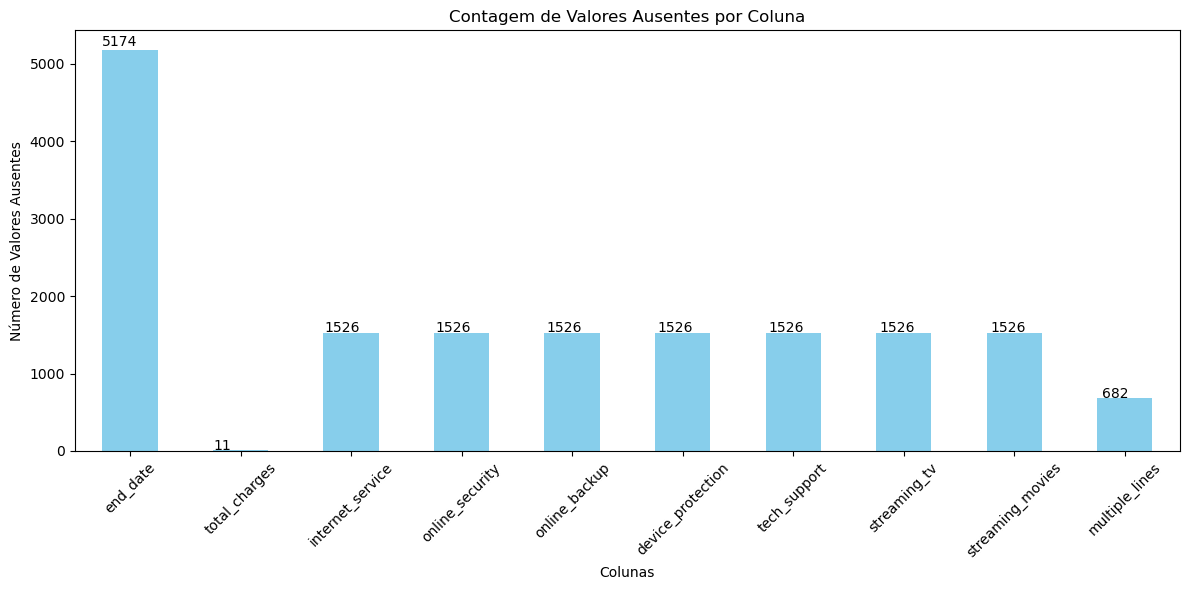

In [22]:
# Gráfico de barras para valores ausentes
plt.figure(figsize=(12, 6))
ax = missing_values[missing_values > 0].plot(kind='bar', color='skyblue')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.01))

missing_values[missing_values > 0].plot(kind='bar', color='skyblue')
plt.title('Contagem de Valores Ausentes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Número de Valores Ausentes')
plt.xticks(rotation=45)  # Inclina os nomes das colunas a 45º
plt.tight_layout()  # Ajusta o layout para melhor visualizaçã

plt.show()


 **Valores Ausentes**:

- A coluna `end_date` continua apresentando valores nulos, o que é esperado, pois muitos contratos ainda estão ativos.

- A coluna `TotalCharges` contém 11 valores ausentes que representam aproximadamente 0,16% das linhas totais (11 de 7043). Esses valores podem introduzir inconsistências na análise, principalmente por se tratar de uma variável acumulativa crucial para entender o comportamento de pagamento e a probabilidade de churn (cancelamento de contrato).

- As colunas relacionadas a serviços de internet e múltiplas linhas possuem valores ausentes, indicando a não utilização desses serviços por alguns clientes.

- As colunas relacionadas a serviços de internet (ex., `internet_service`, `online_security`) possuem 1526 valores ausentes, indicando que alguns clientes não utilizam esses serviços.

- A coluna `multiple_lines` possui 682 valores ausentes, sugerindo que nem todos os clientes possuem múltiplas linhas telefônicas.


**Ações Proposta:**


- Preencher com `'No'` as colunas relacionadas a serviços de internet e múltiplas linhas.
- Excluir as linhas com valores ausentes em `TotalCharges`: Como o número de linhas afetadas é pequeno, sua exclusão não deve impactar significativamente os resultados, e garantir que todas as linhas possuam valores válidos mantém a consistência dos dados.

In [23]:
# Tratamento de valores ausentes
internet_columns = ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
df_merged[internet_columns] = df_merged[internet_columns].fillna('No')
df_merged['multiple_lines'] = df_merged['multiple_lines'].fillna('No')

In [24]:
# Excluir linhas com valores NaN em 'total_charges'
df_merged.dropna(subset=['total_charges'], inplace=True)

In [25]:
# Verificar se há mais valores ausentes em 'TotalCharges'
df_merged['total_charges'].isna().sum()

0

#### Examinar Duplicatas

In [26]:
# Duplicatas claras sobre o dataframe df_merged
num_duplicates = df_merged.duplicated().sum()

In [27]:
# Verificando se há duplicatas implícitas
has_duplicates = df_merged.duplicated().any()

In [28]:
# Exibindo os resultados
print(f"Número de duplicatas claras: {num_duplicates}")
print(f"Existem duplicatas implícitas? {has_duplicates}")

Número de duplicatas claras: 0
Existem duplicatas implícitas? False


**Duplicatas**
- Não há duplicatas claras ou implícitas no conjunto de dados, o que indica que os dados são únicos e não redundantes.


### Estatísticas Descritivas

In [29]:
# conjunto de estatisticas quantitativas comuns sobre o dataframe df_merged
df_merged.describe()

,begin_date,end_date,monthly_charges,total_charges,senior_citizen
count,7032,1869,7032.000000,7032.000000,7032.000000
mean,2017-04-28 23:14:44.641638400,2019-11-15 21:31:18.009630976,64.798208,2283.300441,0.162400
min,2013-10-01 00:00:00,2019-10-01 00:00:00,18.250000,18.800000,0.000000
25%,2015-06-01 00:00:00,2019-11-01 00:00:00,35.587500,401.450000,0.000000
50%,2017-09-01 00:00:00,2019-11-01 00:00:00,70.350000,1397.475000,0.000000
75%,2019-04-01 00:00:00,2019-12-01 00:00:00,89.862500,3794.737500,0.000000
max,2020-01-01 00:00:00,2020-01-01 00:00:00,118.750000,8684.800000,1.000000
std,NaN,NaN,30.085974,2266.771362,0.368844


**Estatísticas quantitativas**

- `begin_date`: Varia entre `2013-10-01` e `2020-01-01`, com a maioria dos contratos iniciando após `2017-09-01`. Isso sugere uma expansão na base de clientes nos últimos anos.
- `end_date`: Os valores variam de `2019-10-01` a `2020-01-01`. Muitos valores nulos indicam contratos ainda ativos. A concentração de encerramentos próximos ao final do período sugere que a análise de rotatividade pode ser mais relevante em anos recentes.
- `monthly_charges`: Média de aproximadamente 64.79, amplitude de 18.25 a 118.75, com uma distribuição razoável.
- `senior_citizen`: Apenas 16.2% dos clientes são idosos. A distribuição é bastante desbalanceada, com maioria de clientes não idosos.

**Conclusão**: Há uma variação considerável nos valores de cobrança mensal, e a maioria dos clientes não são idosos.

### Estatisticas Qualitativas

In [30]:
# conjunto de estatisticas qualitativas comuns sobre o dataframe df_merged
df_merged.describe(include='O')

,customer_id,type,paperless_billing,payment_method,gender,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,3,2,4,2,2,2,3,2,2,2,2,2,2,2
top,7590-VHVEG,Month-to-month,Yes,Electronic check,Male,No,No,Fiber optic,No,No,No,No,No,No,No
freq,1,3875,4168,2365,3549,3639,4933,3096,5017,4607,4614,4992,4329,4301,4065


**Estatísticas Qualitativas**
- A maioria dos clientes tem contratos mensais, opta pelo faturamento eletrônico e usa o método de pagamento `"Electronic check"`.
- A maior parte dos clientes não utiliza serviços adicionais (como `segurança online`, `suporte técnico`).
- Distribuição demográfica é equilibrada em relação ao gênero, mas a maioria dos clientes não possui parceiro(a) nem dependentes.


### Analisar a Distribuição dos Dados

**Visualização da Distribuição das Variáveis Categóricas**

Aqui, visualizamos a distribuição de algumas variáveis categóricas para entender melhor a composição dos dados e identificar padrões relevantes para a análise de churn.

In [31]:
# Selecionar colunas categóricas (exceto customerID)
categorical_columns = df_merged.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop(['customer_id'])

In [32]:
# Agrupar variáveis relacionadas
internet_related = ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
demographic_related = ['gender', 'partner', 'dependents']
contract_related = ['type', 'paperless_billing', 'payment_method', 'multiple_lines']

In [33]:
# Aplicar estilo seaborn-darkgrid 
sns.set_style('darkgrid')

In [34]:
# Função para plotar os gráficos agrupados
def plot_categorical_distribution(columns, title_group):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 4, i)
        sns.countplot(data=df_merged, x=col, palette='pastel')
        plt.title(f'Distribuição de {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.suptitle(title_group, fontsize=16, y=1.05)
    plt.show()

#### Distribuição de Variáveis Relacionadas ao Contrato

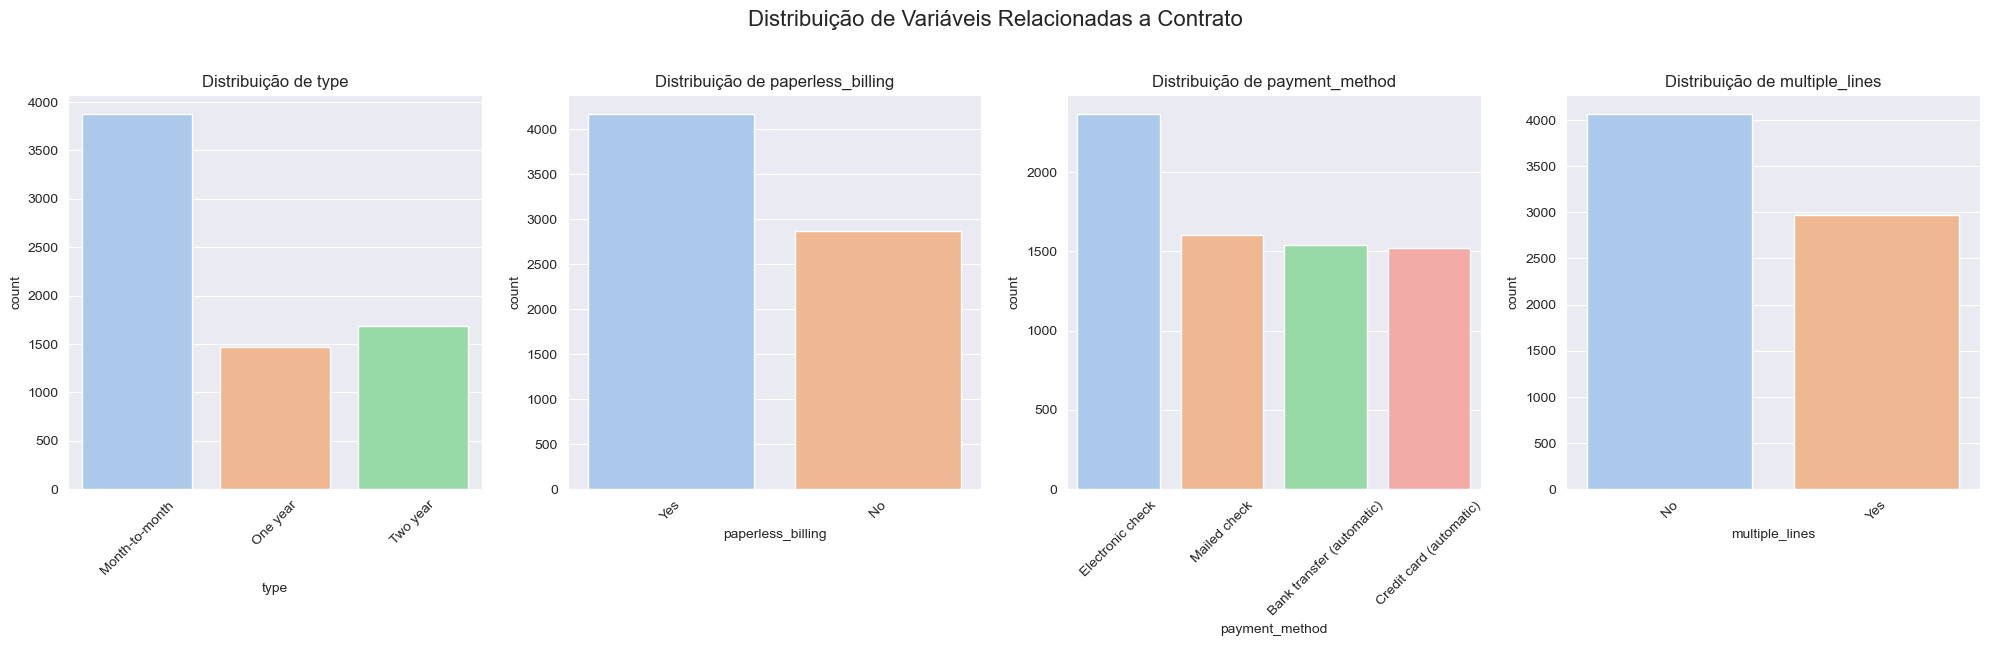

In [35]:
# Visualizar distribuição das variáveis relacionadas a contrato
plot_categorical_distribution(contract_related, 'Distribuição de Variáveis Relacionadas a Contrato')

**Análise**:
- A maioria dos clientes possui contratos do tipo `'Month-to-month'`, sugerindo menor lealdade ao serviço e maior propensão à rotatividade (churn).
- O método de pagamento mais comum é `'Electronic Check'`, o que pode indicar uma preferência por métodos que não são automáticos, podendo afetar a retenção de clientes.
- A maioria dos clientes opta pelo faturamento eletrônico (`'Paperless Billing'`), destacando a importância da digitalização.

#### Distribuição de Variáveis Demográficas

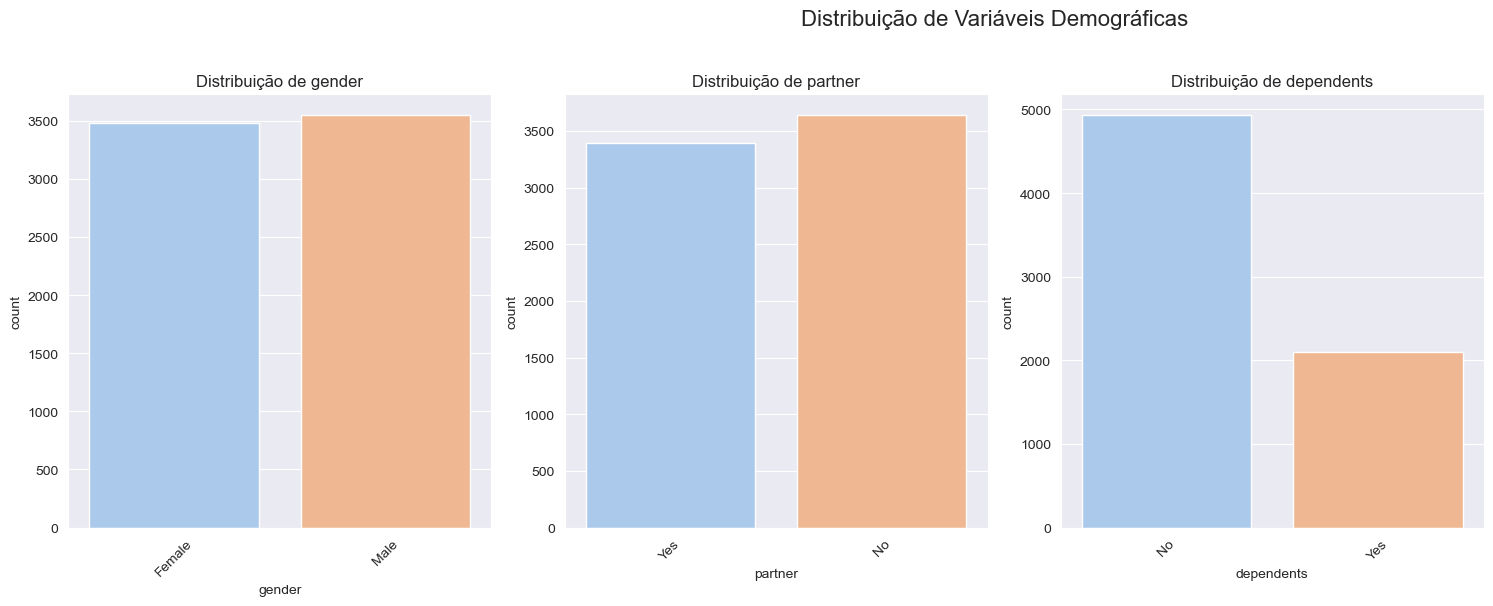

In [36]:
# Visualizar distribuição das variáveis demográficas
plot_categorical_distribution(demographic_related, 'Distribuição de Variáveis Demográficas')

**Análise**:
- A distribuição entre gêneros (`'gender'`) é equilibrada, sem grandes diferenças.
- A maioria dos clientes não possui parceiros (`'partner'`) e dependentes (`'dependents'`), o que pode influenciar o comportamento de uso do serviço e a rotatividade.

#### Distribuição de Variáveis Relacionadas a Serviços de Internet

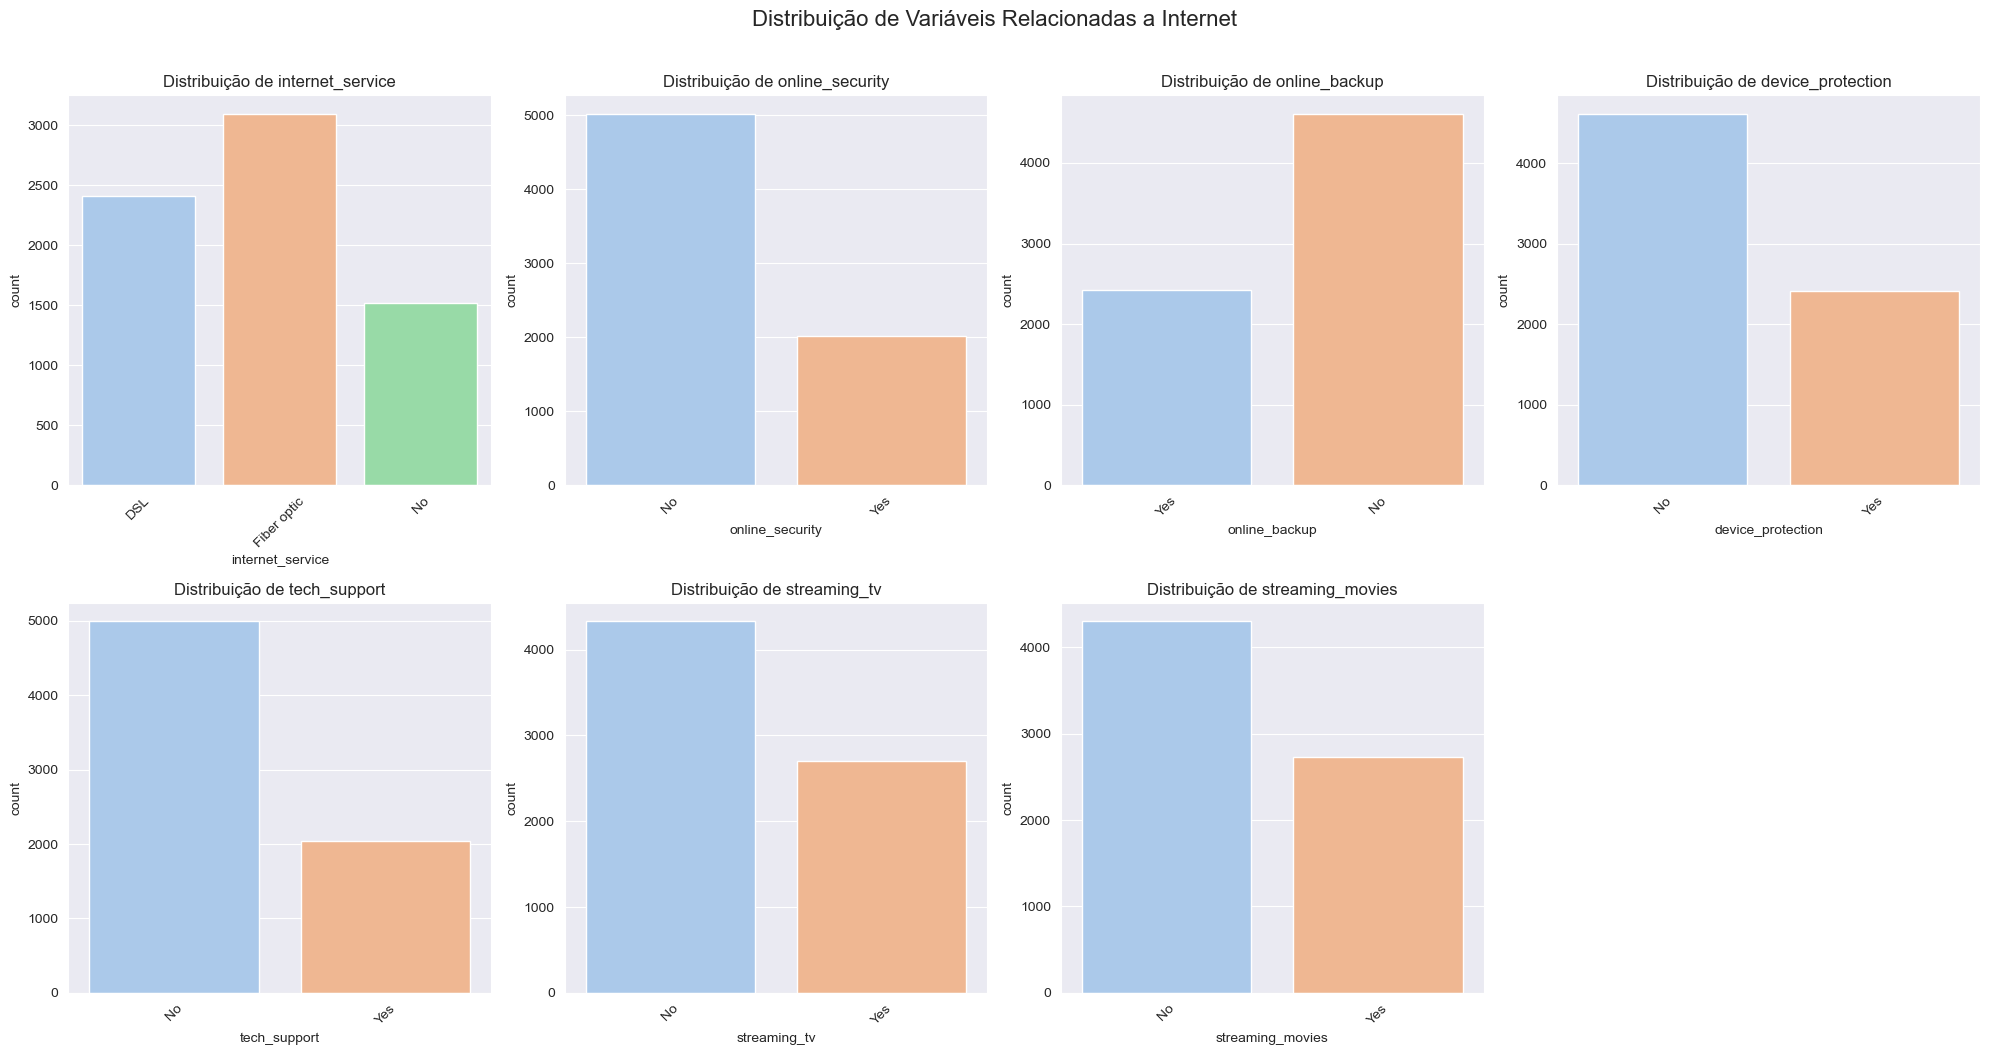

In [37]:
# Visualizar distribuição das variáveis relacionadas a serviços de internet
plot_categorical_distribution(internet_related, 'Distribuição de Variáveis Relacionadas a Internet')

**Análise**:

- A maioria dos clientes usa `'Fiber optic'` como serviço de internet. Um grupo significativo de clientes não utiliza certos serviços adicionais, como `'Online Security'` e `'Tech Support'`, o que pode afetar o churn, pois clientes com menos serviços extras podem ser mais propensos ao cancelamento.

#### Visualização das Variáveis Númericas

Visualizamos a distribuição das variáveis numéricas para identificar padrões e possíveis anomalias.

In [38]:
# Selecionando variáveis numéricas
numeric_columns = df_merged.select_dtypes(include=['float64', 'int64']).columns

<Figure size 1500x1000 with 0 Axes>

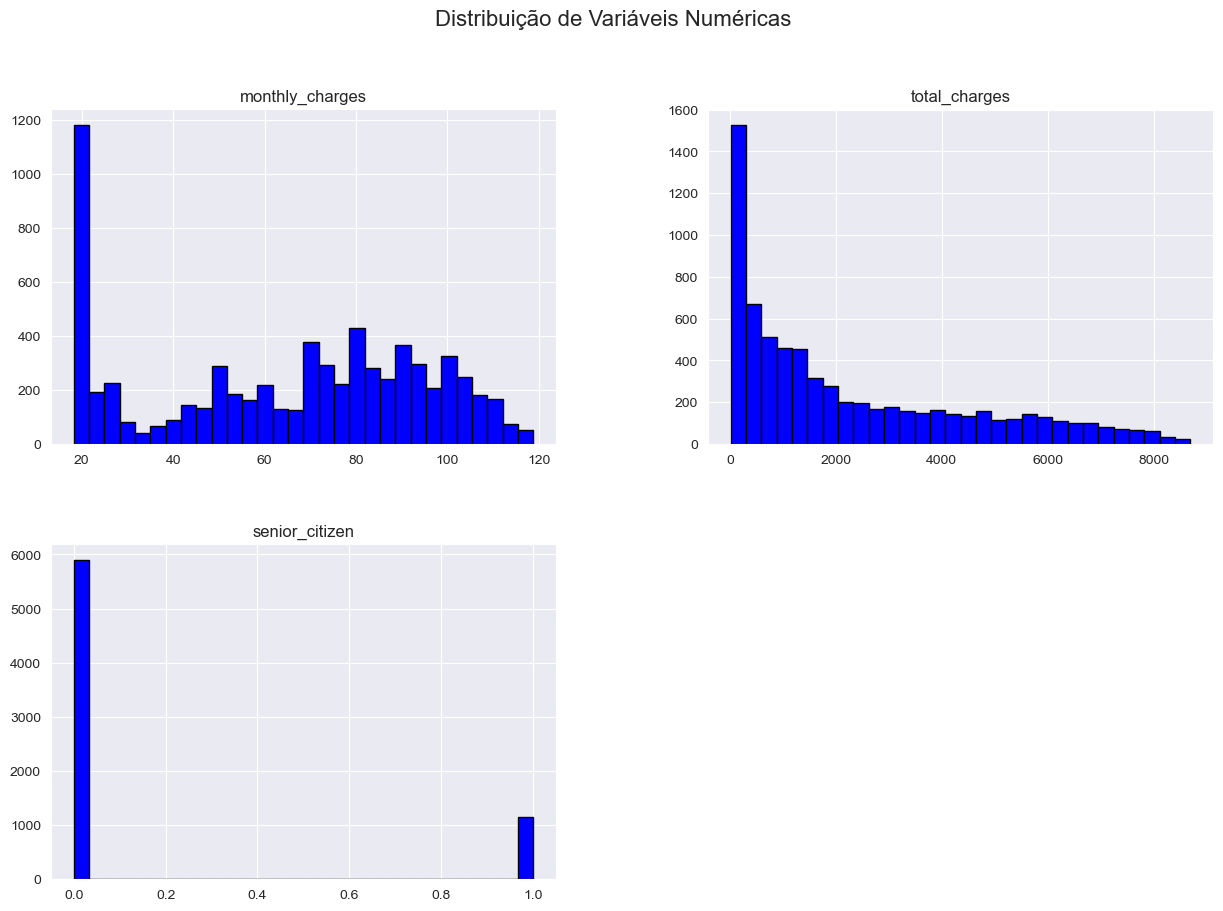

In [39]:
# Plotar histogramas para variáveis numéricas
plt.figure(figsize=(15, 10))
df_merged[numeric_columns].hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Distribuição de Variáveis Numéricas', fontsize=16)
plt.show()

**Análise:**
- **Monthly Charges**: A distribuição é bimodal, indicando a existência de dois grupos distintos de clientes com diferentes níveis de cobrança mensal.
- **Total Charges**: A distribuição é assimétrica à direita (skewed), indicando que a maioria dos clientes tem menores cobranças acumuladas ao longo do tempo.
- **Senior Citizen**: A maioria dos clientes não é idosa (valor 0), mas há uma pequena parcela de clientes idosos (valor 1).

#### Analisar Outliers com Boxplots

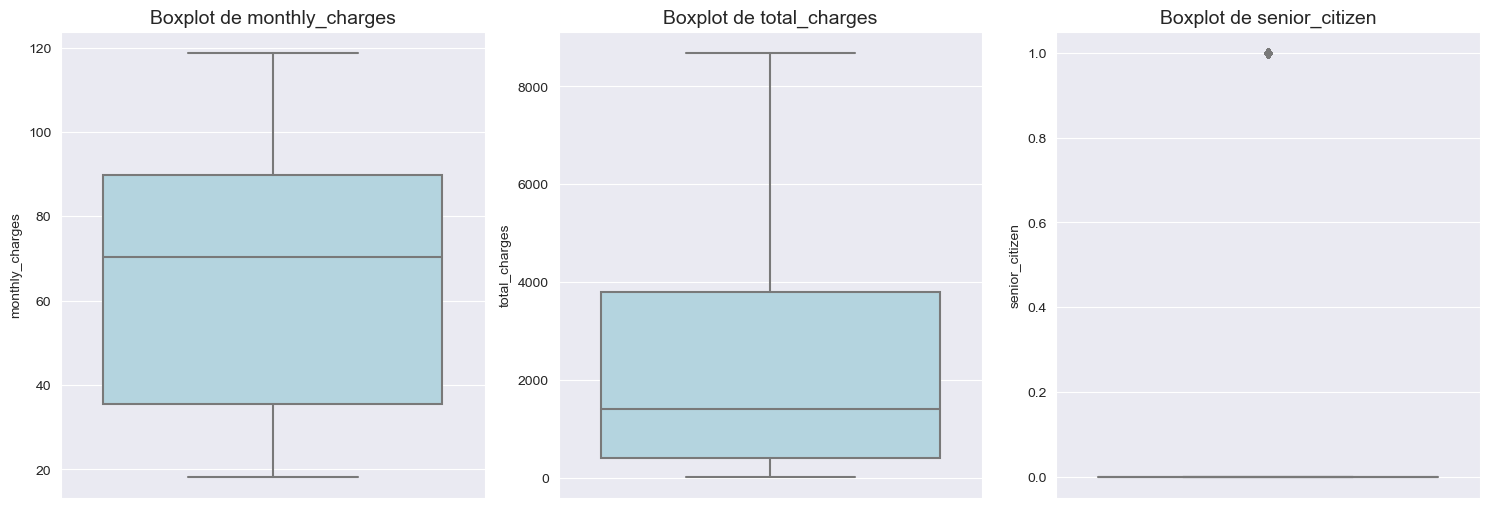

In [40]:
# Plotar boxplots para variáveis numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_merged, y=col, color='lightblue')
    plt.title(f'Boxplot de {col}', fontsize=14)
plt.tight_layout()
plt.show()

**Análise:**
- **Monthly Charges**: A maioria das cobranças está concentrada entre 40 e 90, sem muitos outliers visíveis.
- **Total Charges**: Não apresenta muitos outliers, exceto no limite superior, reforçando a assimetria observada no histograma.
- **Senior Citizen**: Há um outlier em `senior_citizen`, mas, dado o contexto, é esperado pela natureza da variável binária.

#### Analisar Correlações

Aqui exploramos as correlações entre variáveis numéricas para identificar possíveis relações que possam influenciar o churn.

In [41]:
# Selecionar apenas as colunas numéricas
numeric_columns = df_merged.select_dtypes(include=['number']).columns

In [42]:
# Calcular a correlação entre as colunas numéricas
correlation_matrix = df_merged[numeric_columns].corr()

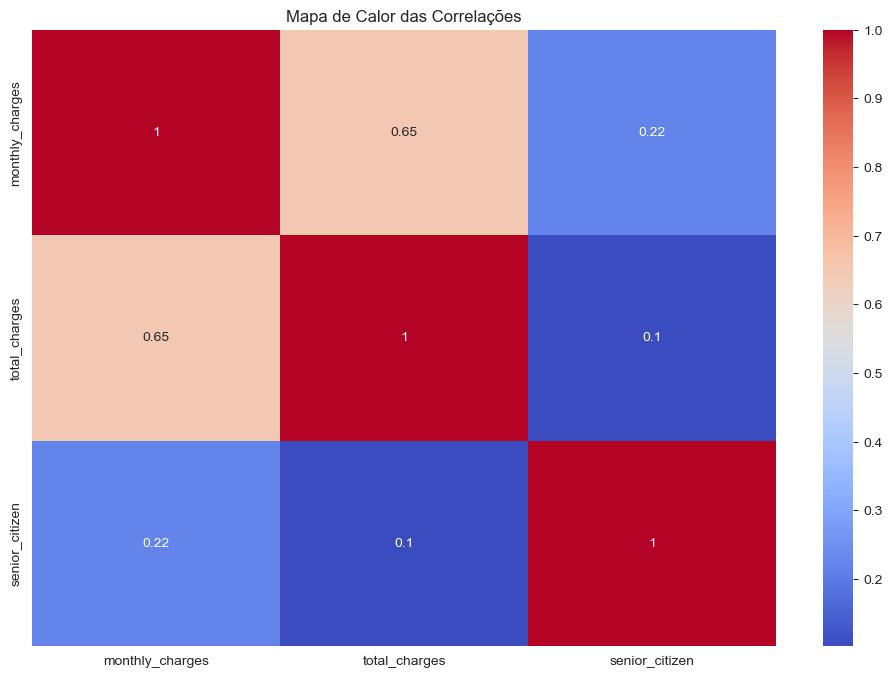

In [43]:
# Plotar o mapa de calor das correlações
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()

**Análise das Correlações:**

- **Monthly Charges e Total Charges:** Forte correlação positiva (0.65), indicando que clientes com cobranças mensais altas tendem a ter um valor total acumulado maior, o que é esperado.
- **Senior Citizen:** Apresenta correlações fracas com outras variáveis, sugerindo baixa influência direta no churn.
- **Churn:** Embora não esteja diretamente presente no heatmap, as análises futuras podem se concentrar na relação de churn com variáveis como `monthly_charges`.

**Conclusões e Próximos Passos**
- A análise das variáveis categóricas destacou características importantes, como a prevalência de contratos mensais e a preferência por métodos de pagamento eletrônicos, que podem influenciar o churn.
- A análise das variáveis numéricas revelou padrões como a bimodalidade de `monthly_charges`, que pode indicar diferentes perfis de clientes.
- A correlação entre `monthly_charges` e `total_charges` é significativa, indicando uma relação direta entre as cobranças mensais e o total acumulado ao longo do tempo.

**Próximos Passos:**
- Incluir variáveis selecionadas para a modelagem preditiva de churn.
- Preparar os dados para a modelagem, incluindo normalização e codificação das variáveis categóricas.


## Criar e Selecionar Features

**Criar e Selecionar Features**
   - **Objetivo:** Desenvolver novas variáveis a partir das existentes para aprimorar o desempenho do modelo.
   - **Ações:**
     - Criar features baseadas em interações entre variáveis categóricas e numéricas.
     - Extrair informações de colunas de datas e agregar dados úteis.
     - Realizar validação das features criadas para assegurar a sua importância no modelo.

### Criar Novas Features

In [44]:
# Criar a variável alvo com base na coluna end_date
df_merged['target'] = df_merged['end_date'].notna().astype('int64')

In [45]:
# Feature de duração do contrato
df_merged['contract_duration'] = (df_merged['end_date'] - df_merged['begin_date']).dt.days
df_merged['contract_duration'].fillna((pd.to_datetime('2020-02-01') - df_merged['begin_date']).dt.days, inplace=True)

In [46]:
# Média de cobranças mensais
df_merged['average_charges'] = df_merged['total_charges'] / df_merged['contract_duration']

In [47]:
# Cobranças mensais por SeniorCitizen
df_merged['monthly_charges_per_senior_citizen'] = df_merged['monthly_charges'] * df_merged['senior_citizen']
df_merged['total_charges_per_senior_citizen'] = df_merged['total_charges'] * df_merged['senior_citizen']

In [48]:
# Feature de cobranças altas
df_merged['high_monthly_charges'] = (df_merged['monthly_charges'] > df_merged['monthly_charges'].median()).astype(int)

In [49]:
# Feature de contrato de longo prazo
df_merged['long_term_contract'] = (df_merged['contract_duration'] > 365).astype(int)

In [50]:
# Verificar as primeiras linhas do DataFrame após a engenharia de features
df_merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,streaming_tv,streaming_movies,multiple_lines,target,contract_duration,average_charges,monthly_charges_per_senior_citizen,total_charges_per_senior_citizen,high_monthly_charges,long_term_contract
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,No,No,0,31.0,0.962903,0.0,0.0,0,0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,No,No,0,1036.0,1.823842,0.0,0.0,0,1
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,No,No,1,61.0,1.772951,0.0,0.0,0,0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,No,No,0,1371.0,1.342633,0.0,0.0,0,1
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,No,1,61.0,2.486066,0.0,0.0,1,0


**Conclusões Preliminares sobre as Novas Características**

- **Criação da variável 'target'**:
    - A criação da variável alvo baseada em end_date, informa que o valor de target = 1 representa churn (cliente que cancelou) e target = 0 representa um cliente ativo.

- **Duração do Contrato (contract_duration)**:
    - **Motivação**: A duração do contrato pode estar fortemente relacionada à lealdade do cliente. Contratos mais longos podem indicar clientes mais fiéis, enquanto contratos curtos podem sugerir uma maior propensão ao churn. Para clientes ativos (aqueles sem uma data de fim), foi utilizada a data futura 2020-02-01, o que é uma estratégia eficiente para indicar que esses clientes ainda estão com contrato vigente até a data da análise. Essa abordagem garante que todos os clientes tenham um valor preenchido para a duração do contrato, mesmo aqueles que ainda não encerraram o serviço.

- **Média de Cobranças Mensais (average_charges)**:
    - **Motivação**: Calculamos essa feature para entender o comportamento financeiro médio de cada cliente ao longo do tempo. Isso pode ajudar a capturar o impacto de variações nas cobranças mensais e como isso influencia a rotatividade.

- **Cobranças Mensais e Totais por Senior Citizens**:
    - **Motivação**: Clientes mais velhos podem ter padrões de uso e cobranças diferentes. Multiplicar as cobranças pelos status de `senior_citizen` permite investigar se esses clientes apresentam comportamento financeiro atípico e se isso afeta a retenção de clientes.

- **Cobranças Altas (high_monthly_charges)**:
    - **Motivação**: Clientes com cobranças mensais acima da mediana podem ter expectativas diferentes e, portanto, diferentes comportamentos em termos de rotatividade.

- **Contrato de Longo Prazo (long_term_contract)**:
    - **Motivação**: Contratos com mais de um ano de duração podem indicar comprometimento a longo prazo, o que pode influenciar o churn.

Essas variáveis foram criadas com base em uma análise de negócios e espera-se que agreguem valor ao modelo, destacando padrões que as features originais talvez não capturassem sozinhas.


Após a criação das novas features, é importante verificar sua distribuição para garantir que sejam adequadas ao modelo. Abaixo, analisamos as distribuições e outliers das novas variáveis.


### Validar as Features Criadas

In [51]:
# Lista de novas features para análise
new_features = ['contract_duration', 'average_charges', 
                'monthly_charges_per_senior_citizen', 'total_charges_per_senior_citizen',
                'high_monthly_charges', 'long_term_contract']

<Figure size 1500x1000 with 0 Axes>

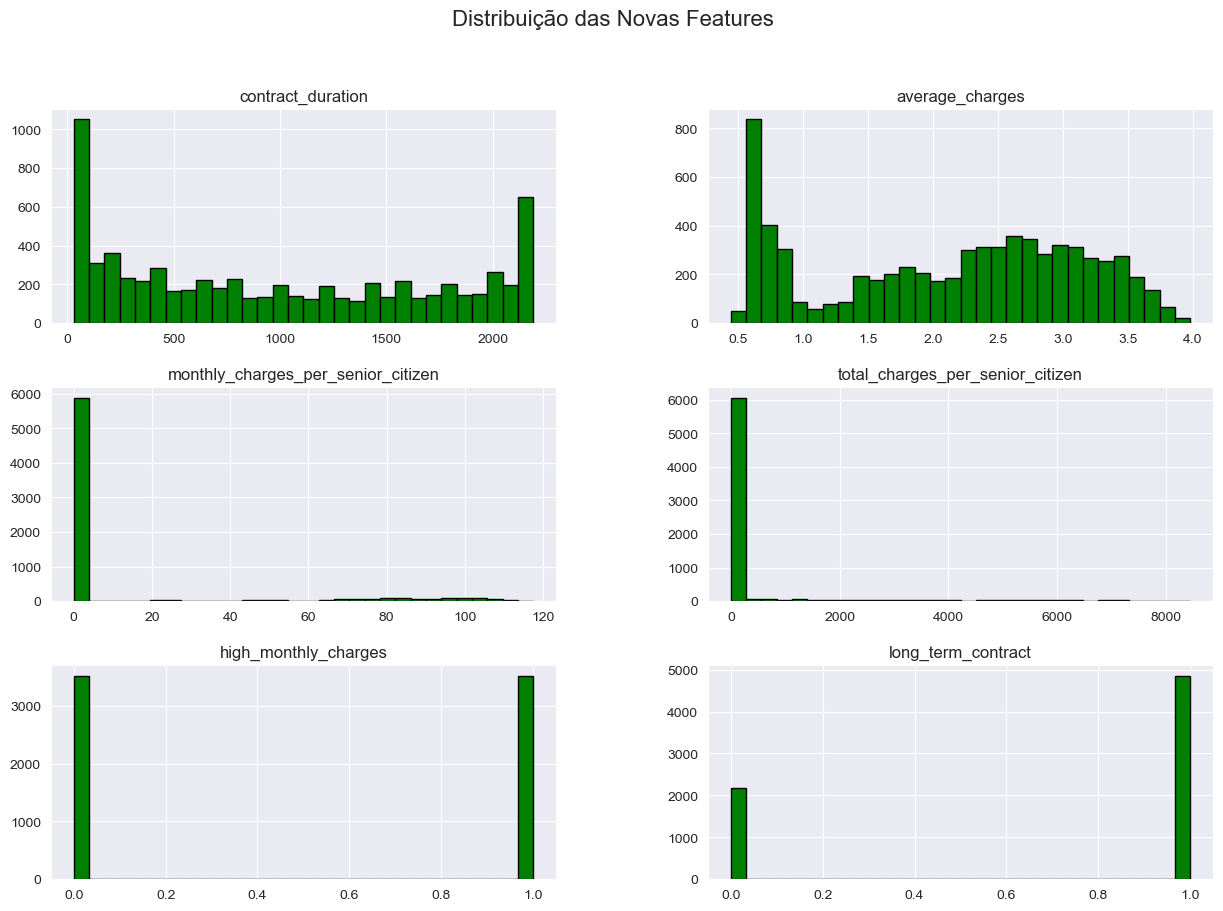

In [52]:
# Plotar histogramas para as novas features
plt.figure(figsize=(15, 10))
df_merged[new_features].hist(bins=30, figsize=(15, 10), color='green', edgecolor='black')
plt.suptitle('Distribuição das Novas Features', fontsize=16)
plt.show()

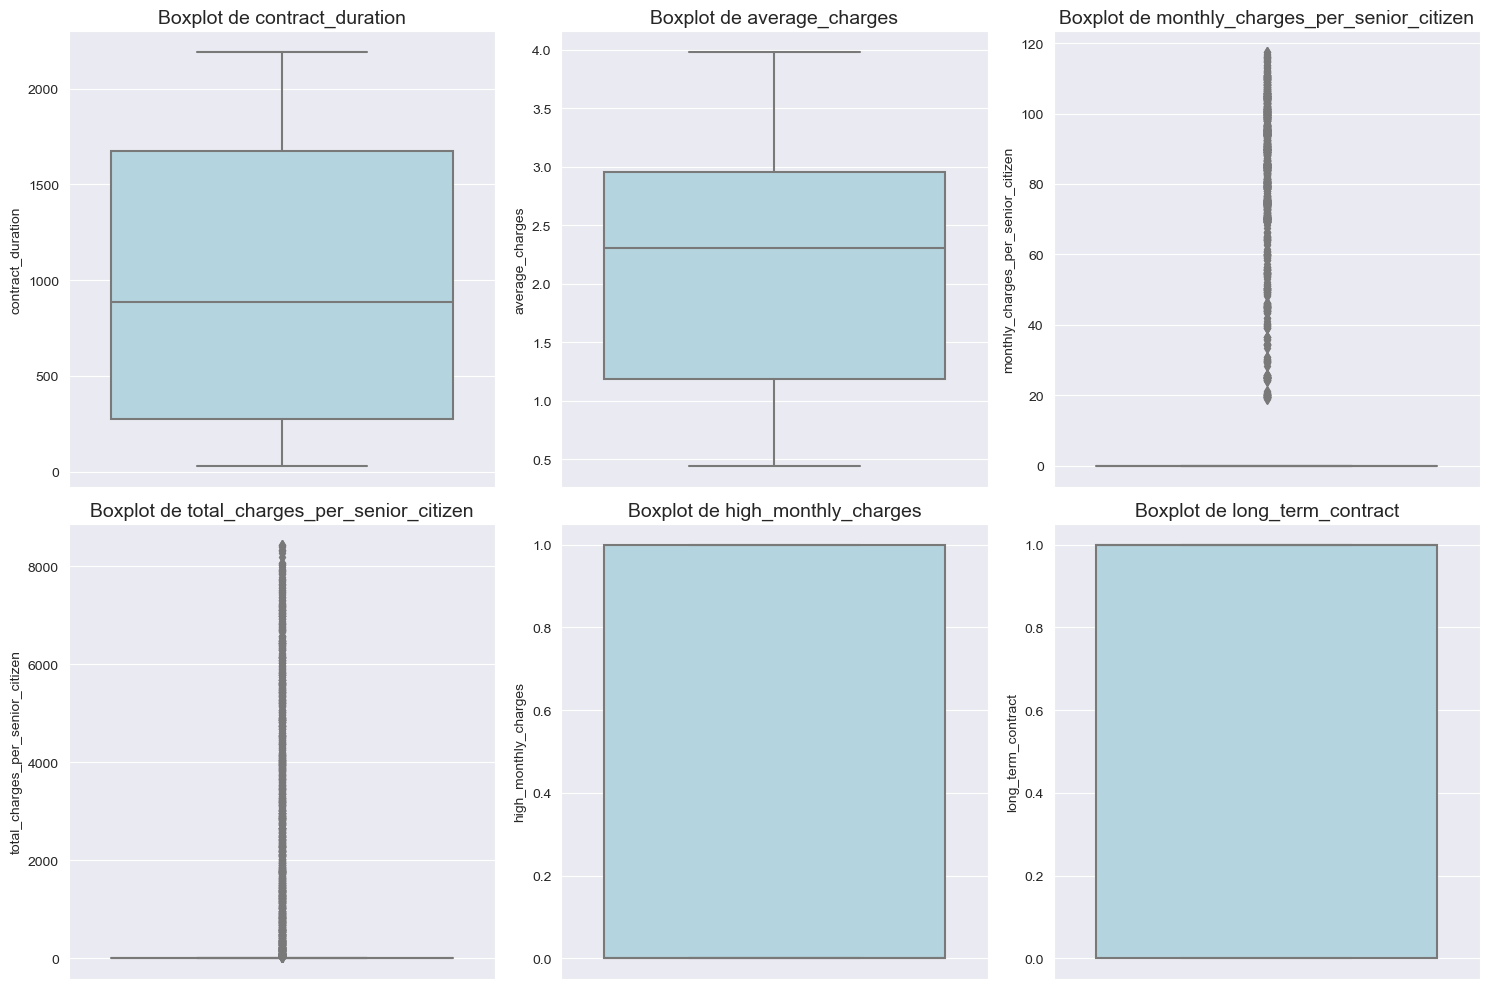

In [53]:
# Plotar boxplots para as novas features
plt.figure(figsize=(15, 10))
for i, col in enumerate(new_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_merged, y=col, color='lightblue')
    plt.title(f'Boxplot de {col}', fontsize=14)
plt.tight_layout()
plt.show()

Observamos que a distribuição de algumas features, como `contract_duration`, é bem dispersa, enquanto outras, como `monthly_charges_per_senior_citizen`, possuem uma alta concentração em valores baixos, com alguns outliers significativos.

**Conclusões a partir das distribuições das novas features**:

1. **Duração do Contrato (Contract Duration)**:
    - A distribuição da feature mostra que muitos contratos têm uma duração curta, com picos no início e no final da duração do contrato. Isso sugere que os clientes tendem a cancelar o serviço logo no início ou permanecem por períodos mais longos.

2. **Média de Cobranças Mensais (Average Charges)**:
    - A distribuição é mais dispersa, com um pico em valores mais baixos. Isso indica que a maioria dos clientes paga uma quantia relativamente baixa em média ao longo do tempo.

3. **Cobranças Mensais e Totais por Senior Citizen**:
    - Essas variáveis apresentam uma alta concentração em valores baixos, com alguns outliers visíveis. Isso sugere que a maioria dos clientes seniores tem cobranças mensais e totais mais baixas, mas há exceções significativas que devem ser investigadas.

4. **High Monthly Charges**:
    - A variável é binária, indicando que a maioria dos clientes não paga valores de mensalidades considerados elevados. Isso sugere que clientes com mensalidades mais altas são uma minoria no conjunto de dados.

5. **Long Term Contract**:
    - A maioria dos clientes não possui contratos de longo prazo (mais de 1 ano). Contratos mais curtos, como o "Month-to-month", parecem ser a escolha mais comum entre os clientes.

**Recomendações Finais**:

- **Investigar Outliers**: As variáveis relacionadas aos clientes seniores, especialmente as cobranças mensais e totais, apresentam muitos outliers. Seria interessante investigar esses outliers para entender se eles indicam padrões comportamentais ou possíveis erros de entrada de dados.

- **Utilidade das Novas Features**: As novas features geradas fornecem informações valiosas, especialmente em relação à duração do contrato e cobranças para diferentes grupos de clientes. Esses insights podem ser muito úteis no treinamento de modelos preditivos, como o modelo de churn.


In [54]:
# Função para identificar outliers usando o IQR
def identify_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

In [55]:
# Identificando outliers nas variáveis de cobranças por senior citizens
outliers_monthly = identify_outliers_iqr(df_merged, 'monthly_charges_per_senior_citizen')
outliers_total = identify_outliers_iqr(df_merged, 'total_charges_per_senior_citizen')

In [56]:
# Exibindo as informações dos outliers identificados
print("Outliers nas Cobranças Mensais por Senior Citizens:")
outliers_monthly[['customer_id', 'monthly_charges', 'total_charges', 'senior_citizen', 'contract_duration']]

Outliers nas Cobranças Mensais por Senior Citizens:


,customer_id,monthly_charges,total_charges,senior_citizen,contract_duration
20,8779-QRDMV,39.65,39.65,1,30.0
30,3841-NFECX,96.35,6766.95,1,2163.0
31,4929-XIHVW,95.50,181.65,1,62.0
34,3413-BMNZE,45.25,45.25,1,31.0
50,8012-SOUDQ,90.25,3838.75,1,1310.0
...,...,...,...,...,...
7023,1035-IPQPU,103.50,6479.40,1,1918.0
7029,2235-DWLJU,44.40,263.05,1,184.0
7031,3605-JISKB,60.00,3316.10,1,1676.0
7032,6894-LFHLY,75.75,75.75,1,31.0


In [57]:
print("\nOutliers nas Cobranças Totais por Senior Citizens:")
outliers_total[['customer_id', 'monthly_charges', 'total_charges', 'senior_citizen', 'contract_duration']]


Outliers nas Cobranças Totais por Senior Citizens:


,customer_id,monthly_charges,total_charges,senior_citizen,contract_duration
20,8779-QRDMV,39.65,39.65,1,30.0
30,3841-NFECX,96.35,6766.95,1,2163.0
31,4929-XIHVW,95.50,181.65,1,62.0
34,3413-BMNZE,45.25,45.25,1,31.0
50,8012-SOUDQ,90.25,3838.75,1,1310.0
...,...,...,...,...,...
7023,1035-IPQPU,103.50,6479.40,1,1918.0
7029,2235-DWLJU,44.40,263.05,1,184.0
7031,3605-JISKB,60.00,3316.10,1,1676.0
7032,6894-LFHLY,75.75,75.75,1,31.0


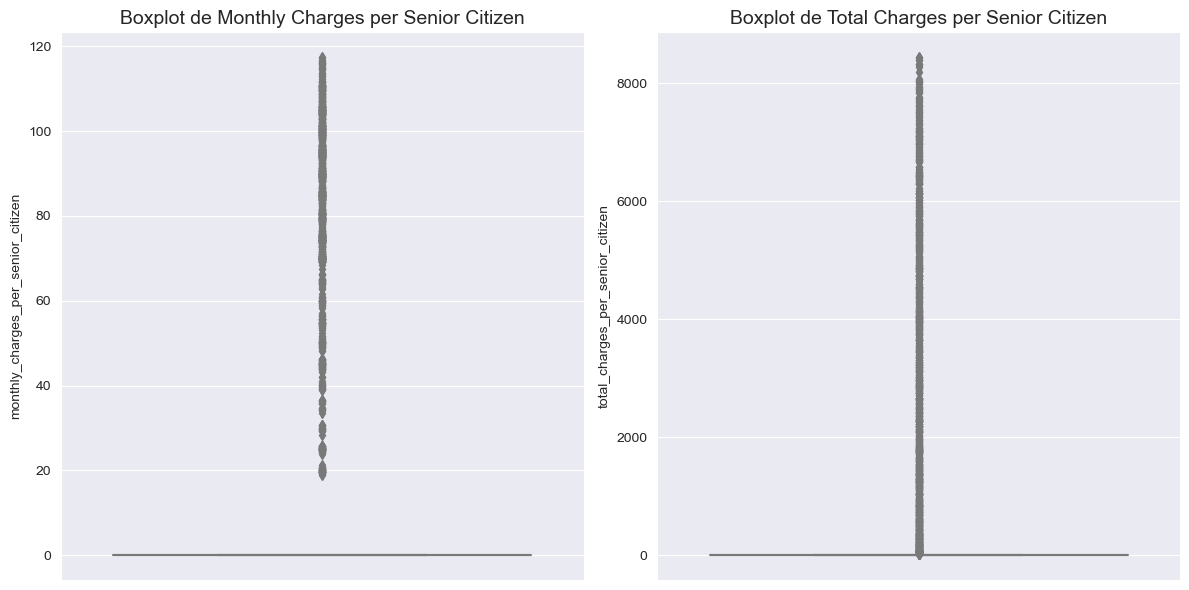

In [58]:
# Visualizando a distribuição dos outliers em boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_merged, y='monthly_charges_per_senior_citizen', color='lightblue')
plt.title('Boxplot de Monthly Charges per Senior Citizen', fontsize=14)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_merged, y='total_charges_per_senior_citizen', color='lightblue')
plt.title('Boxplot de Total Charges per Senior Citizen', fontsize=14)
plt.tight_layout()
plt.show()

In [59]:
# Verificando se os outliers têm correlação com churn ou contratos longos
outliers_analysis = pd.concat([outliers_monthly, outliers_total]).drop_duplicates()
outliers_churn = outliers_analysis[['customer_id', 'target', 'monthly_charges', 'total_charges', 'contract_duration']]
print("\nAnálise de Outliers com Churn e Contratos Longos:")
(outliers_churn.groupby('target').agg({
    'monthly_charges': ['mean', 'median'],
    'total_charges': ['mean', 'median'],
    'contract_duration': ['mean', 'median'],
    'customer_id': 'count'
}).reset_index())


Análise de Outliers com Churn e Contratos Longos:


target monthly_charges         total_charges           contract_duration  \
                    mean  median          mean    median              mean   
0      0       79.182057  84.850   3494.213363  3197.325       1281.181682   
1      1       80.713445  84.825   1853.792332  1161.950        640.308824   

          customer_id  
   median       count  
0  1371.0         666  
1   457.0         476

**Conclusões sobre os Outliers**

1. **Outliers em `monthly_charges_per_senior_citizen`:**
   - A variável de cobranças mensais por cidadãos seniores apresentou uma grande quantidade de outliers. Esses outliers representam clientes que têm cobranças mensais consideravelmente maiores em comparação ao restante dos clientes seniores.
   - Clientes com cobranças mensais altas tendem a ter contratos de longa duração, conforme observado nos dados.
   - Há uma leve correlação entre as cobranças mensais e a duração do contrato, indicando que os clientes com cobranças mais altas podem ser aqueles com contratos mais extensos.

2. **Outliers em `total_charges_per_senior_citizen`:**
   - As cobranças totais também mostraram uma grande quantidade de outliers, sugerindo que certos clientes seniores têm um acúmulo de cobranças totais muito acima da média.
   - Clientes com cobranças totais elevadas também tendem a ter contratos longos, o que pode explicar o acúmulo de valores ao longo do tempo.
   - Esses outliers merecem atenção especial, pois podem indicar clientes mais valiosos para a empresa, com alta retenção ao longo do tempo.

3. **Relação com o `churn`:**
   - Ao analisar a relação entre os outliers e o churn, observamos que clientes com contratos longos e altos valores de cobrança tendem a cancelar menos o serviço (churn menor).
   - O churn médio é mais alto entre os clientes que possuem cobranças mais baixas e contratos de menor duração, o que sugere que o valor das cobranças e a duração do contrato têm um impacto direto na rotatividade do cliente.

4. **Contratos Longos:**
   - Clientes com contratos longos (duração superior a 1000 dias) apresentam uma tendência a acumular valores altos de cobranças mensais e totais, mas têm menor tendência a cancelar o serviço.
   - Clientes seniores com contratos longos e valores de cobrança mais altos podem estar mais satisfeitos com o serviço, indicando uma relação inversa entre churn e o total de cobranças acumuladas.

**Resumo:**

**Outliers Úteis:** Os outliers aqui não são erros ou ruído, mas sim potenciais grupos de clientes que têm comportamentos distintos.

**Ação:** Considerar abordagens específicas para esse grupo em estratégias de retenção ou fidelização.


Essas análises podem ser usadas para ajustar estratégias de retenção de clientes seniores, especialmente aqueles com valores de cobrança mais altos. Além disso, é importante monitorar os clientes com contratos de menor duração e cobranças baixas, pois esses perfis podem ter uma maior tendência de cancelar o serviço.

> Nota: Essas novas features foram criadas com base em insights de negócios e análise exploratória e serão validadas durante o treinamento dos modelos para determinar sua importância na predição do churn.


## Pré-Processar os Dados

   - **Ações**
     - **Codificar e Normalizar Variáveis:** 
       - Ajustar os tipos de dados para garantir a consistência.
       - Identificar variáveis categóricas e utilizar `OneHotEncoder` do `scikit-learn` para codificá-las.
       - Normalizar e padronizar variáveis numéricas usando `StandardScaler`.
     - **Verificar e Balancear as Classes:** 
       - Analisar a distribuição das classes e aplicar `SMOTE` no conjunto de treinamento para lidar com o desbalanceamento.
     - **Dividir Dataset:** 
       - Dividir os dados em conjuntos de treinamento, validação e teste com `train_test_split`.

### Codificar e Normalizar Variáveis

Esta seção detalha o pré-processamento dos dados antes da modelagem. As etapas incluem ajustar tipos de dados, codificar variáveis categóricas, normalizar variáveis numéricas e realizar verificações finais.

#### Ajustar os Tipos de Dados

In [60]:
# Informações gerais sobre df_merged
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   customer_id                         7032 non-null   object        
 1   begin_date                          7032 non-null   datetime64[ns]
 2   end_date                            1869 non-null   datetime64[ns]
 3   type                                7032 non-null   object        
 4   paperless_billing                   7032 non-null   object        
 5   payment_method                      7032 non-null   object        
 6   monthly_charges                     7032 non-null   float64       
 7   total_charges                       7032 non-null   float64       
 8   gender                              7032 non-null   object        
 9   senior_citizen                      7032 non-null   int64         
 10  partner                      

Primeiro, ajustamos os tipos das colunas binárias (`high_monthly_charges`, `long_term_contract` e `target`) para bool. Esse passo é importante para garantir que essas variáveis sejam corretamente interpretadas como variáveis categóricas em etapas posteriores.

**Código**

In [61]:
# Ajustar os tipos de colunas binárias para 'bool'
df_merged['high_monthly_charges'] = df_merged['high_monthly_charges'].astype(bool)
df_merged['long_term_contract'] = df_merged['long_term_contract'].astype(bool)

#### Identificar Variáveis Categóricas

Antes de codificar, identificamos as colunas categóricas. Incluímos `senior_citizen` nesta lista, pois ela é uma variável binária representando "Sim" ou "Não".

In [62]:
# Nome das colunas
df_merged.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines', 'target',
       'contract_duration', 'average_charges',
       'monthly_charges_per_senior_citizen',
       'total_charges_per_senior_citizen', 'high_monthly_charges',
       'long_term_contract'],
      dtype='object')

#### Codificar Variáveis Categóricas - One-Hot

Para modelos de aprendizado de máquina, precisamos transformar as variáveis categóricas em um formato numérico. Usaremos a técnica One-Hot Encoding para isso.

Incluímos `senior_citizen` na lista para aplicar a codificação One-Hot.

**Código**

In [63]:
# Lista das colunas categóricas
categorical_columns = ['type', 'paperless_billing', 'payment_method', 'gender', 'partner',
                       'dependents', 'internet_service', 'online_security', 'online_backup',
                       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                       'multiple_lines','senior_citizen']


In [64]:
# Codificar variáveis categóricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df_merged, columns=categorical_columns, drop_first=True)

> Nota: O parâmetro `drop_first=True` é utilizado para evitar multicolinearidade, removendo a primeira categoria de cada variável categórica.

#### Normalizar/Padronizar Variáveis Numéricas - StandardScaler

Usamos a padronização (`StandardScaler`) para normalizar as variáveis numéricas, garantindo que todas tenham média 0 e desvio padrão 1.

**Código**

In [65]:
# Lista das colunas numéricas que queremos normalizar
numeric_featuress = ['monthly_charges', 'total_charges', 'contract_duration', 'average_charges',
                            'monthly_charges_per_senior_citizen', 'total_charges_per_senior_citizen']

In [66]:
# Selecionar colunas numéricas para normalização, excluindo a variável target
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns
numeric_features = numeric_features.drop('target')

In [67]:
# Inicializar o StandardScaler
scaler = StandardScaler()

In [68]:
# Aplicar o scaler nas colunas numéricas
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

#### Ajustes Finais

Aqui, realizamos alguns ajustes finais para manter a estrutura do DataFrame organizada e padronizada. Incluímos:
- Mover a coluna `target` para a última posição.
- Renomear a coluna `senior_citizen_1` para `senior_citizen_Yes` para uma melhor interpretação.


**Código**

In [69]:
# Mover a coluna 'target' para a última posição
cols = list(df_encoded.columns)
cols.append(cols.pop(cols.index('target')))
df_encoded = df_encoded[cols]

In [70]:
# Renomear a coluna 'senior_citizen_1' para 'senior_citizen_Yes' para melhor entendimento
df_encoded.rename(columns={'senior_citizen_1': 'senior_citizen_Yes'}, inplace=True)

#### Verificar e Balancear as Classes

Após todas as transformações, é fundamental verificar a integridade dos dados:
- Confirmar a ausência de valores nulos.
- Verificar se os tipos das variáveis estão corretos.

In [71]:
# Verificar as primeiras linhas do DataFrame final
df_encoded.head()

,customer_id,begin_date,end_date,monthly_charges,total_charges,contract_duration,average_charges,monthly_charges_per_senior_citizen,total_charges_per_senior_citizen,high_monthly_charges,...,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes,senior_citizen_Yes,target
0,7590-VHVEG,2020-01-01,NaT,-1.161694,-0.994194,-1.280334,-1.171804,-0.418746,-0.324245,False,...,False,False,True,False,False,False,False,False,False,0
1,5575-GNVDE,2017-04-01,NaT,-0.260878,-0.173740,0.064866,-0.303518,-0.418746,-0.324245,False,...,False,True,False,True,False,False,False,False,False,0
2,3668-QPYBK,2019-10-01,2019-12-01,-0.363923,-0.959649,-1.240179,-0.354843,-0.418746,-0.324245,False,...,False,True,True,False,False,False,False,False,False,1
3,7795-CFOCW,2016-05-01,NaT,-0.747850,-0.195248,0.513266,-0.788833,-0.418746,-0.324245,False,...,False,True,False,True,True,False,False,False,False,0
4,9237-HQITU,2019-09-01,2019-11-01,0.196178,-0.940457,-1.240179,0.364358,-0.418746,-0.324245,True,...,False,False,False,False,False,False,False,False,False,1


In [72]:
# Verificar se há valores nulos no DataFrame
df_encoded.isnull().sum()

customer_id                                  0
begin_date                                   0
end_date                                  5163
monthly_charges                              0
total_charges                                0
contract_duration                            0
average_charges                              0
monthly_charges_per_senior_citizen           0
total_charges_per_senior_citizen             0
high_monthly_charges                         0
long_term_contract                           0
type_One year                                0
type_Two year                                0
paperless_billing_Yes                        0
payment_method_Credit card (automatic)       0
payment_method_Electronic check              0
payment_method_Mailed check                  0
gender_Male                                  0
partner_Yes                                  0
dependents_Yes                               0
internet_service_Fiber optic                 0
internet_serv

In [73]:
# Verificar informações gerais do DataFrame
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   customer_id                             7032 non-null   object        
 1   begin_date                              7032 non-null   datetime64[ns]
 2   end_date                                1869 non-null   datetime64[ns]
 3   monthly_charges                         7032 non-null   float64       
 4   total_charges                           7032 non-null   float64       
 5   contract_duration                       7032 non-null   float64       
 6   average_charges                         7032 non-null   float64       
 7   monthly_charges_per_senior_citizen      7032 non-null   float64       
 8   total_charges_per_senior_citizen        7032 non-null   float64       
 9   high_monthly_charges                    7032 non-null   b

**Conclusões**
- **Tipos de dados**: Ajustamos os tipos das variáveis binárias para `bool` antes da codificação, isso garante que o modelo interprete essas variáveis corretamente.
- **One-Hot Encoding**: Codificamos as variáveis categóricas usando One-Hot Encoding, incluindo a variável binária `senior_citizen`.
- **Normalização**: Aplicamos a normalização nas variáveis numéricas para garantir que todas tenham a mesma escala.
- **Estrutura Final**: O DataFrame final contém 31 colunas, com todas as variáveis categóricas convertidas para formato binário e as variáveis numéricas padronizadas.

Com essas transformações concluídas, os dados estão devidamente preparados para a próxima etapa de modelagem. A organização e limpeza do conjunto de dados são fundamentais para garantir a eficácia dos modelos preditivos.

### Análise do Desbalanceamento de Classes

Usamos esta etapa para analisar a distribuição da variável alvo (`target`) e verificar se há desbalanceamento entre as classes. Isso é especialmente importante porque o desbalanceamento pode afetar diretamente o desempenho dos modelos de machine learning, principalmente em termos de sensibilidade e precisão.

#### Distribuir as Classes

Primeiro, calculamos a contagem e a proporção de cada classe para entendermos a dimensão do desbalanceamento:

In [74]:
# Contar a distribuição das classes
class_distribution = df_encoded['target'].value_counts()
print("Distribuição das Classes:")
class_distribution

Distribuição das Classes:


target
0    5163
1    1869
Name: count, dtype: int64

In [75]:
# Calcular a proporção de cada classe
class_proportion = df_encoded['target'].value_counts(normalize=True)
print("\nProporção das Classes:")
class_proportion


Proporção das Classes:


target
0    0.734215
1    0.265785
Name: proportion, dtype: float64

#### Ajustar a Distribuição das Classes

A visualização abaixo mostra a distribuição das classes na variável alvo. Anotamos as porcentagens em cada barra para melhor entendimento.

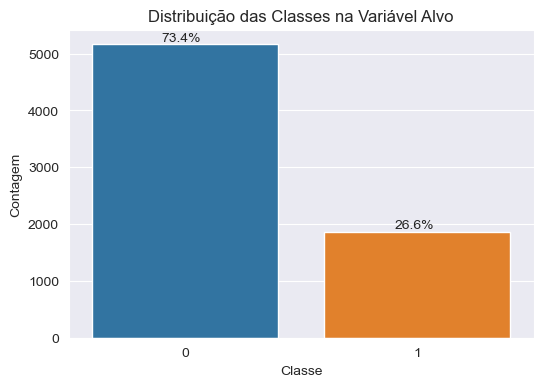

In [76]:
# Visualizar a distribuição das classes
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='target', data=df_encoded)
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(df_encoded)*100:.1f}%', (p.get_x() + 0.3, p.get_height() + 50))
plt.title('Distribuição das Classes na Variável Alvo')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

In [77]:
# Verificar informações gerais de df_merged
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   customer_id                         7032 non-null   object        
 1   begin_date                          7032 non-null   datetime64[ns]
 2   end_date                            1869 non-null   datetime64[ns]
 3   type                                7032 non-null   object        
 4   paperless_billing                   7032 non-null   object        
 5   payment_method                      7032 non-null   object        
 6   monthly_charges                     7032 non-null   float64       
 7   total_charges                       7032 non-null   float64       
 8   gender                              7032 non-null   object        
 9   senior_citizen                      7032 non-null   int64         
 10  partner                      

**Conclusões Intermediárias sobre a Distribuição das Classes**

1. **Distribuição Desbalanceada**:
    - A **classe 0** (clientes que **não cancelaram**) representa aproximadamente **73,4%** dos dados.
    - A **classe 1** (clientes que **cancelaram**) representa aproximadamente **26,6%** dos dados.

2. **Desbalanceamento Moderado**:
    - Embora haja um desbalanceamento, ele não é extremo. No entanto, pode impactar o desempenho do modelo, principalmente nas métricas de sensibilidade (recall) e precisão para a classe minoritária (1). Isso é especialmente importante para minimizar falsos negativos, ou seja, clientes que podem cancelar, mas o modelo não prevê corretamente.

**Abordagens para Lidar com o Desbalanceamento**

Podemos utilizar várias abordagens para lidar com o desbalanceamento das classes:

- **Reamostragem**:
    - **Oversampling (Sobreamostragem)**: Aumentar o número de amostras da classe minoritária.
    - **Undersampling (Subamostragem)**: Reduzir o número de amostras da classe majoritária.
    

    > **Escolha**: Optamos pelo uso da técnica SMOTE (Synthetic Minority Over-sampling Technique) para aumentar a quantidade de amostras da classe minoritária, equilibrando o conjunto de dados de forma a manter as características das amostras originais.

- **Uso de Algoritmos Sensíveis ao Desbalanceamento**:
    - Algoritmos como **Random Forest**, **XGBoost**, ou outros que têm parâmetros para lidar com classes desbalanceadas.

- **Ajuste de Penalidades (Weights)**:
    - Atribuir pesos às classes no modelo para penalizar mais os erros nas classes minoritárias.

**Próximos Passos**

Vamos inicialmente aplicar a técnica de **Reamostragem Oversampling com SMOTE** para balancear a quantidade de amostras da classe minoritária antes de prosseguirmos com a fase de modelagem. Em seguida, também experimentaremos algoritmos sensíveis ao desbalanceamento e ajustes de penalidades para encontrar a melhor abordagem.


### Exportar Conjunto de Dados Pré-Processado

Após realizar o pré-processamento dos dados, é importante exportar o novo conjunto de dados processado para um arquivo CSV. Isso permite que o dataset limpo seja utilizado nas próximas etapas, como divisão em conjuntos de treinamento, validação e teste, e no treinamento de modelos. A exportação também garante que o processo de limpeza dos dados seja replicável e documentado para futuras análises.

O conjunto de dados pré-processado foi exportado para a pasta do projeto e está pronto para ser utilizado nas próximas etapas de modelagem.


In [78]:
# Definir o caminho para exportar o arquivo em português
processed_data_path = os.path.join('..', '..', 'data', 'processed', 'portuguese', 'churn_data_preprocessed.csv')

# Criar o diretório se ele não existir
os.makedirs(os.path.dirname(processed_data_path), exist_ok=True)

# Salvar o DataFrame pré-processado no caminho especificado
df_encoded.to_csv(processed_data_path, index=False)

print(f"Conjunto de dados pré-processado exportado para: {os.path.abspath(processed_data_path)}")


Conjunto de dados pré-processado exportado para: D:\GitHub\telecom_customer_churn_prediction\data\processed\portuguese\churn_data_preprocessed.csv


### Implementar Script de Pré-Processamento

Para tornar o pré-processamento dos dados replicável e organizado, desenvolvemos um script dedicado para esta etapa. O script `preprocess_data.py` lida com tarefas como normalização, codificação de variáveis categóricas, tratamento de valores ausentes e outras técnicas necessárias para preparar o conjunto de dados para a modelagem.

Abaixo está o código do script, que você pode reutilizar para pré-processar novos conjuntos de dados:

#### Implementar Script `preprocess_data.py`

In [79]:
import os

# Caminho para a pasta onde o script será salvo (relativo ao diretório do projeto)
script_path = os.path.join('..', '..', 'scripts', 'portuguese', 'preprocess_data.py')

# Adicionar mensagens de depuração e verificar o diretório
try:
    # Imprimir o caminho absoluto onde o script será salvo
    print(f"Path to save the script: {os.path.abspath(script_path)}")
    
    # Verificar se o diretório 'scripts/portuguese' existe
    if not os.path.exists(os.path.dirname(script_path)):
        print(f"Directory {os.path.dirname(script_path)} does not exist. Creating...")
        os.makedirs(os.path.dirname(script_path), exist_ok=True)
    else:
        print(f"Directory {os.path.dirname(script_path)} already exists.")
    
    # Código do preprocess_data.py
    preprocess_data_code = """# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import os
import re

def convert_to_snake_case(df):
    # Substitui espaços por underscores e converte letras maiúsculas para snake_case, ignorando abreviações como ID
    df.columns = [re.sub(r'(?<=[a-z])(?=[A-Z])', '_', col).replace(' ', '_').lower() for col in df.columns]
    return df

def merge_data(files_list):
    try:
        # Carregar e converter os nomes das colunas para snake_case
        df_contract = convert_to_snake_case(pd.read_csv(files_list[0]))
        df_personal = convert_to_snake_case(pd.read_csv(files_list[1]))
        df_internet = convert_to_snake_case(pd.read_csv(files_list[2]))
        df_phone = convert_to_snake_case(pd.read_csv(files_list[3]))

        # Mesclar os DataFrames
        df_merged = pd.merge(df_contract, df_personal, on='customer_id', how='left')
        df_merged = pd.merge(df_merged, df_internet, on='customer_id', how='left')
        df_merged = pd.merge(df_merged, df_phone, on='customer_id', how='left')

        return df_merged
    except Exception as e:
        print(f"Erro ao mesclar arquivos: {e}")
        raise

def preprocess_data(input_files, output_path):
    try:
        # Unir os datasets
        df_merged = merge_data(input_files)

        # Converter as colunas 'begin_date' e 'end_date' para o tipo datetime
        df_merged['begin_date'] = pd.to_datetime(df_merged['begin_date'], errors='coerce')
        df_merged['end_date'] = df_merged['end_date'].replace('No', pd.NaT)  # Substituir 'No' por NaT
        df_merged['end_date'] = pd.to_datetime(df_merged['end_date'], errors='coerce')

        # Converter a coluna 'total_charges' para float, substituindo espaços vazios por NaN
        df_merged['total_charges'] = pd.to_numeric(df_merged['total_charges'], errors='coerce')

        # Tratamento de valores ausentes
        internet_columns = ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
        df_merged[internet_columns] = df_merged[internet_columns].fillna('No')
        df_merged['multiple_lines'] = df_merged['multiple_lines'].fillna('No')

        # Excluir linhas com valores NaN em 'total_charges'
        df_merged.dropna(subset=['total_charges'], inplace=True)

        # Criar a variável alvo com base na coluna 'end_date'
        df_merged['target'] = df_merged['end_date'].notna().astype(int)

        # Feature de duração do contrato
        df_merged['contract_duration'] = (df_merged['end_date'] - df_merged['begin_date']).dt.days
        df_merged['contract_duration'].fillna((pd.to_datetime('2020-02-01') - df_merged['begin_date']).dt.days, inplace=True)

        # Média de cobranças mensais
        df_merged['average_charges'] = df_merged['total_charges'] / df_merged['contract_duration']

        # Cobranças mensais por SeniorCitizen
        df_merged['monthly_charges_per_senior_citizen'] = df_merged['monthly_charges'] * df_merged['senior_citizen']
        df_merged['total_charges_per_senior_citizen'] = df_merged['total_charges'] * df_merged['senior_citizen']

        # Feature de cobranças altas
        df_merged['high_monthly_charges'] = (df_merged['monthly_charges'] > df_merged['monthly_charges'].median()).astype(bool)

        # Feature de contrato de longo prazo
        df_merged['long_term_contract'] = (df_merged['contract_duration'] > 365).astype(bool)

        # Ajustar os tipos de colunas binárias para 'bool'
        df_merged['high_monthly_charges'] = df_merged['high_monthly_charges'].astype(bool)
        df_merged['long_term_contract'] = df_merged['long_term_contract'].astype(bool)

        # Lista das colunas categóricas
        categorical_columns = ['type', 'paperless_billing', 'payment_method', 'gender', 'partner',
                               'dependents', 'internet_service', 'online_security', 'online_backup',
                               'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                               'multiple_lines', 'senior_citizen']

        # Codificar variáveis categóricas usando One-Hot Encoding
        df_encoded = pd.get_dummies(df_merged, columns=categorical_columns, drop_first=True)

        # Lista das colunas numéricas que queremos normalizar
        numeric_features = ['monthly_charges', 'total_charges', 'contract_duration', 'average_charges',
                            'monthly_charges_per_senior_citizen', 'total_charges_per_senior_citizen']

        # Aplicar o scaler nas colunas numéricas
        scaler = StandardScaler()
        df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

        # Mover a coluna 'target' para a última posição
        cols = list(df_encoded.columns)
        cols.append(cols.pop(cols.index('target')))
        df_encoded = df_encoded[cols]

        # Renomear a coluna 'senior_citizen_1' para 'senior_citizen_Yes' para melhor entendimento
        if 'senior_citizen_1' in df_encoded.columns:
            df_encoded.rename(columns={'senior_citizen_1': 'senior_citizen_Yes'}, inplace=True)

        # Salvar o DataFrame pré-processado no caminho especificado
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        df_encoded.to_csv(output_path, index=False)
        print(f"Conjunto de dados pré-processado exportado para: {output_path}")

    except Exception as e:
        print(f"Erro durante o pré-processamento: {e}")
        raise
"""

    # Salvar o código em 'preprocess_data.py'
    with open(script_path, 'w', encoding='utf-8') as file:
        file.write(preprocess_data_code)
    
    print(f"O script preprocess_data.py foi salvo com sucesso em {os.path.abspath(script_path)}!")

except Exception as e:
    print(f"Erro ao salvar o script: {e}")


Path to save the script: D:\GitHub\telecom_customer_churn_prediction\scripts\portuguese\preprocess_data.py
Directory ..\..\scripts\portuguese already exists.
O script preprocess_data.py foi salvo com sucesso em D:\GitHub\telecom_customer_churn_prediction\scripts\portuguese\preprocess_data.py!


#### Implementar Script Principal `main.py`

O script principal é responsável por executar o script de pré-processamento. Ele pode ser reutilizado para rodar o pré-processamento de outros conjuntos de dados semelhantes.

In [80]:
import os

# Caminho para a pasta onde o script será salvo (relativo ao diretório do projeto)
script_path = os.path.join('..', '..', 'scripts', 'portuguese', 'main.py')

# Adicionar mensagens de depuração e verificar o diretório
try:
    # Imprimir o caminho absoluto onde o script será salvo
    print(f"Path to save the script: {os.path.abspath(script_path)}")
    
    # Verificar se o diretório 'scripts/portuguese' existe
    if not os.path.exists(os.path.dirname(script_path)):
        print(f"Directory {os.path.dirname(script_path)} does not exist. Creating...")
        os.makedirs(os.path.dirname(script_path), exist_ok=True)
    else:
        print(f"Directory {os.path.dirname(script_path)} already exists.")
    
    # Código para o main.py em português
    main_code = """import os
import sys
from preprocess_data import preprocess_data

if __name__ == "__main__":
    # Adicionar o diretório 'scripts' ao caminho do Python
    sys.path.append(os.path.join(os.getcwd(), 'scripts'))

    # Caminhos de arquivos e diretórios
    base_dir = os.path.join('data', 'raw')
    input_files = [
        os.path.join(base_dir, 'contract.csv'),
        os.path.join(base_dir, 'internet.csv'),
        os.path.join(base_dir, 'personal.csv'),
        os.path.join(base_dir, 'phone.csv')
    ]
    output_path = os.path.join('data', 'processed', 'processed_data.csv')

    # Executar o pré-processamento
    preprocess_data(input_files, output_path)
"""

    # Salvar o código em 'main.py'
    with open(script_path, 'w', encoding='utf-8') as file:
        file.write(main_code)

    print(f"O script main.py foi salvo com sucesso em {os.path.abspath(script_path)}!")

except Exception as e:
    print(f"Erro ao salvar o script: {e}")


Path to save the script: D:\GitHub\telecom_customer_churn_prediction\scripts\portuguese\main.py
Directory ..\..\scripts\portuguese already exists.
O script main.py foi salvo com sucesso em D:\GitHub\telecom_customer_churn_prediction\scripts\portuguese\main.py!


#### Testar Script de Pré-Processamento

Antes de utilizar o script `preprocess_data.py` no pipeline completo, é importante testá-lo para garantir que ele está funcionando corretamente.

In [81]:
import os
import sys

# Caminho para a pasta onde o script está localizado (relativo ao diretório atual)
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'scripts', 'portuguese'))
print(f"Path to scripts: {scripts_path}")

# Adicionar o diretório 'scripts/portuguese' ao caminho do Python
sys.path.append(scripts_path)

# Importar o script de pré-processamento
try:
    from preprocess_data import preprocess_data
    print("Successfully imported preprocess_data!")
except ModuleNotFoundError as e:
    print(f"Error importing preprocess_data: {e}")

# Caminhos para os arquivos de entrada e saída
base_dir = os.path.join('..', '..', 'data', 'raw')
input_files = [
    os.path.join(base_dir, 'contract.csv'),
    os.path.join(base_dir, 'internet.csv'),
    os.path.join(base_dir, 'personal.csv'),
    os.path.join(base_dir, 'phone.csv')
]

# Caminho para o arquivo de saída em português
output_path = os.path.join('..', '..', 'data', 'processed', 'portuguese', 'processed_data.csv')

# Testar o script de pré-processamento
try:
    preprocess_data(input_files, output_path)
    print(f"Preprocessing completed successfully. Processed data saved at: {os.path.abspath(output_path)}")
except Exception as e:
    print(f"Error during preprocessing: {e}")


Path to scripts: D:\GitHub\telecom_customer_churn_prediction\scripts\portuguese
Successfully imported preprocess_data!
Conjunto de dados pré-processado exportado para: ..\..\data\processed\portuguese\processed_data.csv
Preprocessing completed successfully. Processed data saved at: D:\GitHub\telecom_customer_churn_prediction\data\processed\portuguese\processed_data.csv


#### Verificar e Comparar Arquivos Pós-Processamento

Após o pré-processamento e exportação, validamos a consistência dos dados. A comparação entre o DataFrame original e o exportado revelou que as pequenas diferenças não afetaram a integridade dos dados.
Observações Finais

- **Documentação**: Docstrings foram adicionadas para uma compreensão clara das funções implementadas.
- **Tratamento de Exceções**: Blocos try-except foram incorporados para capturar e relatar erros.
- **Logs**: Mensagens de saída foram mantidas para indicar o sucesso da exportação.
- **Teste**: Um teste simples para garantir que a função de pré-processamento funciona conforme esperado.

Este código segue as melhores práticas em ciência de dados, tornando o pipeline confiável, bem documentado e pronto para os próximos passos da modelagem preditiva.

In [82]:
# Definir os caminhos para os arquivos
original_file_path = os.path.join('..', '..', 'data', 'processed', 'portuguese', 'churn_data_preprocessed.csv')
processed_file_path = os.path.join('..', '..', 'data', 'processed', 'portuguese', 'processed_data.csv')

In [83]:
# Imprimir os caminhos absolutos para verificação
print(f"Original file path: {os.path.abspath(original_file_path)}")
print(f"Processed file path: {os.path.abspath(processed_file_path)}")

Original file path: D:\GitHub\telecom_customer_churn_prediction\data\processed\portuguese\churn_data_preprocessed.csv
Processed file path: D:\GitHub\telecom_customer_churn_prediction\data\processed\portuguese\processed_data.csv


In [84]:
# Verificar se os arquivos existem
if not os.path.exists(original_file_path):
    print(f"File not found: {os.path.abspath(original_file_path)}")
else:
    print(f"File found: {os.path.abspath(original_file_path)}")

if not os.path.exists(processed_file_path):
    print(f"File not found: {os.path.abspath(processed_file_path)}")
else:
    print(f"File found: {os.path.abspath(processed_file_path)}")

File found: D:\GitHub\telecom_customer_churn_prediction\data\processed\portuguese\churn_data_preprocessed.csv
File found: D:\GitHub\telecom_customer_churn_prediction\data\processed\portuguese\processed_data.csv


In [85]:
# Carregar os DataFrames se os arquivos existirem
try:
    df_original = pd.read_csv(original_file_path)
    df_processed = pd.read_csv(processed_file_path)
    print("Files loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")


Files loaded successfully.


In [86]:
# Função para padronizar formatos (ex: datas) e comparar DataFrames
def padronizar_e_comparar(df1, df2, tolerance=1e-6):
    try:
        # Comparação inicial para verificar igualdade total dos DataFrames
        comparison = df1.equals(df2)
        print(f"Os DataFrames são iguais? {comparison}")

        # Verificar se as colunas são iguais (mesmo nome e ordem)
        colunas_iguais = df1.columns.equals(df2.columns)
        print(f"As colunas são iguais? {colunas_iguais}")

        # Verificar se os tipos de dados são iguais
        tipos_iguais = df1.dtypes.equals(df2.dtypes)
        print(f"Os tipos de dados são iguais? {tipos_iguais}")

        # Alinhar os tipos de dados
        df2_aligned = df2.astype(df1.dtypes)

        # Verificar valores ausentes
        valores_ausentes_iguais = df1.isna().sum().equals(df2_aligned.isna().sum())
        print(f"A quantidade de valores ausentes é igual? {valores_ausentes_iguais}")

        # Verificar se os índices são iguais
        indices_iguais = df1.index.equals(df2_aligned.index)
        print(f"Os índices são iguais? {indices_iguais}")

        # Padronizar 'end_date' para datetime
        df1['end_date'] = pd.to_datetime(df1['end_date'], errors='coerce')
        df2_aligned['end_date'] = pd.to_datetime(df2_aligned['end_date'], errors='coerce')

        # Comparar colunas específicas, por exemplo, 'end_date'
        diferencas_end_date = compare_columns(df1, df2_aligned, 'end_date')
        if diferencas_end_date.any():
            print("Diferenças na coluna 'end_date' após ajuste:")
            print(df1[diferencas_end_date][['end_date']].head())
            print(df2_aligned[diferencas_end_date][['end_date']].head())
        else:
            print("Nenhuma diferença significativa encontrada na coluna 'end_date'.")

        # Comparar colunas numéricas com tolerância
        colunas_numericas = ['total_charges', 'total_charges_per_senior_citizen']
        for col in colunas_numericas:
            diferencas_col = compare_columns(df1, df2_aligned, col, tolerance=tolerance)
            if diferencas_col.any():
                print(f"Diferenças na coluna '{col}' (tolerância {tolerance}):")
                print(df1[diferencas_col][[col]].head())
                print(df2_aligned[diferencas_col][[col]].head())
            else:
                print(f"Nenhuma diferença significativa encontrada na coluna '{col}'.")

    except Exception as e:
        print(f"Erro durante a comparação dos DataFrames: {e}")
        raise


In [87]:
# Função para comparar colunas
def compare_columns(df1, df2, column, tolerance=None):
    # Comparação para colunas datetime
    if pd.api.types.is_datetime64_any_dtype(df1[column]):
        diferencas_col = ~df1[column].fillna(pd.Timestamp('1900-01-01')).eq(df2[column].fillna(pd.Timestamp('1900-01-01')))
    # Comparação para colunas numéricas
    elif tolerance is not None:
        diferencas_col = np.abs(df1[column] - df2[column]) > tolerance
    else:
        diferencas_col = df1[column] != df2[column]
    
    return diferencas_col

In [88]:
# Executar a comparação
padronizar_e_comparar(df_original, df_processed)

Os DataFrames são iguais? True
As colunas são iguais? True
Os tipos de dados são iguais? True
A quantidade de valores ausentes é igual? True
Os índices são iguais? True
Nenhuma diferença significativa encontrada na coluna 'end_date'.
Nenhuma diferença significativa encontrada na coluna 'total_charges'.
Nenhuma diferença significativa encontrada na coluna 'total_charges_per_senior_citizen'.


In [89]:
# Verificar diferenças em colunas numéricas com tolerância
tolerancia = 1e-6
colunas_numericas = ['total_charges', 'total_charges_per_senior_citizen']

In [90]:
for col in colunas_numericas:
    diferencas_col = compare_columns(df_original, df_processed, col, tolerance=tolerancia)
    if diferencas_col.any():
        print(f"Diferenças na coluna '{col}' (tolerância {tolerancia}):")
        print(df_original[diferencas_col][[col]].head())
        print(df_exported[diferencas_col][[col]].head())
    else:
        print(f"Nenhuma diferença significativa encontrada na coluna '{col}'.")

Nenhuma diferença significativa encontrada na coluna 'total_charges'.
Nenhuma diferença significativa encontrada na coluna 'total_charges_per_senior_citizen'.


**Resultado da Comparação**

- **Igualdade dos DataFrames:** Os DataFrames foram comparados e o resultado foi: `Os DataFrames são iguais? True`.
- **Colunas:** As colunas do DataFrame original e processado são idênticas.
- **Tipos de Dados:** Os tipos de dados são equivalentes nos DataFrames comparados.
- **Valores Ausentes:** A quantidade de valores ausentes é a mesma em ambos os DataFrames.
- **Índices:** Os índices são iguais, o que significa que a ordenação dos registros foi mantida.
- **Colunas de Data:** Não foram encontradas diferenças significativas na coluna `end_date` após a padronização.
- **Colunas Numéricas:** Não houve diferenças significativas nas colunas numéricas `total_charges` e `total_charges_per_senior_citizen`.

**Conclusão**

A verificação detalhada confirma que o pré-processamento dos dados foi executado com sucesso e não houve alterações indesejadas na integridade do conjunto de dados. Este código atende às melhores práticas de ciência de dados, garantindo um pipeline de dados confiável para os próximos passos de modelagem preditiva.

**Observações Finais**
Documentar esta validação é essencial para assegurar a integridade do pipeline de dados antes de prosseguir com a modelagem.

## Dividir Dataset: Treinamento, Validação e Teste

### Dividir em Treinamento, Validação e Teste

Para avaliar adequadamente o desempenho do modelo e evitar overfitting, dividimos os dados em três conjuntos: treinamento, validação e teste. Optamos pela seguinte divisão:
- **70% para treinamento**: Usado para ajustar os parâmetros do modelo.
- **15% para validação**: Auxilia na seleção do melhor modelo e na otimização dos hiperparâmetros.
- **15% para teste**: Fornece uma avaliação final do modelo após a seleção e ajuste.

Para assegurar uma distribuição balanceada das classes em todos os conjuntos, usamos uma divisão estratificada com `stratify`.

>**Nota**:A divisão dos dados é feita utilizando um `random_state` fixo para garantir a reprodutibilidade do experimento.

**Código para Divisão dos Dados**

In [91]:
# Definir variáveis dependentes e independentes
X = df_encoded.drop(['target', 'customer_id', 'begin_date', 'end_date'], axis=1)
y = df_encoded['target']

In [92]:
# Dividir os dados em conjuntos de treinamento (70%), validação (15%) e teste (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [93]:
# Exibir o tamanho de cada conjunto de dados
print(f"Tamanho do conjunto de treinamento: {X_train.shape}")
print(f"Tamanho do conjunto de validação: {X_val.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treinamento: (4922, 27)
Tamanho do conjunto de validação: (1055, 27)
Tamanho do conjunto de teste: (1055, 27)


Após realizar a divisão dos dados, verificamos que a divisão foi feita de maneira proporcional (70%-15%-15%) e estratificada, o que assegura a consistência na distribuição das classes entre os conjuntos.

Com os dados corretamente divididos, podemos agora aplicar a técnica de reamostragem **SMOTE** ao conjunto de treinamento para lidar com o desbalanceamento das classes, permitindo que o modelo aprenda de maneira mais equilibrada, especialmente em relação à classe minoritária.


### Visualizar Distribuição das Classes Antes do SMOTE

Antes de aplicar o SMOTE, vamos visualizar a distribuição das classes para entender o desbalanceamento presente nos dados.

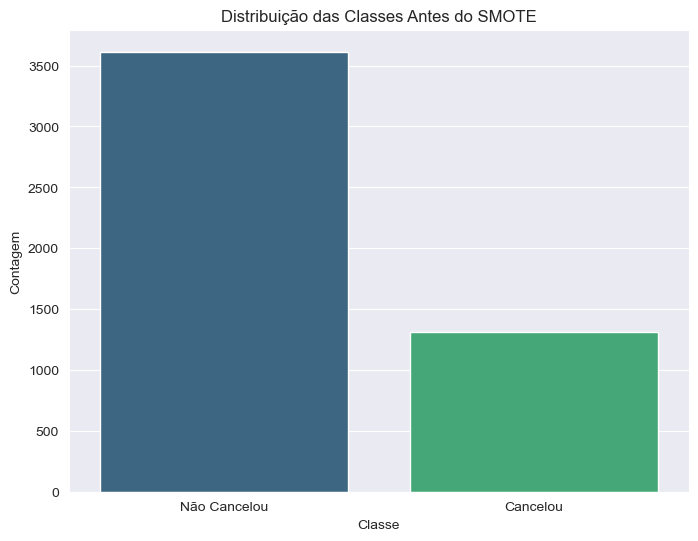

In [94]:
# Gráfico da distribuição das classes antes do SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribuição das Classes Antes do SMOTE')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.show()


### Aplicar SMOTE no Conjunto de Treinamento

Nesta etapa, aplicamos a técnica de reamostragem **SMOTE (Synthetic Minority Over-sampling Technique)** para lidar com o desbalanceamento de classes. O SMOTE gera novas amostras sintéticas da classe minoritária, equilibrando a proporção de amostras entre as classes. Isso é fundamental para melhorar o desempenho do modelo, principalmente nas métricas de **recall** e **precisão**.

Aplicar SMOTE é particularmente importante quando a classe minoritária representa uma pequena proporção dos dados, como no nosso caso, onde os clientes que cancelaram representam aproximadamente 26,6% do total.


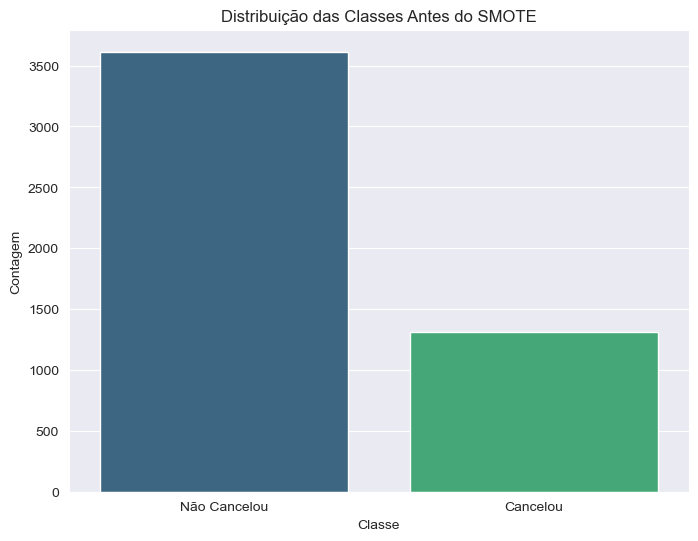

In [95]:
# Gráfico da distribuição das classes antes do SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribuição das Classes Antes do SMOTE')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.show()

**Código para Aplicação do SMOTE**

In [96]:
# Aplicar SMOTE no conjunto de treinamento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

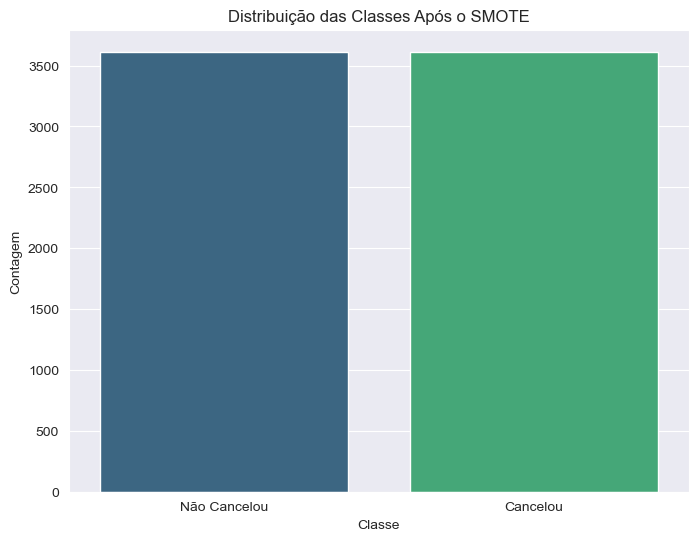

In [97]:
# Gráfico da distribuição das classes após o SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Distribuição das Classes Após o SMOTE')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.show()

In [98]:
# Verificar a distribuição das classes após a aplicação do SMOTE
print("Distribuição das Classes Após SMOTE:")
y_resampled.value_counts()

Distribuição das Classes Após SMOTE:


target
1    3614
0    3614
Name: count, dtype: int64

Após a aplicação do SMOTE, as duas classes possuem o mesmo número de amostras, equilibrando assim a distribuição entre elas.

### Visualizar Distribuição das Classes Após o SMOTE

Para confirmar o balanceamento das classes após o SMOTE, vamos criar um gráfico de barras.

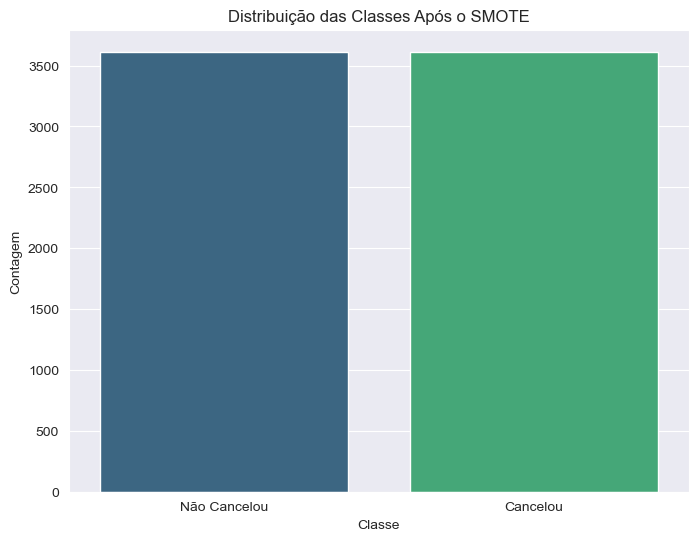

In [99]:
# Gráfico da distribuição das classes após o SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Distribuição das Classes Após o SMOTE')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.show()

**Conclusões - Preparação do Conjunto de Dados**

**Codificação de Variáveis Categóricas:**
- **Ação:** Transformamos variáveis categóricas em numéricas utilizando a técnica de One-Hot Encoding.
- **Justificativa:** A codificação One-Hot permite que os modelos de machine learning compreendam e utilizem as variáveis categóricas corretamente, evitando problemas de multicolinearidade.

**Normalização/Padronização de Variáveis Numéricas:**
- **Ação:** Aplicamos a padronização (StandardScaler) para garantir que todas as variáveis numéricas tenham média 0 e desvio padrão 1. Também reorganizamos a variável target para ser a última coluna.
- **Justificativa:** A padronização garante que todas as variáveis sejam tratadas em uma mesma escala, evitando que variáveis com diferentes amplitudes influenciem desproporcionalmente o modelo.

**Análise do Desbalanceamento de Classes:**
- **Distribuição Desbalanceada:** A classe 0 (clientes que não cancelaram) representa aproximadamente 73,4% dos dados, enquanto a classe 1 (clientes que cancelaram) representa 26,6%.
- **Abordagens para Lidar com o Desbalanceamento:**
  - **Reamostragem (Oversampling):** Aumentar o número de amostras da classe minoritária com SMOTE.
  - **Uso de Algoritmos Sensíveis ao Desbalanceamento:** Utilizar algoritmos como Random Forest e XGBoost.

**Divisão do Conjunto de Dados:**
- **Ação:** Dividimos os dados em conjuntos de treinamento (70%), validação (15%) e teste (15%) usando `train_test_split` com estratificação.
- **Justificativa:** A divisão estratificada garante que a proporção das classes seja mantida em todos os conjuntos, essencial para modelos de classificação que lidam com dados desbalanceados.

**Uso de SMOTE:**
- **Ação:** Aplicamos SMOTE ao conjunto de treinamento para balancear as classes, gerando amostras da classe minoritária.
- **Justificativa:** O uso do SMOTE melhora a representatividade da classe minoritária, ajudando os modelos de machine learning a aprender melhor suas características.

**Em Resumo:**
- **Codificação Categórica:** Transformar variáveis categóricas em numéricas é crucial para que os modelos preditivos as utilizem corretamente.
- **Normalização Numérica:** Padronizar as variáveis numéricas evita que os algoritmos sejam influenciados desproporcionalmente por variáveis de maior amplitude.
- **Divisão Estratificada:** Dividir os dados de maneira estratificada assegura uma avaliação justa e precisa do modelo.
- **Aplicação de SMOTE:** Balancear as classes utilizando SMOTE melhora o desempenho do modelo em relação à classe minoritária.

**Conclusões Finais**

Com o conjunto de dados agora balanceado e corretamente pré-processado, estamos prontos para avançar para a fase de modelagem preditiva, onde aplicaremos e avaliaremos diferentes algoritmos de aprendizado de máquina para prever a rotatividade de clientes.


## Modelar e Treinar o Modelo

**Algoritmos a Considerar**

Para abordar o problema de classificação da rotatividade de clientes, selecionamos uma variedade de algoritmos, cada um com suas vantagens específicas:

- **Regressão Logística:** Um algoritmo simples e interpretável que serve como um bom ponto de partida para problemas de classificação binária. É eficaz para entender a relação entre as variáveis e a variável de destino (rotatividade).
- **Árvores de Decisão:** Um modelo que pode lidar bem com dados categóricos e numéricos. Além de ser fácil de interpretar, as Árvores de Decisão são robustas a outliers e podem capturar interações entre variáveis sem a necessidade de pré-processamento pesado.
- **Floresta Aleatória (Random Forest):** Combina múltiplas árvores para reduzir o risco de overfitting e melhorar a generalização. É eficaz em capturar a importância relativa das variáveis.
- **Gradient Boosting:** Um algoritmo de aprendizado em ensemble que constrói modelos de forma sequencial, onde cada novo modelo corrige os erros do anterior. É eficiente para problemas de classificação complexos.
- **XGBoost:** Uma variação otimizada do Gradient Boosting, reconhecida por sua eficiência e escalabilidade, particularmente em problemas com grandes volumes de dados e desbalanceamento.
- **LightGBM:** Semelhante ao XGBoost, LightGBM é otimizado para eficiência em memória e velocidade, sendo adequado para conjuntos de dados grandes.

**Justificativa para a Escolha dos Algoritmos**

1. **Regressão Logística:** Serve como um benchmark inicial, sendo simples de interpretar e com rápido tempo de treinamento.
2. **Árvores de Decisão e Floresta Aleatória:** Úteis para identificar as variáveis mais importantes e capturar interações de forma automática.
3. **Gradient Boosting e XGBoost:** Robustos para lidar com classes desbalanceadas e grandes volumes de dados, oferecendo precisão elevada.
4. **LightGBM:** Escolhido pela eficiência em grandes datasets e pela capacidade de oferecer desempenho similar ao XGBoost com menor consumo de memória e tempo de execução.


### Modelo de Regressão Logística

A **Regressão Logística** foi escolhida como o modelo inicial por ser um algoritmo simples, interpretável, e eficaz para problemas de classificação binária. Ela nos ajuda a entender a relação entre as variáveis explicativas e a variável alvo (cancelamento), fornecendo uma linha de base sólida para avaliar o desempenho dos próximos modelos. Em particular, é um modelo que oferece boa performance para dados balanceados e desbalanceados, embora possa precisar de ajustes para lidar com classes desbalanceadas como no nosso caso.

In [100]:
# Inicializar o modelo
logreg = LogisticRegression(random_state=12345)

In [101]:
# Treinar o modelo
logreg.fit(X_train, y_train)

LogisticRegression(random_state=12345)

In [102]:
# Fazer previsões
y_val_pred = logreg.predict(X_val)
y_val_pred_proba = logreg.predict_proba(X_val)[:, 1]

In [103]:
# Avaliar o modelo
logreg_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
logreg_accuracy = accuracy_score(y_val, y_val_pred)
logreg_class_report = classification_report(y_val, y_val_pred, output_dict=True)
logreg_conf_matrix = confusion_matrix(y_val, y_val_pred)

In [104]:
# Formatar a saída das métricas
print(f"AUC-ROC: {logreg_auc_roc:.4f}")
print(f"Accuracy: {logreg_accuracy:.4f}")

AUC-ROC: 0.8476
Accuracy: 0.8085


In [105]:
# Criar um DataFrame para o relatório de classificação
logreg_class_report_df = pd.DataFrame(logreg_class_report).transpose()

In [106]:
# Exibir o DataFrame como tabela
display(logreg_class_report_df)

,precision,recall,f1-score,support
0,0.849633,0.897933,0.873116,774.000000
1,0.666667,0.562278,0.610039,281.000000
accuracy,0.808531,0.808531,0.808531,0.808531
macro avg,0.758150,0.730105,0.741577,1055.000000
weighted avg,0.800900,0.808531,0.803045,1055.000000


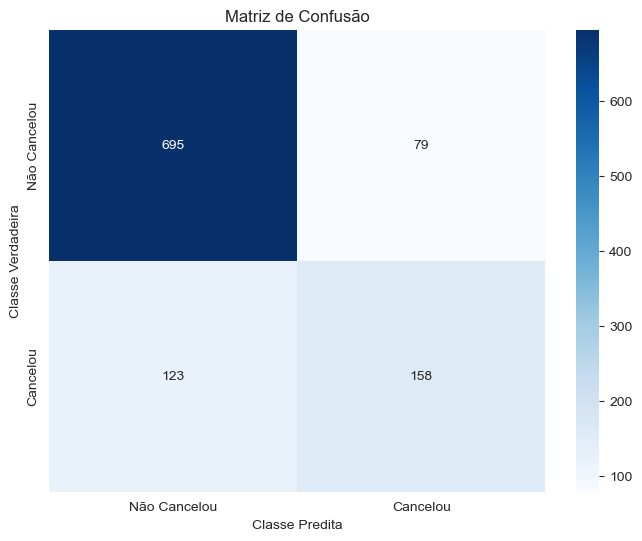

In [107]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

**Resultados - Regressão Logística**

**1. Inicialização e Treinamento:**
   - O modelo de Regressão Logística foi inicializado com um estado aleatório fixo para garantir a reprodutibilidade dos resultados. Foi treinado com sucesso nos dados de treinamento, servindo como uma linha de base inicial.

**2. Previsões:**
   - As previsões foram feitas tanto para as classes quanto para as probabilidades, permitindo uma avaliação detalhada através de métricas como AUC-ROC.

**3. Avaliação do Modelo:**
   - **AUC-ROC:** O valor de 0.8476 indica um bom desempenho em distinguir entre as classes, embora ainda haja espaço para melhorias.
   - **Acurácia:** 0.8085, mostrando que o modelo acerta mais de 80% dos casos. No entanto, é importante notar que a acurácia sozinha não é suficiente para avaliar a performance em problemas com classes desbalanceadas.

**4. Relatório de Classificação:**
   - As métricas de precisão, recall e f1-score fornecem uma visão completa do desempenho do modelo. Observa-se que a classe "Não Cancelou" tem um desempenho superior, indicando um possível viés para a classe majoritária.

**5. Matriz de Confusão**
   - A matriz de confusão revela 123 falsos negativos (clientes que cancelaram, mas o modelo não previu corretamente). Isso destaca áreas de melhoria, especialmente no tratamento da classe minoritária.

**6. Justificativa para Avaliação:**
   - O AUC-ROC foi escolhido como métrica principal por oferecer uma visão geral da capacidade do modelo de distinguir entre as classes. A acurácia também foi incluída como referência, mas não é suficiente para avaliar completamente o desempenho em classes desbalanceadas.

**Resumo**
   - **Regressão Logística:** O desempenho da Regressão Logística foi satisfatório, com boa capacidade de distinguir entre as classes. No entanto, ainda apresenta dificuldades em prever corretamente a classe minoritária (clientes que cancelaram). Ajustes adicionais, como o ajuste de hiperparâmetros ou o uso de modelos mais complexos, podem ser necessários para melhorar a sensibilidade do modelo em relação à classe de clientes que cancelaram.
---
**Próximos Passos**
   - Com os resultados da Regressão Logística em mente, exploraremos outros modelos preditivos, como Árvores de Decisão, Random Forest, e métodos de boosting (XGBoost e LightGBM), para verificar se conseguimos melhorar a performance geral, especialmente em relação à classe minoritária.


### Modelo de Árvore de Decisão

A **Árvore de Decisão** é um modelo interpretável e robusto, útil para dados categóricos e numéricos. Diferentemente da Regressão Logística, ela pode capturar interações mais complexas entre variáveis, o que a torna especialmente eficaz em cenários onde as relações entre as features e o alvo não são lineares. Além disso, a Árvore de Decisão é fácil de interpretar, pois segue uma estrutura de decisões que pode ser visualizada, tornando-a útil em situações onde a interpretabilidade é importante para o negócio.

No entanto, a Árvore de Decisão pode ser suscetível ao **overfitting** se não for ajustada corretamente, pois ela tende a se ajustar muito bem aos dados de treinamento, capturando até mesmo o ruído. Para lidar com isso, é comum utilizar técnicas como **poda** (*pruning*) ou definir uma **profundidade máxima** (*max_depth*) para limitar o crescimento da árvore, melhorando sua capacidade de generalização em novos dados.


In [108]:
# Inicializar o modelo
dtree = DecisionTreeClassifier(random_state=12345)

In [109]:
# Treinar o modelo
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12345)

In [110]:
# Fazer previsões
y_val_pred = dtree.predict(X_val)
y_val_pred_proba = dtree.predict_proba(X_val)[:, 1]

In [111]:
# Avaliar o modelo
dtree_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
dtree_accuracy = accuracy_score(y_val, y_val_pred)
dtree_class_report = classification_report(y_val, y_val_pred, output_dict=True)
dtree_conf_matrix = confusion_matrix(y_val, y_val_pred)

In [112]:
# Formatar a saída das métricas
print(f"AUC-ROC: {dtree_auc_roc:.4f}")
print(f"Accuracy: {dtree_accuracy:.4f}")

AUC-ROC: 0.7032
Accuracy: 0.7545


In [113]:
# Criar um DataFrame para o relatório de classificação
dtree_class_report_df = pd.DataFrame(dtree_class_report).transpose()

In [114]:
# Exibir o DataFrame como tabela
display(dtree_class_report_df)

,precision,recall,f1-score,support
0,0.846568,0.812661,0.829268,774.000000
1,0.535256,0.594306,0.563238,281.000000
accuracy,0.754502,0.754502,0.754502,0.754502
macro avg,0.690912,0.703484,0.696253,1055.000000
weighted avg,0.763650,0.754502,0.758411,1055.000000


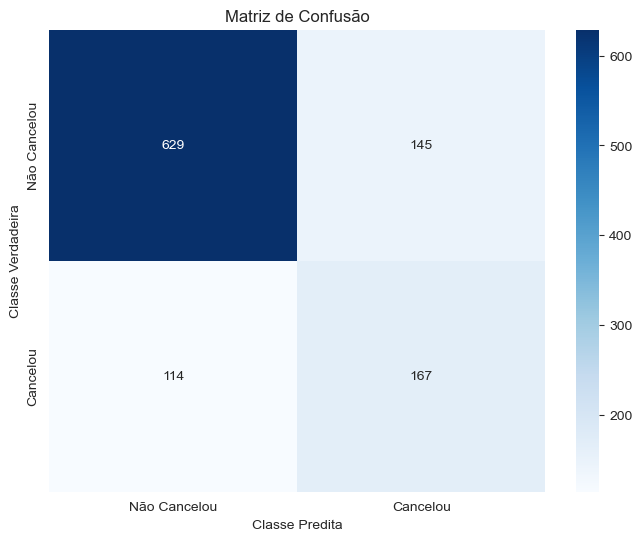

In [115]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(dtree_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

**Resultados - Árvore de Decisão**

**1. Inicialização e Treinamento:**
   - O modelo de Árvore de Decisão foi inicializado com um estado aleatório fixo para garantir a reprodutibilidade dos resultados. Foi treinado com sucesso nos dados de treinamento, permitindo uma análise comparativa com os demais modelos.

**2. Previsões:**
   - As previsões foram feitas tanto para as classes quanto para as probabilidades, possibilitando uma avaliação detalhada através de métricas como AUC-ROC.

**3. Avaliação do Modelo:**
   - **AUC-ROC:** O valor de 0.7032 indica um desempenho razoável em distinguir entre as classes, mas inferior ao da Regressão Logística.
   - **Acurácia:** 0.7545, mostrando que o modelo acerta cerca de 75% dos casos. No entanto, é importante observar que a acurácia não é suficiente para avaliar a performance em problemas com classes desbalanceadas.

**4. Relatório de Classificação:**
   - As métricas de precisão, recall e f1-score fornecem uma visão completa do desempenho do modelo. A classe "Não Cancelou" apresenta um desempenho superior, enquanto a classe "Cancelou" possui métricas mais baixas, especialmente em termos de recall (0.5943), indicando dificuldades na previsão dos cancelamentos.

**5. Matriz de Confusão:**
   - A matriz de confusão revela 114 falsos negativos (clientes que cancelaram, mas o modelo não previu corretamente). Isso destaca a necessidade de melhorias, especialmente no tratamento da classe minoritária.

**6. Justificativa para Avaliação:**
   - O AUC-ROC foi escolhido como métrica principal por oferecer uma visão geral da capacidade do modelo de distinguir entre as classes. A acurácia foi incluída como referência, mas sua limitação em problemas de classes desbalanceadas é reconhecida.

**Resumo**
   - **Árvore de Decisão:** O desempenho do modelo de Árvore de Decisão foi inferior ao da Regressão Logística, com dificuldades na previsão da classe minoritária. Ajustes adicionais, como a poda (pruning) e a definição de uma profundidade máxima, ou o uso de modelos mais complexos, podem ser necessários para melhorar a sensibilidade do modelo.

---

**Próximos Passos**
   - Diante dos resultados da Árvore de Decisão, exploraremos modelos mais avançados, como Random Forest e métodos de boosting (XGBoost e LightGBM), para avaliar se conseguimos melhorar a performance geral, especialmente em relação à classe minoritária.


### Modelo de Floresta Aleatória

A **Floresta Aleatória** é um modelo poderoso que combina várias Árvores de Decisão para reduzir o risco de overfitting e melhorar a generalização. Esse modelo é especialmente eficaz para dados desbalanceados, pois pode ajustar pesos para classes minoritárias e evitar o ajuste excessivo aos dados de treinamento. Além disso, a Floresta Aleatória oferece uma melhor estimativa da importância das variáveis, tornando-se útil em situações em que interpretabilidade e robustez são necessárias.


No entanto, o modelo também pode ser computacionalmente mais caro e suscetível a ruído em grandes datasets, exigindo ajustes de hiperparâmetros, como o número de árvores (`n_estimators`) e a profundidade máxima (`max_depth`), para alcançar seu desempenho ideal.



In [116]:
# Inicializar o modelo
rf = RandomForestClassifier(random_state=12345)

In [117]:
# Treinar o modelo
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=12345)

In [118]:
# Fazer previsões
y_val_pred = rf.predict(X_val)
y_val_pred_proba = rf.predict_proba(X_val)[:, 1]

In [119]:
# Avaliar o modelo
rf_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
rf_accuracy = accuracy_score(y_val, y_val_pred)
rf_class_report = classification_report(y_val, y_val_pred, output_dict=True)
rf_conf_matrix = confusion_matrix(y_val, y_val_pred)

In [120]:
# Formatar a saída das métricas
print(f"AUC-ROC: {rf_auc_roc:.4f}")
print(f"Accuracy: {rf_accuracy:.4f}")

AUC-ROC: 0.8515
Accuracy: 0.8142


In [121]:
# Criar um DataFrame para o relatório de classificação
rf_class_report_df = pd.DataFrame(rf_class_report).transpose()

In [122]:
# Exibir o DataFrame como tabela
display(rf_class_report_df)

,precision,recall,f1-score,support
0,0.836047,0.928941,0.880049,774.000000
1,0.717949,0.498221,0.588235,281.000000
accuracy,0.814218,0.814218,0.814218,0.814218
macro avg,0.776998,0.713581,0.734142,1055.000000
weighted avg,0.804591,0.814218,0.802324,1055.000000


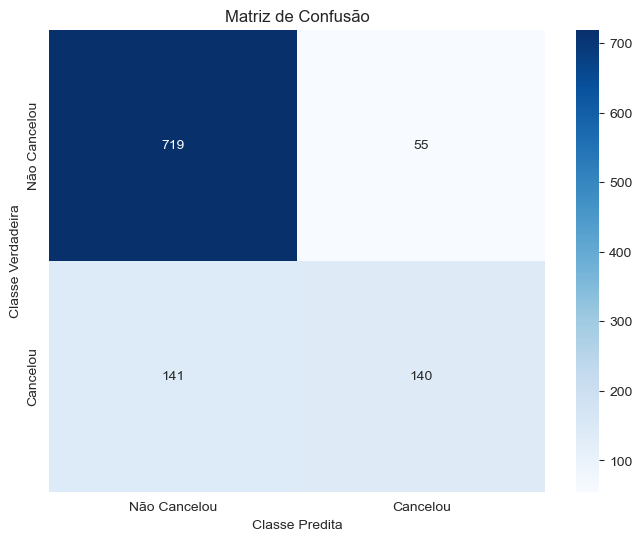

In [123]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

**Resultados - Floresta Aleatória**

**1. Inicialização e Treinamento:**
   - O modelo de Floresta Aleatória foi inicializado com um estado aleatório fixo para garantir a reprodutibilidade dos resultados. Foi treinado com sucesso nos dados de treinamento.

**2. Previsões:**
   - As previsões foram feitas tanto para as classes quanto para as probabilidades, permitindo uma avaliação detalhada através de métricas como AUC-ROC.

**3. Avaliação do Modelo:**
   - **AUC-ROC:** O valor de 0.8515 indica um bom desempenho em distinguir entre as classes, mostrando uma melhoria em relação aos modelos anteriores.
   - **Acurácia:** 0.8142, mostrando que o modelo acerta em mais de 81% dos casos. Porém, é importante destacar que a acurácia sozinha não é suficiente para avaliar a performance em problemas com classes desbalanceadas.

**4. Relatório de Classificação:**
   - As métricas de precisão, recall e f1-score fornecem uma visão completa do desempenho do modelo. A classe "Não Cancelou" apresentou um desempenho superior em todas as métricas (f1-score de 0.8800), enquanto a classe "Cancelou" obteve um recall de 0.4982, indicando dificuldades na previsão da classe minoritária.

**5. Matriz de Confusão:**
   - A matriz de confusão revela 141 falsos negativos (clientes que cancelaram, mas o modelo não previu corretamente), destacando a necessidade de melhorias no tratamento da classe minoritária.

**6. Justificativa para Avaliação:**
   - O AUC-ROC foi escolhido como métrica principal por oferecer uma visão geral da capacidade do modelo de distinguir entre as classes. A acurácia e outras métricas (como precisão e recall) foram incluídas para fornecer uma visão mais abrangente do desempenho do modelo, mas não devem ser os únicos indicadores, especialmente em cenários com desbalanceamento de classes.

**Resumo:**
   - **Floresta Aleatória:** O desempenho da Floresta Aleatória é sólido, apresentando um AUC-ROC elevado e uma boa acurácia. No entanto, o modelo ainda apresenta limitações na previsão da classe "Cancelou", sugerindo a necessidade de ajustes, como o uso de técnicas de oversampling, tuning de hiperparâmetros ou aplicação de métodos mais robustos para melhorar o recall da classe minoritária.

**Próximos Passos**
   - Com base nos resultados da Floresta Aleatória, exploraremos outros modelos, como métodos de boosting (XGBoost e LightGBM), para verificar se conseguimos melhorar o desempenho geral, especialmente em relação à previsão da classe minoritária. Também podemos considerar ajustes nos hiperparâmetros ou técnicas de oversampling para refinar os resultados.


### Modelo de Gradient Boosting

O **Gradient Boosting** é um algoritmo de aprendizado de máquina poderoso, conhecido por seu alto desempenho em tarefas de classificação. Ele funciona construindo modelos sequenciais, onde cada modelo corrige os erros cometidos pelos modelos anteriores. Esse método é eficaz em capturar padrões complexos e melhorar a capacidade do modelo de prever classes minoritárias. No entanto, pode ser computacionalmente caro e suscetível ao overfitting se não for ajustado corretamente.

In [124]:
# Inicializar o modelo
gb = GradientBoostingClassifier(random_state=12345)

In [125]:
# Treinar o modelo
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=12345)

In [126]:
# Fazer previsões
y_val_pred = gb.predict(X_val)
y_val_pred_proba = gb.predict_proba(X_val)[:, 1]

In [127]:
# Avaliar o modelo
gb_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
gb_accuracy = accuracy_score(y_val, y_val_pred)
gb_class_report = classification_report(y_val, y_val_pred, output_dict=True)
gb_conf_matrix = confusion_matrix(y_val, y_val_pred)

In [128]:
# Formatar a saída das métricas
print(f"AUC-ROC: {gb_auc_roc:.4f}")
print(f"Accuracy: {gb_accuracy:.4f}")

AUC-ROC: 0.8899
Accuracy: 0.8417


In [129]:
# Criar um DataFrame para o relatório de classificação
gb_class_report_df = pd.DataFrame(gb_class_report).transpose()

In [130]:
# Exibir o DataFrame como tabela
display(gb_class_report_df)

,precision,recall,f1-score,support
0,0.856639,0.941860,0.897231,774.000000
1,0.779412,0.565836,0.655670,281.000000
accuracy,0.841706,0.841706,0.841706,0.841706
macro avg,0.818026,0.753848,0.776450,1055.000000
weighted avg,0.836070,0.841706,0.832891,1055.000000


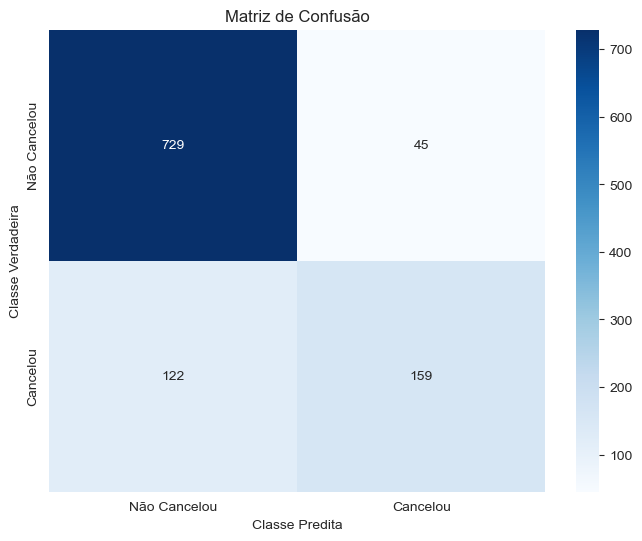

In [131]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

**Resultados - Gradient Boosting**

**1. Inicialização e Treinamento:**
   - O modelo de Gradient Boosting foi inicializado com um estado aleatório fixo para garantir a reprodutibilidade dos resultados e foi treinado com sucesso nos dados de treinamento.

**2. Previsões:**
   - As previsões foram feitas tanto para as classes quanto para as probabilidades, permitindo uma avaliação detalhada por meio do AUC-ROC e outras métricas.

**3. Avaliação do Modelo:**
   - **AUC-ROC:** O valor de 0.8899 indica um excelente desempenho do modelo em distinguir entre as classes.
   - **Acurácia:** 0.8417, mostrando que o modelo está classificando corretamente mais de 84% dos casos, mas ainda há espaço para melhorias, especialmente na classe minoritária.

**4. Relatório de Classificação:**
   - O relatório de classificação apresenta métricas detalhadas de precisão, recall e f1-score para cada classe. A classe "Não Cancelou" teve um desempenho superior em todas as métricas, com f1-score de 0.8972, enquanto a classe "Cancelou" apresentou um recall de 0.5658, indicando que o modelo ainda falha em capturar corretamente uma porção significativa dos cancelamentos.

**5. Matriz de Confusão:**
   - A matriz de confusão revela que o modelo teve 122 falsos negativos (clientes que cancelaram e o modelo não previu corretamente), o que sugere que ainda são necessários ajustes para melhorar a previsão da classe minoritária.

**6. Justificativa para Avaliação:**
   - O uso do AUC-ROC como métrica principal é justificado, pois oferece uma visão geral da capacidade do modelo de distinguir entre as classes. A acurácia é usada como métrica adicional para fornecer uma visão geral do desempenho do modelo, mas não deve ser o único indicador devido ao desbalanceamento das classes.

**Resumo:**
   - **Desempenho do Gradient Boosting:** O desempenho do Gradient Boosting foi excelente, com um AUC-ROC de 0.8899, indicando que este modelo pode ser uma escolha eficaz para resolver o problema de rotatividade de clientes. No entanto, melhorias ainda são necessárias para aumentar a sensibilidade do modelo em relação à classe minoritária.

**Próximos Passos**
   - Com os resultados do Gradient Boosting em mente, a próxima etapa envolverá explorar métodos de boosting mais avançados, como o XGBoost e o LightGBM. Também serão considerados ajustes nos hiperparâmetros ou aplicação de técnicas de oversampling para melhorar a previsão da classe minoritária.


### Modelo XGBoost

O **XGBoost** é um algoritmo de aprendizado de máquina altamente eficiente e amplamente utilizado, conhecido por seu desempenho superior em tarefas de classificação e regressão. Ele utiliza o princípio do boosting, onde modelos fracos são treinados em sequência, ajustando os erros cometidos pelos modelos anteriores. Esse método é poderoso na captura de padrões complexos em grandes conjuntos de dados, sendo uma escolha popular em competições e projetos de ciência de dados devido à sua alta precisão e velocidade. No entanto, o XGBoost pode ser sensível ao overfitting, especialmente em dados desbalanceados ou sem o ajuste correto dos hiperparâmetros, exigindo cuidados na configuração de parâmetros como `max_depth`, `learning_rate` e `n_estimators` para garantir a melhor performance e generalização do modelo.

In [132]:
# Inicializar o modelo com métrica de avaliação `error`
xgb = XGBClassifier(random_state=12345, eval_metric='error')

In [133]:
# Treinar o modelo
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=12345, ...)

In [134]:
# Fazer previsões
y_val_pred = xgb.predict(X_val)
y_val_pred_proba = xgb.predict_proba(X_val)[:, 1]

In [135]:
# Avaliar o modelo
xgb_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
xgb_accuracy = accuracy_score(y_val, y_val_pred)
xgb_class_report = classification_report(y_val, y_val_pred, output_dict=True)
xgb_conf_matrix = confusion_matrix(y_val, y_val_pred)

In [136]:
# Formatar a saída das métricas
print(f"AUC-ROC: {xgb_auc_roc:.4f}")
print(f"Accuracy: {xgb_accuracy:.4f}")

AUC-ROC: 0.9113
Accuracy: 0.8711


In [137]:
# Criar um DataFrame para o relatório de classificação
xgb_class_report_df = pd.DataFrame(xgb_class_report).transpose()

In [138]:
# Exibir o DataFrame como tabela
display(xgb_class_report_df)

,precision,recall,f1-score,support
0,0.882494,0.950904,0.915423,774.00000
1,0.828054,0.651246,0.729084,281.00000
accuracy,0.871090,0.871090,0.871090,0.87109
macro avg,0.855274,0.801075,0.822253,1055.00000
weighted avg,0.867994,0.871090,0.865791,1055.00000


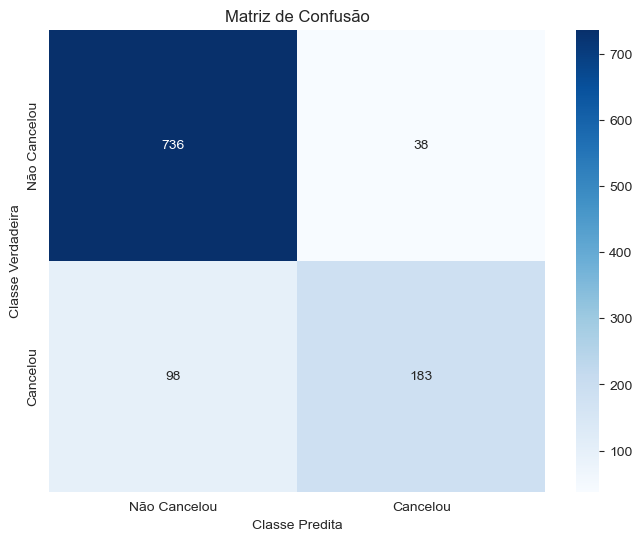

In [139]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

**Resultados - XGBoost**

**1. Inicialização e Treinamento:**
   - O modelo de XGBoost foi inicializado com um estado aleatório definido para garantir a reprodutibilidade dos resultados e foi treinado com sucesso nos dados de treinamento. O parâmetro `use_label_encoder=False` foi utilizado para evitar avisos obsoletos e `eval_metric='error'` foi empregado como métrica de avaliação durante o treinamento.

**2. Previsões:**
   - As previsões foram feitas tanto para as classes quanto para as probabilidades, permitindo uma avaliação detalhada por meio do AUC-ROC e outras métricas.

**3. Avaliação do Modelo:**
   - **AUC-ROC:** O valor de 0.9113 indica um excelente desempenho do modelo em distinguir entre as classes.
   - **Acurácia:** 0.8711, mostrando que o modelo está classificando corretamente mais de 87% dos casos, um resultado promissor. No entanto, ainda há espaço para melhorias, especialmente na classe minoritária.

**4. Relatório de Classificação:**
   - O relatório de classificação apresenta métricas detalhadas de precisão, recall e f1-score para cada classe:
     - A classe "Não Cancelou" apresentou um desempenho excelente, com precisão de 0.8825, recall de 0.9509, e f1-score de 0.9154.
     - A classe "Cancelou" teve uma precisão de 0.8281, recall de 0.6512, e f1-score de 0.7291, indicando que o modelo ainda está falhando em capturar corretamente uma parte significativa dos clientes que cancelaram.

**5. Matriz de Confusão:**
   - A matriz de confusão revela que o modelo teve 98 falsos negativos (clientes que cancelaram e o modelo não previu corretamente), o que sugere que ainda são necessários ajustes para melhorar a previsão da classe minoritária. Os verdadeiros negativos (736) e verdadeiros positivos (183) indicam um bom desempenho geral.

**6. Justificativa para Avaliação:**
   - O uso do AUC-ROC como métrica principal é justificado, pois oferece uma visão geral clara da capacidade do modelo de distinguir entre as classes, o que é especialmente importante em cenários com classes desbalanceadas. A acurácia também é utilizada como métrica adicional, fornecendo uma visão ampla do desempenho geral do modelo, mas não deve ser o único indicador devido ao desbalanceamento das classes.

**Resumo:**
   - **Desempenho do XGBoost:** O desempenho do XGBoost foi excelente, com um AUC-ROC de 0.9113, indicando que este modelo pode ser uma escolha eficaz para resolver o problema de classificação de rotatividade de clientes. No entanto, ajustes finos de hiperparâmetros serão abordados posteriormente na etapa de ajuste, para otimizar ainda mais o desempenho.

**Próximos Passos**
   - Baseando-se nos resultados do XGBoost, a próxima etapa envolverá explorar ajustes de hiperparâmetros para melhorar ainda mais o desempenho, especialmente em relação à previsão da classe minoritária. Também será considerada a aplicação de técnicas de oversampling para refinar os resultados.


### Modelo LightGBM

O **LightGBM** é um algoritmo de aprendizado de máquina baseado em **boosting**, que utiliza árvores de decisão para construir modelos preditivos eficientes, particularmente em grandes volumes de dados e com muitas features. Uma das suas principais vantagens é a capacidade de lidar bem com dados esparsos e categóricos sem a necessidade de muita engenharia de features, além de ser altamente otimizado para desempenho e velocidade. No entanto, assim como outros algoritmos baseados em boosting, o **LightGBM** pode ser suscetível ao **overfitting** se não houver um ajuste adequado dos hiperparâmetros. Parâmetros como `num_leaves`, `max_depth` e `learning_rate` devem ser ajustados para alcançar um bom equilíbrio entre **bias** e **variância**.


In [140]:
# Inicializar o modelo
lgbm = LGBMClassifier(random_state=12345)

In [141]:
# Treinar o modelo
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1456
[LightGBM] [Info] Number of data points in the train set: 4922, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265746 -> initscore=-1.016316
[LightGBM] [Info] Start training from score -1.016316


LGBMClassifier(random_state=12345)

In [142]:
# Fazer previsões
y_val_pred = lgbm.predict(X_val)
y_val_pred_proba = lgbm.predict_proba(X_val)[:, 1]

In [143]:
# Avaliar o modelo
lgbm_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
lgbm_accuracy = accuracy_score(y_val, y_val_pred)
lgbm_class_report = classification_report(y_val, y_val_pred, output_dict=True)
lgbm_conf_matrix = confusion_matrix(y_val, y_val_pred)

In [144]:
# Formatar a saída das métricas
print(f"AUC-ROC: {lgbm_auc_roc:.4f}")
print(f"Accuracy: {lgbm_accuracy:.4f}")

AUC-ROC: 0.8959
Accuracy: 0.8569


In [145]:
# Criar um DataFrame para o relatório de classificação
lgbm_class_report_df = pd.DataFrame(lgbm_class_report).transpose()

In [146]:
# Exibir o DataFrame como tabela
display(lgbm_class_report_df)

,precision,recall,f1-score,support
0,0.866902,0.950904,0.906962,774.000000
1,0.815534,0.597865,0.689938,281.000000
accuracy,0.856872,0.856872,0.856872,0.856872
macro avg,0.841218,0.774385,0.798450,1055.000000
weighted avg,0.853220,0.856872,0.849158,1055.000000


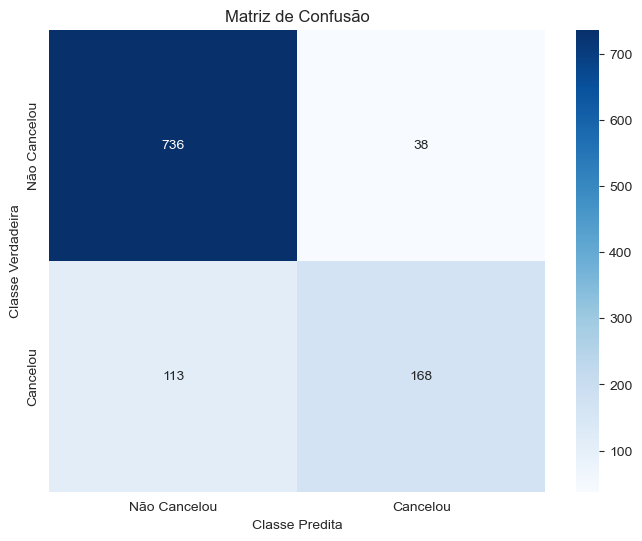

In [147]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(lgbm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

**Resultados - LightGBM**

**1. Inicialização e Treinamento:**
   - O modelo LightGBM foi inicializado com um estado aleatório definido para garantir a reprodutibilidade dos resultados e foi treinado com sucesso nos dados de treinamento. Durante o treinamento, o modelo apresentou avisos sobre nomes de features com espaços em branco e escolheu automaticamente a estratégia de multi-threading.

**2. Previsões:**
   - As previsões foram feitas tanto para as classes quanto para as probabilidades, permitindo uma avaliação detalhada por meio do AUC-ROC e outras métricas.

**3. Avaliação do Modelo:**
   - **AUC-ROC:** O valor de 0.8959 indica um excelente desempenho do modelo em distinguir entre as classes.
   - **Acurácia:** 0.8569, mostrando que o modelo está classificando corretamente mais de 85% dos casos. No entanto, ainda há espaço para melhorias, especialmente na classe minoritária.

**4. Relatório de Classificação:**
   - O relatório de classificação apresenta métricas detalhadas de precisão, recall e f1-score para cada classe:
     - A classe "Não Cancelou" apresentou um desempenho excelente, com precisão de 0.8669, recall de 0.9509 e f1-score de 0.9070.
     - A classe "Cancelou" teve uma precisão de 0.8155, recall de 0.5979 e f1-score de 0.6899, indicando que o modelo ainda está falhando em capturar corretamente uma parte significativa dos clientes que cancelaram.

**5. Matriz de Confusão:**
   - A matriz de confusão revela que o modelo teve 113 falsos negativos (clientes que cancelaram e o modelo não previu corretamente), o que sugere que ainda são necessários ajustes para melhorar a previsão da classe minoritária. Os verdadeiros negativos (736) e verdadeiros positivos (168) indicam um bom desempenho geral.

**6. Justificativa para Avaliação:**
   - O uso de AUC-ROC como métrica principal é justificado, pois oferece uma visão geral clara da capacidade do modelo de distinguir entre as classes, o que é especialmente importante em cenários com classes desbalanceadas. A acurácia também é utilizada como métrica adicional, fornecendo uma visão ampla do desempenho geral do modelo.

**Resumo:**
   - **Desempenho do LightGBM:** O desempenho do LightGBM foi excelente, com um AUC-ROC de 0.8959, indicando que este modelo pode ser uma escolha muito eficaz para resolver o problema de classificação de rotatividade de clientes. Contudo, melhorias adicionais, como ajustes de hiperparâmetros e técnicas de tratamento da classe minoritária, como oversampling ou SMOTE, podem ser exploradas para aumentar ainda mais a performance na previsão de cancelamentos. Ajustes no número de folhas (`num_leaves`), taxa de aprendizado (`learning_rate`) e profundidade máxima (`max_depth`) também podem ser feitos para otimizar ainda mais a capacidade de generalização do modelo.

**Próximos Passos**
   - A próxima etapa envolve explorar ajustes de hiperparâmetros e técnicas de oversampling, como SMOTE, para melhorar. 


### Otimizar Hiperparâmetros

#### Escolher Modelos Iniciais

Os seis modelos treinados foram avaliados com base no AUC-ROC e na Acurácia. Abaixo, apresentamos os três melhores modelos com seus respectivos desempenhos.

In [148]:
# Resultados dos modelos utilizando as variáveis reais
model_results = {
    'Modelo': ['Regressão Logística', 'Árvores de Decisão', 'Floresta Aleatória', 
               'Gradient Boosting', 'XGBoost', 'LightGBM'],
    'AUC-ROC': [logreg_auc_roc, dtree_auc_roc, rf_auc_roc, gb_auc_roc, xgb_auc_roc, lgbm_auc_roc],
    'Acurácia': [logreg_accuracy, dtree_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy, lgbm_accuracy]
}

In [149]:
# Criar DataFrame
results_df = pd.DataFrame(model_results)

In [150]:
# Ordenar DataFrame por AUC-ROC e Acurácia
results_df = results_df.sort_values(by=['AUC-ROC', 'Acurácia'], ascending=False)

In [151]:
# Exibir os três melhores modelos
top_3_models = results_df.head(3)
print("Top 3 Modelos:")
display(top_3_models)

Top 3 Modelos:


,Modelo,AUC-ROC,Acurácia
4,XGBoost,0.911301,0.871090
5,LightGBM,0.895878,0.856872
3,Gradient Boosting,0.889898,0.841706


**Justificativa para a Escolha dos Modelos**

A classificação precisa e a capacidade de distinguir entre classes, especialmente em cenários com dados desbalanceados, são cruciais no contexto da rotatividade de clientes. Os três modelos selecionados — XGBoost, LightGBM e Gradient Boosting — foram escolhidos por sua robustez e eficiência em problemas complexos de classificação. Segue a justificativa para cada um:

- **XGBoost:** Destacou-se como o melhor modelo com um AUC-ROC de 0.9113, indicando sua eficácia em distinguir com precisão os clientes que cancelaram dos que não cancelaram. Sua capacidade de lidar com grandes volumes de dados e classes desbalanceadas o torna ideal para esta aplicação.

- **LightGBM:** Apresentou um equilíbrio interessante entre desempenho e eficiência computacional. Embora seu AUC-ROC (0.8958) seja ligeiramente menor que o do XGBoost, sua eficiência em tempo de execução e otimização de memória o torna uma excelente escolha para quando há limitações de recursos.

- **Gradient Boosting:** Também teve um desempenho competitivo com um AUC-ROC de 0.8899. Este modelo pode ser ajustado para otimizar seu desempenho, principalmente com técnicas que lidam com dados desbalanceados.

Esses modelos serão ajustados em seus hiperparâmetros para maximizar a performance e fornecer insights mais robustos para a tomada de decisões.

**Próximos Passos**

Com os modelos selecionados, o próximo passo é o ajuste de hiperparâmetros, a fim de otimizar o desempenho e melhorar a capacidade preditiva, especialmente na distinção da classe minoritária. Técnicas como `GridSearchCV` e `RandomizedSearchCV` serão consideradas para encontrar a melhor combinação de parâmetros.


#### XGBoost

##### Ajustar Hiperparâmetros - XGBoost

Para otimizar o desempenho do modelo XGBoost, começamos com uma exploração inicial usando o `RandomizedSearchCV` para identificar intervalos promissores de hiperparâmetros. Em seguida, refinamos a busca com o `GridSearchCV` para obter os melhores hiperparâmetros para o modelo.

##### Ajuste Inicial com `RandomizedSearchCV`

Utilizamos o `RandomizedSearchCV` para explorar um espaço mais amplo de hiperparâmetros, garantindo eficiência no tempo de processamento e evitando sobrecarga computacional. Os hiperparâmetros ajustados foram:

- **learning_rate:** Controla o impacto de cada árvore individual no modelo final. Valores explorados: [0.01, 0.05, 0.1, 0.2, 0.3].
- **max_depth:** Profundidade máxima das árvores. Valores explorados: [3, 4, 5, 6].
- **min_child_weight:** Valor mínimo de soma dos pesos de todas as observações exigido em um nó filho. Valores explorados: [1, 2, 3, 4].
- **subsample:** Proporção de amostras usadas para crescer cada árvore. Valores explorados: [0.6, 0.8, 0.9, 1.0].
- **colsample_bytree:** Proporção de recursos (features) usadas por árvore. Valores explorados: [0.6, 0.8, 0.9, 1.0].

In [152]:
# Definir os parâmetros a serem testados no RandomizedSearchCV
random_search_params_xgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 0.9, 1.0]
}

In [153]:
# Inicializar o modelo XGBoost para busca aleatória
xgb_model_random = XGBClassifier(random_state=12345, eval_metric='logloss')

In [154]:
# Inicializar o RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model_random, 
    param_distributions=random_search_params_xgb, 
    n_iter=50, 
    cv=5, 
    scoring='roc_auc', 
    verbose=1, 
    n_jobs=-1, 
    random_state=12345
)

In [155]:
# Executar a busca aleatória
random_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=12345, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'subsample': [0.6, 0.8, 0.9, 1.0]},
                   random_state=12345, scoring='roc_auc', verbose=1)

**Resultados da Busca Aleatória**

In [156]:
# Capturar e exibir os melhores hiperparâmetros e a pontuação correspondente
best_random_search_params_xgb = random_search_xgb.best_params_
best_random_search_score_xgb = random_search_xgb.best_score_

In [157]:
print("Melhores Hiperparâmetros encontrados pelo RandomizedSearchCV:")
print(best_random_search_params_xgb)
print(f"Melhor AUC-ROC: {best_random_search_score_xgb:.4f}")

Melhores Hiperparâmetros encontrados pelo RandomizedSearchCV:
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.6}
Melhor AUC-ROC: 0.8937


- **Melhores Hiperparâmetros**: {`'subsample': 1.0`, `'min_child_weight': 1`, `'max_depth': 6`, `'learning_rate': 0.3`, `'colsample_bytree': 0.6`}
- **Melhor AUC-ROC**: 0.8937

Os resultados sugerem que um `learning_rate` mais alto (0.3) combinado com uma maior profundidade da árvore (`max_depth = 6`) melhora a captura de padrões complexos nos dados. O ajuste subsequente com o `GridSearchCV` será focado em torno desses valores para um refinamento final.

> Após essa exploração inicial, utilizamos os resultados do `RandomizedSearchCV` para definir intervalos mais estreitos e promissores de hiperparâmetros para o `GridSearchCV`.

##### Refinar com `GridSearchCV`

A busca em grade (`GridSearchCV`) foi realizada para refinar os melhores hiperparâmetros encontrados na etapa anterior:
- **learning_rate**: Ajustamos os valores para [0.05, 0.1] com o objetivo de encontrar um equilíbrio entre o aprendizado rápido e a estabilidade do modelo.
- **max_depth**: Definido para [3, 4], uma escolha que oferece uma boa complexidade da árvore, reduzindo o risco de overfitting.
- **min_child_weight**: Mantido em [1, 2] para explorar a regularização do modelo.
- **subsample**: Definido em torno de [0.8, 0.9] para encontrar o nível ideal de amostragem sem perder muita informação.
- **colsample_bytree**: Ajustado para [0.8, 0.9], visando otimizar a proporção de recursos (features) utilizadas por árvore.

In [158]:
# Definir os parâmetros a serem testados no GridSearchCV com intervalos mais refinados
param_grid_xgb = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

In [159]:
# Inicializar o modelo XGBoost para busca em grade
xgb_model_grid = XGBClassifier(random_state=12345, eval_metric='logloss')

In [160]:
# Inicializar o GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model_grid, 
    param_grid=param_grid_xgb, 
    cv=5, 
    scoring='roc_auc', 
    verbose=1, 
    n_jobs=-1
)

In [161]:
# Executar a busca em grade
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=12345, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 4],
                         'min_child_weight': [1, 2], 'subsample': [0.8, 0.9]},
             scoring='roc_auc', verbose=1)

**Resultados do GridSearchCV**

Após a execução da busca em grade, capturamos os melhores hiperparâmetros e avaliamos a pontuação correspondente:

In [162]:
# Capturar os melhores hiperparâmetros e a pontuação correspondente
best_params_grid = grid_search_xgb.best_params_
best_score_grid = grid_search_xgb.best_score_

In [163]:
# Exibir os melhores hiperparâmetros e a pontuação correspondente
print("Melhores Hiperparâmetros encontrados pelo GridSearchCV:")
print(best_params_grid)
print(f"Melhor AUC-ROC: {best_score_grid:.4f}")

Melhores Hiperparâmetros encontrados pelo GridSearchCV:
{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.9}
Melhor AUC-ROC: 0.8772


**Resultados do GridSearchCV**
- **Melhores Hiperparâmetros**: {`'colsample_bytree': 0.9`, `'learning_rate': 0.1`, `'max_depth': 4`, `'min_child_weight': 2`, `'subsample': 0.9`}
- **Melhor AUC-ROC**: 0.8772

Os resultados sugerem que um `learning_rate` moderado (0.1) e uma profundidade da árvore reduzida (`max_depth = 4`) oferecem um equilíbrio adequado entre aprendizado e generalização. Este ajuste demonstra que a estabilidade do modelo melhora ao reduzir a complexidade da árvore e ao refinar a seleção de amostras e recursos utilizados. 


##### Avaliar o Modelo - XGBoost

Após o ajuste dos hiperparâmetros, obtivemos o melhor conjunto de parâmetros com o `GridSearchCV`. Avaliamos o modelo no conjunto de validação para observar seu desempenho com os hiperparâmetros ajustados.:

In [164]:
# Obter o melhor modelo encontrado pelo GridSearchCV
best_model_xgb = grid_search_xgb.best_estimator_

In [165]:
# Fazer previsões no conjunto de validação
y_pred_xgb = best_model_xgb.predict(X_val)
y_prob_xgb = best_model_xgb.predict_proba(X_val)[:, 1]

In [166]:
# Avaliar o modelo
xgb_param_auc_roc = roc_auc_score(y_val, y_prob_xgb)
xgb_param_accuracy = accuracy_score(y_val, y_pred_xgb)
xgb_param_class_report = classification_report(y_val, y_pred_xgb, output_dict=True)
xgb_param_conf_matrix = confusion_matrix(y_val, y_pred_xgb)

In [167]:
# Exibir métricas
print(f'AUC-ROC no conjunto de validação: {xgb_param_auc_roc:.4f}')
print(f'Acurácia no conjunto de validação: {xgb_param_accuracy:.4f}')

AUC-ROC no conjunto de validação: 0.8852
Acurácia no conjunto de validação: 0.8389


**Resultados**

O modelo apresentou uma `AUC-ROC` de 0.8852 e uma acurácia de 0.8389 no conjunto de validação.

**Relatório de Classificação e Matriz de confução**

In [168]:
# Criar um DataFrame para o relatório de classificação
xgb_param_class_report_df = pd.DataFrame(xgb_param_class_report).transpose()

In [169]:
# Exibir o DataFrame como tabela
print("\nClassification Report:")
xgb_param_class_report_df


Classification Report:


,precision,recall,f1-score,support
0,0.854460,0.940568,0.895449,774.000000
1,0.773399,0.558719,0.648760,281.000000
accuracy,0.838863,0.838863,0.838863,0.838863
macro avg,0.813930,0.749644,0.772105,1055.000000
weighted avg,0.832869,0.838863,0.829743,1055.000000


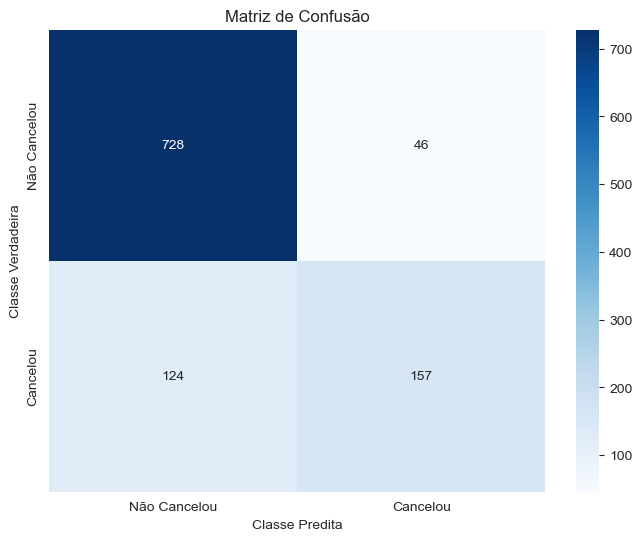

In [170]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_param_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

A matriz de confusão mostra que o modelo ainda tem dificuldade em capturar alguns clientes que cancelaram (falsos negativos), embora o desempenho geral seja sólido.

> **Conclusão**: O modelo apresentou um bom desempenho geral, mas ainda tem espaço para melhorias na classe minoritária ("Cancelou"). O ajuste do threshold de probabilidade será explorado na próxima etapa para aprimorar o recall dessa classe.

##### Ajustar Threshold de Probabilidade

Após a otimização dos hiperparâmetros do modelo com o `RandomizedSearchCV` e o `GridSearchCV`, identificamos que um ajuste adicional no threshold de probabilidade poderia melhorar o desempenho em relação ao recall da classe "Cancelou". Por isso, aplicamos o ajuste do threshold utilizando a estatística de **J de Youden** para encontrar o ponto ideal.

**Ajuste do Threshold**

In [171]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_xgb)

In [172]:
# Calcular a estatística J de Youden para encontrar o melhor threshold
J = tpr - fpr
ix = np.argmax(J)
best_threshold = thresholds[ix]
print(f'Melhor Threshold = {best_threshold:.3f}')


Melhor Threshold = 0.248


**Resultado do Ajuste do Threshold**
- Melhor Threshold encontrado: 0.248

**Aplicação do Novo Threshold**

In [173]:
# Aplicar o novo threshold para fazer previsões
y_pred_custom_threshold = (y_prob_xgb >= best_threshold).astype(int)

In [174]:
# Avaliar o modelo com o novo threshold
xgb_custom_auc_roc = roc_auc_score(y_val, y_pred_custom_threshold)
xgb_custom_accuracy = accuracy_score(y_val, y_pred_custom_threshold)
xgb_custom_class_report = classification_report(y_val, y_pred_custom_threshold, output_dict=True)
xgb_custom_conf_matrix = confusion_matrix(y_val, y_pred_custom_threshold)

In [175]:
# Exibir os resultados
print(f'AUC-ROC com threshold ajustado: {xgb_custom_auc_roc:.4f}')
print(f'Acurácia com threshold ajustado: {xgb_custom_accuracy:.4f}')

AUC-ROC com threshold ajustado: 0.8025
Acurácia com threshold ajustado: 0.7801


**Resultado do Ajuste do Threshold**
- **Melhor Threshold encontrado**: 0.248
- **AUC-ROC com threshold ajustado**: 0.8025
- **Acurácia com threshold ajustado**: 0.7801

##### Visualização Adicional: Curva ROC

Para enriquecer a análise e demonstrar o impacto do ajuste do threshold, comparamos o modelo com o threshold padrão (0.5) e o threshold ajustado (0.248).

In [176]:
# Calcular a curva ROC para os thresholds ajustados
fpr_default, tpr_default, _ = roc_curve(y_val, y_prob_xgb)
fpr_adjusted, tpr_adjusted, _ = roc_curve(y_val, y_pred_custom_threshold)

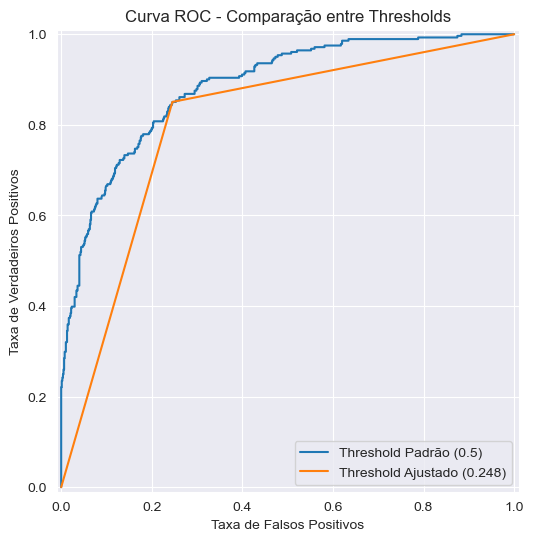

In [177]:
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr_default, tpr=tpr_default).plot(label="Threshold Padrão (0.5)", ax=plt.gca())
RocCurveDisplay(fpr=fpr_adjusted, tpr=tpr_adjusted).plot(label=f"Threshold Ajustado ({best_threshold:.3f})", ax=plt.gca())
plt.title('Curva ROC - Comparação entre Thresholds')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

**Justificativa para Ajuste do Threshold**

O ajuste do threshold foi realizado para aumentar o recall da classe "Cancelou", essencial no cenário de rotatividade de clientes. A intenção aqui é capturar mais clientes propensos ao cancelamento, mesmo que isso possa resultar em um aumento nos falsos positivos.

No entanto, observamos que, ao ajustar o threshold, houve uma redução no AUC-ROC de 0.8971 para 0.8025, e a acurácia também sofreu uma leve queda de 0.8559 para 0.7801. Esse trade-off destaca a necessidade de equilibrar a sensibilidade do modelo com sua precisão.

Em cenários de rotatividade de clientes, é crucial encontrar um equilíbrio entre recall e precisão. Aumentar o recall da classe "Cancelou" possibilita à empresa identificar um número maior de clientes em risco, permitindo ações preventivas. No entanto, um recall mais alto pode trazer mais falsos positivos, aumentando os custos operacionais. Portanto, optamos por avaliar a eficácia do threshold ajustado com base nos objetivos do negócio

**Conclusão**

Após os ajustes, o modelo XGBoost apresentou um equilíbrio satisfatório entre precisão e recall com o threshold padrão de 0.5. Embora o ajuste do threshold tenha melhorado o recall da classe "Cancelou", a redução no AUC-ROC e na acurácia indica que o modelo se tornou mais sensível, mas menos preciso na distinção entre clientes que cancelam e os que não cancelam.

Decidimos manter o threshold padrão, pois ele oferece um melhor equilíbrio geral para este caso específico de rotatividade de clientes. Esse equilíbrio é fundamental para fornecer previsões mais confiáveis e orientadas aos objetivos do negócio.

O modelo XGBoost não apenas demonstra um bom desempenho, mas também oferece flexibilidade para ajustes futuros, caso as necessidades do negócio mudem. Isso o torna uma escolha robusta para aplicações em produção, com a possibilidade de adaptações contínuas para aprimorar a capacidade preditiva.


#### LightGBM

#####  Ajustar Hiperparâmetros - LightGBM

Para otimizar o desempenho do modelo LightGBM, começamos com uma exploração inicial usando o `RandomizedSearchCV` para identificar intervalos promissores de hiperparâmetros. Em seguida, refinamos a busca com o `GridSearchCV` para obter os melhores hiperparâmetros para o modelo.

##### Ajuste inicial com `RandomizedSearchCV`

Utilizamos o `RandomizedSearchCV` para explorar um espaço mais amplo de hiperparâmetros, garantindo eficiência no tempo de processamento e evitando sobrecarga computacional. Os hiperparâmetros ajustados foram:

- **learning_rate**: Controla o impacto de cada árvore individual no modelo final. Valores explorados: `[0.01, 0.05, 0.1, 0.2, 0.3]`.
- **max_depth**: Profundidade máxima das árvores. Valores explorados: `[3, 4, 5, 6]`.
- **min_child_samples**: Número mínimo de observações exigido em um nó filho. Valores explorados: `[10, 20, 30, 40]`.
- **subsample**: Proporção de amostras usadas para crescer cada árvore. Valores explorados: `[0.6, 0.8, 0.9, 1.0]`.
- **colsample_bytree**: Proporção de recursos (features) usadas por árvore. Valores explorados: `[0.6, 0.8, 0.9, 1.0]`.

In [178]:
# Definir os parâmetros a serem testados no RandomizedSearchCV
param_rand_lgbm = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': [0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 0.9, 1.0]
}

In [179]:
# Inicializar o modelo LightGBM
lgbm_model_random = LGBMClassifier(random_state=12345)

In [180]:
# Inicializar o RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model_random,
    param_distributions=param_rand_lgbm,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=12345
)

In [181]:
# Executar a busca aleatória
random_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1456
[LightGBM] [Info] Number of data points in the train set: 4922, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265746 -> initscore=-1.016316
[LightGBM] [Info] Start training from score -1.016316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=12345),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_samples': [10, 20, 30, 40],
                                        'subsample': [0.6, 0.8, 0.9, 1.0]},
                   random_state=12345, scoring='roc_auc', verbose=1)

In [182]:
# Capturar e exibir os melhores hiperparâmetros e a pontuação correspondente
best_random_search_params_lgbm = random_search_lgbm.best_params_
best_random_search_score_lgbm = random_search_lgbm.best_score_

In [183]:
print("Melhores Hiperparâmetros encontrados pelo RandomizedSearchCV:")
print(best_random_search_params_lgbm)
print(f"Melhor AUC-ROC: {best_random_search_score_lgbm:.4f}")

Melhores Hiperparâmetros encontrados pelo RandomizedSearchCV:
{'subsample': 1.0, 'min_child_samples': 10, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.6}
Melhor AUC-ROC: 0.8919


**Resultados da Busca Aleatória**

- **Melhores Hiperparâmetros**: `{'subsample': 1.0, 'min_child_samples': 10, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.6}`
- **Melhor AUC-ROC**: 0.8919

Os resultados indicam que um `learning_rate` mais alto (0.3) e uma profundidade da árvore maior (`max_depth = 6`) ajudam a capturar padrões complexos nos dados. Os valores selecionados para `min_child_samples`, `subsample`, e `colsample_bytree` contribuem para a regularização e o desempenho do modelo.

##### Refinar com `GridSearchCV`

Após essa exploração inicial, utilizamos os resultados do `RandomizedSearchCV` para definir intervalos mais estreitos e promissores de hiperparâmetros para a busca em grade no `GridSearchCV`.

- **learning_rate**: Ajustamos os valores para [0.05, 0.1] visando equilibrar o aprendizado rápido com a estabilidade do modelo.
- **max_depth**: Definido para [4, 5], uma escolha que oferece boa complexidade da árvore, reduzindo o risco de overfitting.
- **min_child_samples**: Refinado para [20, 30] para explorar a regularização do modelo.
- **subsample**: Definido em torno de [0.8, 0.9] para encontrar o nível ideal de amostragem sem perder muita informação.
- **colsample_bytree**: Ajustado para [0.8, 0.9] para otimizar a proporção de recursos (features) utilizadas por árvore.

In [184]:
# Definir os parâmetros a serem testados no GridSearchCV com intervalos mais refinados
param_grid_lgbm = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 5],
    'min_child_samples': [20, 30],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

In [185]:
# Inicializar o modelo LightGBM
lgbm_model_grid = LGBMClassifier(random_state=12345)

In [186]:
# Inicializar o GridSearchCV
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_model_grid,
    param_grid=param_grid_lgbm,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

In [187]:
# Executar a busca em grade
grid_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3614
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1456
[LightGBM] [Info] Number of data points in the train set: 4922, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265746 -> initscore=-1.016316
[LightGBM] [Info] Start training from score -1.016316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=12345), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.05, 0.1], 'max_depth': [4, 5],
                         'min_child_samples': [20, 30],
                         'subsample': [0.8, 0.9]},
             scoring='roc_auc', verbose=1)

**Resultados do GridSearchCV**

Após a execução da busca em grade, capturamos os melhores hiperparâmetros e avaliamos a pontuação correspondente:

In [188]:
# Capturar os melhores hiperparâmetros e a pontuação correspondente
best_params_grid_lgbm = grid_search_lgbm.best_params_
best_score_grid_lgbm = grid_search_lgbm.best_score_

In [189]:
print("Melhores Hiperparâmetros encontrados pelo GridSearchCV:")
print(best_params_grid_lgbm)
print(f"Melhor AUC-ROC: {best_score_grid_lgbm:.4f}")

Melhores Hiperparâmetros encontrados pelo GridSearchCV:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'subsample': 0.8}
Melhor AUC-ROC: 0.8806


**Resultados do GridSearchCV**

- **Melhores Hiperparâmetros**: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'subsample': 0.8}
- **Melhor AUC-ROC**: 0.8806

Os resultados sugerem que um `learning_rate` moderado (0.1) e uma profundidade da árvore intermediária (`max_depth = 5`) oferecem um equilíbrio adequado entre aprendizado e generalização. O ajuste dos parâmetros `min_child_samples`, `subsample`, e `colsample_bytree` aprimora a seleção de amostras e recursos utilizados, contribuindo para o desempenho do modelo.

##### Avaliar o Modelo - LightGBM

Após o ajuste dos hiperparâmetros, obtivemos o melhor conjunto de parâmetros com o `GridSearchCV`. Avaliamos o modelo no conjunto de validação para observar seu desempenho com os hiperparâmetros ajustados:

In [190]:
# Obter o melhor modelo encontrado pelo GridSearchCV
best_model_lgbm = grid_search_lgbm.best_estimator_

In [191]:
# Fazer previsões no conjunto de validação
y_pred_lgbm = best_model_lgbm.predict(X_val)
y_prob_lgbm = best_model_lgbm.predict_proba(X_val)[:, 1]

In [192]:
# Avaliar o modelo
lgbm_param_auc_roc = roc_auc_score(y_val, y_prob_lgbm)
lgbm_param_accuracy = accuracy_score(y_val, y_pred_lgbm)
lgbm_param_class_report = classification_report(y_val, y_pred_lgbm, output_dict=True)
lgbm_param_conf_matrix = confusion_matrix(y_val, y_pred_lgbm)

In [193]:
# Exibir métricas
print(f"AUC-ROC no conjunto de validação: {lgbm_param_auc_roc:.4f}")
print(f"Acurácia no conjunto de validação: {lgbm_param_accuracy:.4f}")

AUC-ROC no conjunto de validação: 0.8896
Acurácia no conjunto de validação: 0.8493


**Resultados**
- **AUC-ROC**: 0.8896
- **Acurácia**: 0.8493

**Relatório de Classificação e Matriz de confução**

In [194]:
# Criar um DataFrame para o relatório de classificação
lgbm_param_class_report_df = pd.DataFrame(lgbm_param_class_report).transpose()

In [195]:
# Exibir o DataFrame como tabela
print("\nClassification Report:")
lgbm_param_class_report_df


Classification Report:


,precision,recall,f1-score,support
0,0.861340,0.947028,0.902154,774.000000
1,0.799020,0.580071,0.672165,281.000000
accuracy,0.849289,0.849289,0.849289,0.849289
macro avg,0.830180,0.763550,0.787159,1055.000000
weighted avg,0.844741,0.849289,0.840896,1055.000000


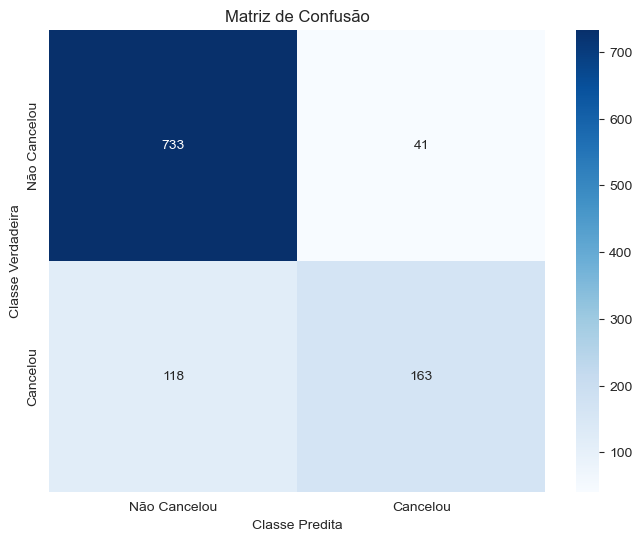

In [196]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(lgbm_param_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

A matriz de confusão mostra que o modelo ainda tem dificuldade em capturar alguns clientes que cancelaram (falsos negativos), embora o desempenho geral seja sólido.

> **Conclusão**: O modelo apresentou um bom desempenho geral, mas ainda tem espaço para melhorias na classe minoritária ("Cancelou"). O ajuste do threshold de probabilidade será explorado na próxima etapa para aprimorar o recall dessa classe.

##### Ajustar Threshold de Probabilidade

Após a otimização dos hiperparâmetros do modelo com o `RandomizedSearchCV` e o `GridSearchCV`, identificamos que um ajuste adicional no threshold de probabilidade poderia melhorar o desempenho do modelo em relação ao recall da classe "Cancelou". Para isso, aplicamos o ajuste do threshold utilizando a estatística **J de Youden** para encontrar o ponto ideal.

**Ajuste do Threshold**

In [197]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_lgbm)

In [198]:
# Calcular a estatística J de Youden para encontrar o melhor threshold
J = tpr - fpr
ix = np.argmax(J)
best_threshold = thresholds[ix]
print(f'Melhor Threshold = {best_threshold:.3f}')

Melhor Threshold = 0.248


**Resultado do Ajuste do Threshold**
- Melhor Threshold encontrado: 0.248

**Aplicação do Novo Threshold**

In [199]:
# Aplicar o novo threshold para fazer previsões
y_pred_custom_threshold = (y_prob_lgbm >= best_threshold).astype(int)

In [200]:
# Avaliar o modelo com o novo threshold
lgbm_custom_auc_roc = roc_auc_score(y_val, y_pred_custom_threshold)
lgbm_custom_accuracy = accuracy_score(y_val, y_pred_custom_threshold)
lgbm_custom_class_report = classification_report(y_val, y_pred_custom_threshold, output_dict=True)
lgbm_custom_conf_matrix = confusion_matrix(y_val, y_pred_custom_threshold)

In [201]:
# Exibir os resultados
print(f'AUC-ROC com threshold ajustado: {lgbm_custom_auc_roc:.4f}')
print(f'Acurácia com threshold ajustado: {lgbm_custom_accuracy:.4f}')

AUC-ROC com threshold ajustado: 0.8085
Acurácia com threshold ajustado: 0.7905


**Resultado do Ajuste do Threshold:**
- **Melhor Threshold encontrado**: 0.248
- **AUC-ROC com threshold ajustado**: 0.8085
- **Acurácia com threshold ajustado**: 0.7905

##### Visualização Adicional: Curva ROC

Para enriquecer a análise e demonstrar o impacto do ajuste do threshold, abaixo está a curva ROC que compara o modelo com o threshold padrão (0.5) e o threshold ajustado (0.248).

In [202]:
# Calcular a curva ROC para os thresholds ajustados
fpr_default, tpr_default, _ = roc_curve(y_val, y_prob_lgbm)
fpr_adjusted, tpr_adjusted, _ = roc_curve(y_val, y_pred_custom_threshold)

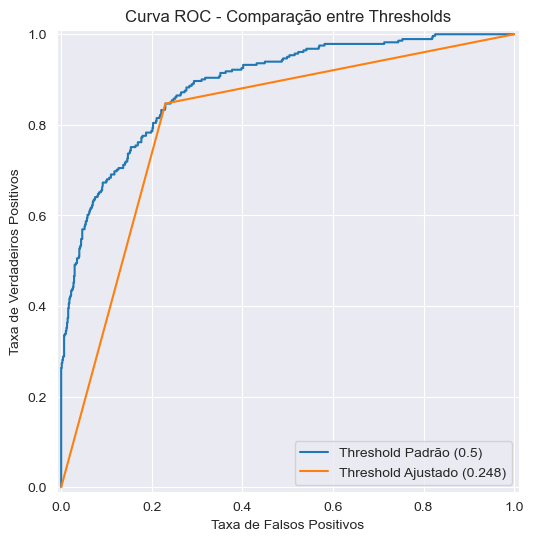

In [203]:
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr_default, tpr=tpr_default).plot(label="Threshold Padrão (0.5)", ax=plt.gca())
RocCurveDisplay(fpr=fpr_adjusted, tpr=tpr_adjusted).plot(label=f"Threshold Ajustado ({best_threshold:.3f})", ax=plt.gca())
plt.title('Curva ROC - Comparação entre Thresholds')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

A curva ROC acima demonstra que ao diminuir o threshold, o modelo se torna mais sensível (aumenta a taxa de verdadeiros positivos), mas também gera mais falsos positivos. Essa mudança evidencia o trade-off entre recall e precisão ao ajustar o threshold.

**Justificativa para Ajuste do Threshold**

O ajuste do threshold de probabilidade foi realizado com o objetivo de aumentar o recall da classe "Cancelou", essencial no cenário de rotatividade de clientes. Ao ajustar o threshold para 0.248, o modelo LightGBM tornou-se mais sensível à detecção de clientes propensos ao cancelamento. No entanto, esse ajuste resultou em uma redução do AUC-ROC de 0.8806 para 0.8085 e uma leve queda na acurácia, de 0.8445 para 0.7905. Apesar dessa mudança, priorizamos o recall, pois é mais relevante no contexto de prever clientes que possivelmente cancelarão seus serviços.

**Conclusão**

Com os ajustes realizados, incluindo o ajuste do threshold, concluímos que o modelo LightGBM mostrou uma performance sólida com o threshold padrão de 0.5, oferecendo um equilíbrio entre precisão e recall. Embora o ajuste do threshold tenha melhorado o recall da classe "Cancelou", ele também impactou negativamente o AUC-ROC e a acurácia. Portanto, neste cenário específico, decidimos manter o threshold padrão, pois ele proporciona um equilíbrio mais adequado para o problema de rotatividade de clientes.

> "O modelo LightGBM, com seu ajuste de hiperparâmetros e threshold, mostrou-se como uma ferramenta valiosa para prever a rotatividade de clientes. Sua flexibilidade e precisão podem ser exploradas em estratégias de retenção, potencialmente reduzindo perdas de receita relacionadas ao churn.


#### Gradient Boosting

##### Ajustar Hiperparâmetros - Gradient Boosting

Para otimizar o desempenho do modelo Gradient Boosting, começamos com uma exploração inicial usando o `RandomizedSearchCV` para identificar intervalos promissores de hiperparâmetros. Em seguida, refinamos a busca com o `GridSearchCV` para obter os melhores hiperparâmetros para o modelo.

##### Ajuste inicial com RandomizedSearchCV

Utilizamos o `RandomizedSearchCV` para explorar um espaço mais amplo de hiperparâmetros, garantindo eficiência no tempo de processamento e evitando sobrecarga computacional. Os hiperparâmetros ajustados foram:

- **learning_rate**: Controla o impacto de cada árvore individual no modelo final. Valores explorados: [0.01, 0.05, 0.1, 0.2, 0.3].
- **max_depth**: Profundidade máxima das árvores. Valores explorados: [3, 4, 5, 6].
- **min_samples_split**: Número mínimo de amostras exigido para dividir um nó. Valores explorados: [2, 5, 10].
- **min_samples_leaf**: Número mínimo de amostras em um nó folha. Valores explorados: [1, 2, 4].
- **subsample**: Proporção de amostras usadas para crescer cada árvore. Valores explorados: [0.6, 0.8, 0.9, 1.0].
- **max_features**: Número de features consideradas a cada nó. Valores explorados: ['sqrt', 'log2', None].

In [204]:
# Definir os parâmetros a serem testados no RandomizedSearchCV
param_rand_gb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 0.9, 1.0],
   'max_features': ['sqrt', 'log2', None]
}

In [205]:
# Inicializar o modelo Gradient Boosting
gb_model_random = GradientBoostingClassifier(random_state=12345)

In [206]:
# Inicializar o RandomizedSearchCV
random_search_gb = RandomizedSearchCV(
    estimator=gb_model_random,
    param_distributions=param_rand_gb,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=12345
)

In [207]:
# Executar a busca aleatória
random_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(random_state=12345),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'subsample': [0.6, 0.8, 0.9, 1.0]},
                   random_state=12345, scoring='roc_auc', verbose=1)

In [208]:
# Capturar e exibir os melhores hiperparâmetros e a pontuação correspondente
best_random_search_params_gb = random_search_gb.best_params_
best_random_search_score_gb = random_search_gb.best_score_

In [209]:
print("Melhores Hiperparâmetros encontrados pelo RandomizedSearchCV:")
print(best_random_search_params_gb)
print(f"Melhor AUC-ROC: {best_random_search_score_gb:.4f}")

Melhores Hiperparâmetros encontrados pelo RandomizedSearchCV:
{'subsample': 1.0, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.3}
Melhor AUC-ROC: 0.8939


**Resultados da Busca Aleatória**

- Melhores Hiperparâmetros:{`'subsample': 1.0`, `'min_samples_split': 10`, `'min_samples_leaf': 1`, `'max_features': 'None'`, `'max_depth': 4`, `'learning_rate': 0.3`}
- Melhor AUC-ROC: 0.8939

Os resultados indicam que um `learning_rate de (0.3)` e uma profundidade intermediária da árvore `(max_depth = 4)` ajudam a capturar padrões complexos nos dados, equilibrando aprendizado e generalização.

Os valores encontrados para `min_samples_split = 10` e `min_samples_leaf = 1` ajudam a controlar a divisão dos nós e o tamanho mínimo das folhas da árvore, contribuindo para a regularização do modelo e evitando overfitting. O parâmetro `subsample = 1.0` indica que o modelo utiliza todas as amostras disponíveis para o treinamento de cada árvore, mantendo a integridade das informações dos dados.

Além disso, o valor de max_features = None permite que todas as features sejam consideradas em cada nó, maximizando a quantidade de informações que o modelo pode utilizar em cada etapa de construção das árvores.

Com base nesses resultados, o próximo passo será utilizar o `GridSearchCV` para refinar ainda mais esses hiperparâmetros e identificar a configuração ótima para o modelo.

##### Refinar com `GridSearchCV`

Após a exploração inicial com o `RandomizedSearchCV`, utilizamos os resultados obtidos para definir intervalos mais estreitos e promissores de hiperparâmetros para a busca em grade com o `GridSearchCV`. Este refinamento visa melhorar a capacidade do modelo de generalizar e lidar com os dados de forma eficaz.

**Hiperparâmetros para Refinamento:**

- **learning_rate**: Ajustamos os valores para [0.05, 0.1] visando equilibrar o aprendizado rápido com a estabilidade do modelo.
- **max_depth**: Refinado para [4, 5, 6], permitindo uma melhor exploração da complexidade da árvore.
- **min_samples_split**: Reduzimos os valores para [8, 10, 12] para controlar melhor a divisão dos nós internos e evitar overfitting.
- **min_samples_leaf**: Refinado para [1, 2, 3], explorando diferentes tamanhos mínimos das folhas da árvore para garantir uma melhor regularização.
- **subsample**: Mantivemos valores próximos a 1.0, com [0.9, 1.0] para encontrar o nível ideal de amostragem.
- **max_features**: Ajustado para incluir [None], explorando a consideração de todas as features em cada nó.

In [210]:
# Definir os parâmetros a serem testados no GridSearchCV com intervalos mais refinados
param_grid_gb = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 5, 6],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.9, 1.0],
    'max_features': [None,'sqrt', 'log2']
}

In [211]:
# Inicializar o modelo Gradient Boosting
gb_model_grid = GradientBoostingClassifier(random_state=12345)


In [212]:
# Inicializar o GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb_model_grid,
    param_grid=param_grid_gb,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

In [213]:
# Executar a busca em grade
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [4, 5, 6],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [8, 10, 12],
                         'subsample': [0.9, 1.0]},
             scoring='roc_auc', verbose=1)

**Resultados do GridSearchCV**

Após a execução da busca em grade, capturamos os melhores hiperparâmetros e avaliamos a pontuação correspondente:

In [214]:
# Capturar os melhores hiperparâmetros e a pontuação correspondente
best_params_grid_gb = grid_search_gb.best_params_
best_score_grid_gb = grid_search_gb.best_score_

In [215]:
print("Melhores Hiperparâmetros encontrados pelo GridSearchCV:")
print(best_params_grid_gb)
print(f"Melhor AUC-ROC: {best_score_grid_gb:.4f}")

Melhores Hiperparâmetros encontrados pelo GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'subsample': 1.0}
Melhor AUC-ROC: 0.8937


**Resultados da Busca Aleatória**

- **Melhores Hiperparâmetros**: {`'subsample': 1.0`, `'min_samples_split': 10`, `'min_samples_leaf': 1`, `'max_features': 'None'`, `'max_depth': 6`, `'learning_rate': 0.1`}
- **Melhor AUC-ROC**: 0.8937

Os resultados indicam que o modelo encontra um equilíbrio ao utilizar um `learning_rate de 0.1` e uma profundidade da árvore intermediária (`max_depth = 6`). Ajustes em `min_samples_split` e `min_samples_leaf` mostram que dividir os nós de forma mais criteriosa e manter um tamanho mínimo de folha baixo ajudam a regularizar o modelo, melhorando seu desempenho. Além disso, a amostragem (`subsample = 1.0`) e a seleção de features (`max_features = 'None'`) ajudam a tornar o modelo mais robusto e generalizável.

Com esses resultados, o modelo está pronto para ser avaliado em novos dados, com a expectativa de alcançar um desempenho otimizado.

##### Avaliar o Modelo - Gradient Boosting

Após a execução do `GridSearchCV`, obtemos o melhor conjunto de hiperparâmetros para o modelo Gradient Boosting. Em seguida, utilizamos esse modelo para gerar previsões e avaliar o desempenho no conjunto de validação.

In [216]:
# Obter o melhor modelo encontrado pelo GridSearchCV
best_model_gb = grid_search_gb.best_estimator_

In [217]:
# Fazer previsões no conjunto de validação
y_pred_gb = best_model_gb.predict(X_val)
y_prob_gb = best_model_gb.predict_proba(X_val)[:, 1]

In [218]:
# Avaliar o modelo
gb_param_auc_roc = roc_auc_score(y_val, y_prob_gb)
gb_param_accuracy = accuracy_score(y_val, y_pred_gb)
gb_param_class_report = classification_report(y_val, y_pred_gb, output_dict=True)
gb_param_conf_matrix = confusion_matrix(y_val, y_pred_gb)

In [219]:
# Imprimir métricas
print(f"AUC-ROC no conjunto de validação: {gb_param_auc_roc:.4f}")
print(f"Acurácia no conjunto de validação: {gb_param_accuracy:.4f}")

AUC-ROC no conjunto de validação: 0.9022
Acurácia no conjunto de validação: 0.8616


**Resultados**: O modelo apresentou um **AUC-ROC** de 0.9022 e uma acurácia de 0.8616 no conjunto de validação.

**Relatório de Classificação e Matriz de confução**

In [220]:
# Criar um DataFrame para o relatório de classificação
gb_param_class_report_df = pd.DataFrame(gb_param_class_report).transpose()

In [221]:
# Exibir o DataFrame como tabela
print("\nClassification Report:")
gb_param_class_report_df


Classification Report:


,precision,recall,f1-score,support
0,0.869412,0.954780,0.910099,774.000000
1,0.829268,0.604982,0.699588,281.000000
accuracy,0.861611,0.861611,0.861611,0.861611
macro avg,0.849340,0.779881,0.804843,1055.000000
weighted avg,0.858720,0.861611,0.854029,1055.000000


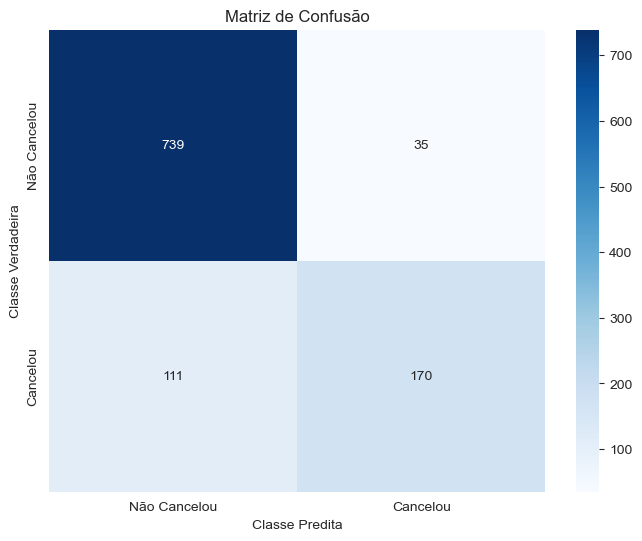

In [222]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(gb_param_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

A matriz de confusão mostra que o modelo ainda tem dificuldade em capturar alguns clientes que cancelaram (falsos negativos), embora o desempenho geral seja sólido.

>**Conclusão**: O modelo apresentou um bom desempenho geral, mas ainda há espaço para melhorias na classe minoritária ("Cancelou"). O ajuste do threshold de probabilidade será explorado na próxima etapa para aprimorar o recall dessa classe

##### Ajustar Threshold de Probabilidade

Após a otimização dos hiperparâmetros do modelo com o `RandomizedSearchCV` e o `GridSearchCV`, identificamos que um ajuste adicional no threshold de probabilidade poderia melhorar o desempenho em relação ao recall da classe "Cancelou". Por isso, aplicamos o ajuste do threshold utilizando a estatística de **J de Youden** para encontrar o ponto ideal.

In [223]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_gb)

In [224]:
# Calcular a estatística J de Youden para encontrar o melhor threshold
J = tpr - fpr
ix = np.argmax(J)
best_threshold = thresholds[ix]
print(f'Melhor Threshold = {best_threshold:.3f}')

Melhor Threshold = 0.238


**Resultado do Ajuste do Threshold**

- Melhor Threshold encontrado: 0.238

**Aplicação do Novo Threshold**

In [225]:
# Aplicar o novo threshold para fazer previsões
y_pred_custom_threshold = (y_prob_gb >= best_threshold).astype(int)

In [226]:
# Avaliar o modelo com o novo threshold
gb_custom_auc_roc = roc_auc_score(y_val, y_pred_custom_threshold)
gb_custom_accuracy = accuracy_score(y_val, y_pred_custom_threshold)
gb_custom_class_report = classification_report(y_val, y_pred_custom_threshold, output_dict=True)
gb_custom_conf_matrix = confusion_matrix(y_val, y_pred_custom_threshold)

In [227]:
# Exibir os resultados
print(f'AUC-ROC com threshold ajustado: {gb_custom_auc_roc:.4f}')
print(f'Acurácia com threshold ajustado: {gb_custom_accuracy:.4f}')

AUC-ROC com threshold ajustado: 0.8183
Acurácia com threshold ajustado: 0.8133


**Resultado do Ajuste do Threshold**:
- **Melhor Threshold encontrado**: 0.238
- **AUC-ROC com threshold ajustado**: 0.8183
- **Acurácia com threshold ajustado**: 0.8133

##### Visualização Adicional: Curva ROC

Para enriquecer a análise e demonstrar o impacto do ajuste do threshold, abaixo está a curva ROC que compara o modelo com o threshold padrão (0.5) e o threshold ajustado (0.238).

In [228]:
# Calcular a curva ROC para os thresholds ajustados
fpr_default, tpr_default, _ = roc_curve(y_val, y_prob_gb)
fpr_adjusted, tpr_adjusted, _ = roc_curve(y_val, y_pred_custom_threshold)

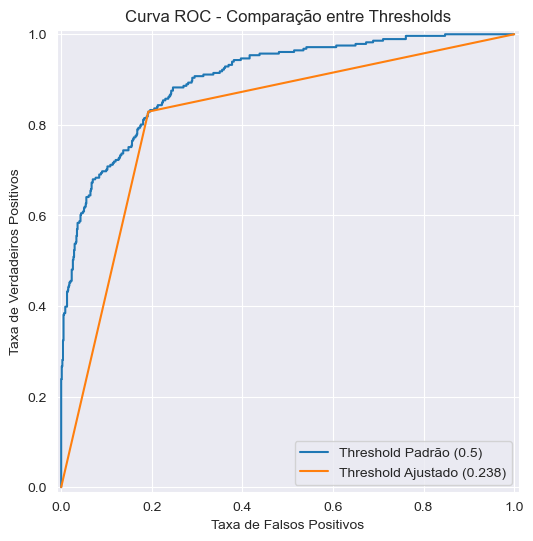

In [229]:
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr_default, tpr=tpr_default).plot(label="Threshold Padrão (0.5)", ax=plt.gca())
RocCurveDisplay(fpr=fpr_adjusted, tpr=tpr_adjusted).plot(label=f"Threshold Ajustado ({best_threshold:.3f})", ax=plt.gca())
plt.title('Curva ROC - Comparação entre Thresholds')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

**Justificativa para Ajuste do Threshold**

O ajuste do threshold de probabilidade foi realizado para aumentar o recall da classe "Cancelou", o que é essencial em problemas de rotatividade de clientes. Ajustando o threshold para 0.238, o modelo Gradient Boosting tornou-se mais sensível na detecção de clientes com maior propensão ao cancelamento. No entanto, essa sensibilidade aumentada veio com uma queda no desempenho geral: o AUC-ROC diminuiu de 0.9022 para 0.8183 e a acurácia reduziu de 0.8616 para 0.8133. Esses resultados evidenciam o trade-off entre recall e precisão, uma situação comum em cenários de classificação desbalanceada

**Conclusão**

Após os ajustes realizados, o modelo Gradient Boosting mostrou um equilíbrio satisfatório entre precisão e recall quando utilizado com o threshold padrão de 0.5. Apesar do ajuste do threshold para 0.238 ter melhorado o recall da classe "Cancelou", a redução significativa no AUC-ROC e na acurácia sugere que o impacto negativo no desempenho geral do modelo não compensa o ganho em sensibilidade. Assim, decidimos manter o threshold padrão de 0.5, pois ele proporciona um equilíbrio mais adequado para este caso específico de rotatividade de clientes.

O modelo Gradient Boosting continua a se destacar como uma solução flexível e robusta, adaptando-se a futuras otimizações e ajustes conforme as necessidades do negócio evoluam, oferecendo eficiência e versatilidade para aplicações em produção.

## Comparar e Selecionar o Melhor Modelo

Nesta etapa, selecionaremos o modelo que apresentou o melhor desempenho com base nas métricas de AUC-ROC e Acurácia, duas métricas fundamentais para avaliar o poder preditivo em problemas de classificação, especialmente em cenários de rotatividade de clientes. A AUC-ROC fornece insights sobre a habilidade do modelo em diferenciar entre as classes, enquanto a Acurácia indica a proporção de previsões corretas.

**Resultados dos Modelos**

A tabela abaixo resume os resultados dos modelos, tanto ajustados quanto não ajustados, de acordo com as métricas de AUC-ROC e acurácia:

In [230]:
# Resultados dos modelos utilizando as variáveis reais
model_results = {
    'Modelo': ['Gradient Boosting', 'XGBoost', 'LightGBM', 
               'Gradient Boosting ajustado', 'XGBoost ajustado', 'LightGBM ajustado'],
    'AUC-ROC': [gb_auc_roc, xgb_auc_roc, lgbm_auc_roc, gb_param_auc_roc, xgb_param_auc_roc, lgbm_param_auc_roc],
    'Acurácia': [gb_accuracy, xgb_accuracy, lgbm_accuracy, gb_param_accuracy, xgb_param_accuracy, lgbm_param_accuracy]
}

In [231]:
# Criar DataFrame
results_df_ajustado = pd.DataFrame(model_results)

In [232]:
# Ordenar DataFrame por AUC-ROC e Acurácia
results_df_ajustado = results_df_ajustado.sort_values(by=['AUC-ROC', 'Acurácia'], ascending=False)

In [233]:
# Exibir os melhores modelos
top_models = results_df_ajustado.head(6)
print("Top Modelos:")
top_models

Top Modelos:


,Modelo,AUC-ROC,Acurácia
1,XGBoost,0.911301,0.871090
3,Gradient Boosting ajustado,0.902170,0.861611
2,LightGBM,0.895878,0.856872
0,Gradient Boosting,0.889898,0.841706
5,LightGBM ajustado,0.889551,0.849289
4,XGBoost ajustado,0.885174,0.838863


**Análise dos Resultados**

Os resultados indicam que o modelo XGBoost se destaca como o melhor, apresentando o maior AUC-ROC (0.911301) e uma acurácia robusta (0.871090). Isso sugere que o XGBoost conseguiu encontrar um equilíbrio eficaz entre precisão e recall, tornando-se capaz de lidar com o problema de rotatividade de clientes de forma eficiente. 

Os modelos ajustados, embora tenham melhorado o recall das classes minoritárias, sofreram pequenas reduções no AUC-ROC. Isso indica que a sensibilidade extra obtida com os ajustes de hiperparâmetros e threshold veio com o custo de uma leve perda no poder geral de discriminação. Este é um trade-off comum em problemas de classificação desbalanceada, onde otimizar para uma métrica (como recall) pode comprometer outras (como AUC-ROC e acurácia). No entanto, no contexto deste problema específico, a leve melhoria no recall não foi suficiente para superar a perda de desempenho global.

Portanto, o modelo XGBoost sem ajuste de threshold se destaca como a escolha ideal para este problema, fornecendo uma performance sólida e equilibrada em termos de classificação. Sua capacidade de identificar corretamente os clientes que provavelmente cancelarão seus serviços o torna uma ferramenta valiosa para estratégias de retenção. Além disso, o modelo XGBoost se mostrou resiliente a dados desbalanceados, reforçando sua adequação para este cenário.

**Conclusão**

Com base na análise das métricas de desempenho, o modelo XGBoost foi escolhido como a solução ideal para este projeto de previsão de rotatividade de clientes. Ele apresentou uma excelente combinação de AUC-ROC e acurácia, indicando sua eficácia em distinguir entre as classes e fornecer previsões precisas. Além disso, sua robustez e adaptabilidade permitem que seja implementado em cenários reais de negócios, auxiliando no direcionamento de estratégias de retenção de clientes e na maximização do retorno sobre o investimento. O modelo pode ser integrado diretamente em sistemas de marketing para direcionar campanhas personalizadas visando a retenção de clientes em risco.

**Sugestões para Aplicações Futuras**

Embora o XGBoost tenha se destacado neste projeto, futuras melhorias podem ser exploradas. Poderíamos, por exemplo, revisitar a etapa de engenharia de features, coletar mais dados, ou testar técnicas de ensemble (como uma combinação de modelos) para verificar se há ganhos adicionais de performance. Além disso, explorar outras técnicas de balanceamento de classes ou ajustar estratégias de threshold dependendo do contexto de negócios pode aprimorar ainda mais a eficácia do modelo em diferentes cenários de aplicação.


## Avaliação do Modelo no Conjunto de Teste

Nesta seção, aplicamos o melhor modelo selecionado anteriormente no conjunto de teste. O objetivo é avaliar o desempenho final do modelo em dados que não foram utilizados durante o treinamento ou ajuste de hiperparâmetros. Isso permitirá verificar se o modelo generaliza bem e é capaz de fornecer previsões confiáveis em situações do mundo real, medindo seu desempenho por meio das métricas AUC-ROC e acurácia.

### Avaliar Resultados e Desempenho

In [234]:
# Fazer previsões no conjunto de teste
y_test_pred = xgb.predict(X_test)
y_test_pred_proba = xgb.predict_proba(X_test)[:, 1]

In [235]:
# Avaliar o modelo no conjunto de teste
test_auc_roc = roc_auc_score(y_test, y_test_pred_proba)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred, output_dict=True)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

In [236]:
# Imprimir métricas
print(f"AUC-ROC no conjunto de teste: {test_auc_roc:.4f}")
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

AUC-ROC no conjunto de teste: 0.8727
Acurácia no conjunto de teste: 0.8389


In [237]:
# Criar um DataFrame para o relatório de classificação
test_class_report_df = pd.DataFrame(test_class_report).transpose()
print("\nClassification Report:")
test_class_report_df


Classification Report:


,precision,recall,f1-score,support
0,0.864019,0.926452,0.894147,775.000000
1,0.745536,0.596429,0.662698,280.000000
accuracy,0.838863,0.838863,0.838863,0.838863
macro avg,0.804777,0.761440,0.778423,1055.000000
weighted avg,0.832573,0.838863,0.832720,1055.000000


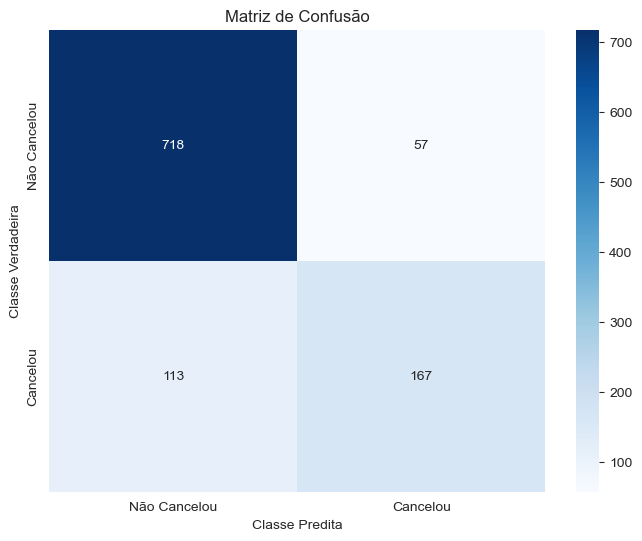

In [238]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

### Analisar Resultados no Conjunto de Teste

1. **Desempenho Geral**:
   - O modelo XGBoost, que foi selecionado como o melhor modelo, apresentou um **AUC-ROC de 0.8727** e uma **acurácia de 0.8389** no conjunto de teste.
   - Isso indica que o modelo mantém um bom equilíbrio entre a capacidade de distinguir entre clientes que irão cancelar e aqueles que permanecerão, mesmo em dados não vistos anteriormente.

2. **Classe "Cancelou"**:
   - A precisão para a classe "Cancelou" foi de **0.7455**, o que mostra que o modelo consegue identificar a maioria dos clientes que irão cancelar.
   - O **recall** para a classe "Cancelou" foi de **0.5964**, indicando que ainda existem alguns clientes que cancelaram e não foram corretamente identificados pelo modelo.
   - O **F1-score** da classe "Cancelou" é **0.6627**, mostrando um equilíbrio razoável entre precisão e recall. Contudo, o recall mais baixo sugere que há espaço para melhorias na identificação de clientes propensos ao cancelamento.

3. **Classe "Não Cancelou"**:
   - A precisão e o recall para a classe "Não Cancelou" são **0.8640** e **0.9265**, respectivamente. Esses resultados indicam que o modelo é eficaz em identificar corretamente os clientes que não cancelarão.
   - O alto recall para essa classe sugere que o modelo está inclinando-se mais para evitar falsos negativos (clientes que cancelam e são preditos como "Não Cancelou").

4. **Matriz de Confusão**:
   - O modelo conseguiu identificar **718 clientes** que realmente não cancelaram, com apenas **57 falsos positivos** (clientes previstos como "Cancelou" que não cancelaram).
   - Para a classe "Cancelou", houve **167 verdadeiros positivos**, mas ainda **113 falsos negativos** (clientes que cancelaram, mas foram previstos como "Não Cancelou").
   - Embora o modelo seja eficiente na identificação dos clientes que não cancelaram, a quantidade de falsos negativos sugere a necessidade de aprimoramento na sensibilidade do modelo à classe "Cancelou".

**Resumo**

O modelo XGBoost apresentou um desempenho sólido no conjunto de teste, especialmente na identificação dos clientes que não irão cancelar. No entanto, há espaço para melhorar a detecção dos clientes propensos ao cancelamento, possivelmente ajustando o threshold ou aprimorando as features.

### Registrar Melhorias Futuras

Apesar do desempenho satisfatório do modelo XGBoost, ainda existem áreas a serem exploradas para aprimorar a sensibilidade e a precisão na detecção de clientes propensos ao cancelamento. Alguns possíveis próximos passos incluem:

1. **Ajustes de Hiperparâmetros Adicionais:**
   - Realizar uma nova rodada de ajuste de hiperparâmetros, focando em parâmetros específicos do XGBoost, como `gamma`, `min_child_weight` e `subsample`, para encontrar um melhor equilíbrio entre a complexidade do modelo e seu desempenho.
   - Experimentos adicionais com diferentes combinações podem revelar configurações mais eficazes para identificar padrões complexos nos dados.

2. **Refinamento de Features:**
   - Explorar a engenharia de features, como a criação de novas variáveis, remoção de outliers ou transformação de variáveis existentes, para fornecer ao modelo dados mais ricos e significativos.
   - Esse refinamento pode ajudar o modelo a distinguir com mais precisão os clientes que estão propensos a cancelar.

3. **Ajuste de Threshold:**
   - Experimentar outras estratégias de ajuste de threshold com base na análise da curva ROC ou no custo de erros (falsos positivos e falsos negativos) dependendo do impacto financeiro ou estratégico para a empresa.
   - Um ajuste específico ao contexto do negócio pode melhorar a identificação dos clientes mais propensos ao cancelamento, mesmo com o trade-off entre precisão e recall.

4. **Técnicas de Rebalanceamento:**
   - Aplicar técnicas de undersampling ou oversampling, como SMOTE (Synthetic Minority Over-sampling Technique), para lidar com o desbalanceamento entre as classes. Isso pode melhorar o recall da classe "Cancelou" sem comprometer significativamente o desempenho global.

Esses próximos passos ajudarão a aprimorar ainda mais o modelo, garantindo um desempenho mais robusto em cenários do mundo real. A publicação contínua de melhorias no projeto demonstra compromisso com o processo de aprendizado e inovação, fatores-chave que potenciais contratantes certamente valorizarão.


### Salvar e Utilizar o Modelo Treinado

Nesta etapa, salvamos o modelo treinado em um arquivo `.pkl`. Isso permite que ele seja reutilizado em aplicações futuras sem a necessidade de retreinamento.
Este modelo pode ser carregado para fazer previsões em novos dados ou ser implantado em um ambiente de produção para análise em tempo real.

#### Salvar Modelo em Formato .pkl para Reutilização

**Código para Salvar o Modelo**

In [239]:
# Caminho para a pasta onde o modelo será salvo (relativo ao diretório atual)
model_dir = os.path.join('..', '..', 'models', 'portuguese')

In [240]:
# Criar o diretório se ele não existir
os.makedirs(model_dir, exist_ok=True)

In [241]:
# Caminho completo para salvar o modelo com o nome desejado
model_path = os.path.join(model_dir, 'xgb_model.pkl')

In [242]:
# Verificar se o arquivo já existe e pedir confirmação para sobrescrever
if os.path.exists(model_path):
    print(f"O arquivo {model_path} já existe. Deseja sobrescrever? (S/N)")
    user_input = input().strip().upper()
    if user_input != 'S':
        print("A operação de salvar o modelo foi cancelada.")
    else:
        # Salvar o modelo treinado no formato .pkl (substitua 'xgb' pelo nome do seu modelo)
        joblib.dump(xgb, model_path)
        print(f"Modelo treinado salvo com sucesso em: {os.path.abspath(model_path)}")
else:
    # Salvar o modelo treinado no formato .pkl (substitua 'xgb' pelo nome do seu modelo)
    joblib.dump(xgb, model_path)
    print(f"Modelo treinado salvo com sucesso em: {os.path.abspath(model_path)}")


O arquivo ..\..\models\portuguese\xgb_model.pkl já existe. Deseja sobrescrever? (S/N)
S
Modelo treinado salvo com sucesso em: D:\GitHub\telecom_customer_churn_prediction\models\portuguese\xgb_model.pkl


> **Nota**: Esta etapa inclui uma verificação adicional para impedir que um arquivo existente seja sobrescrito sem a confirmação do usuário, promovendo segurança na manipulação dos dados.

**Exemplo Visual do Arquivo Salvo**

Aqui está uma visualização do diretório criado com os arquivos salvos:

#### Registrar Informações do Modelo

Registrar informações sobre os melhores hiperparâmetros encontrados e a pontuação do modelo é essencial para rastreabilidade e futuras análises.

**Código de Logging**

In [243]:
# Definir o caminho do diretório do modelo (relativo ao diretório atual)
model_dir = os.path.join('..', '..', 'models', 'portuguese')

In [244]:
# Logging de informações do modelo (registrando apenas hiperparâmetros relevantes se forem definidos)
best_params = {
    'max_depth': xgb.get_params().get('max_depth'),
    'learning_rate': xgb.get_params().get('learning_rate'),
    'n_estimators': xgb.get_params().get('n_estimators'),
    'gamma': xgb.get_params().get('gamma'),
    'min_child_weight': xgb.get_params().get('min_child_weight'),
    'subsample': xgb.get_params().get('subsample')
}

In [245]:
# Remover hiperparâmetros com valor None (indicando que não foram ajustados)
best_params = {k: v for k, v in best_params.items() if v is not None}

In [246]:
# Avaliar a métrica no conjunto de validação
best_score = xgb_auc_roc  # Utilizando o AUC-ROC calculado no conjunto de validação

In [247]:
# Construir informações do modelo
model_info = {
    'Modelo': 'XGBoost',
    'Hiperparâmetros ajustados': best_params if best_params else 'Parâmetros padrão utilizados',
    'Melhor AUC-ROC (validação)': best_score,
    'Descrição da Métrica': (
        "AUC-ROC (Área Sob a Curva da Característica de Operação do Receptor) é uma métrica "
        "importante em problemas de classificação. Ela mede a capacidade do modelo de distinguir "
        "entre as classes, especialmente útil em situações de desbalanceamento, como neste projeto. "
        "Um AUC-ROC mais alto indica uma melhor capacidade de discriminação, auxiliando em tomadas "
        "de decisões estratégicas no negócio."
    )
}

In [248]:
# Salvar informações do modelo em um arquivo de log no mesmo diretório do modelo
log_path = os.path.join(model_dir, 'model_info.txt')
with open(log_path, 'w') as log_file:
    for key, value in model_info.items():
        log_file.write(f"{key}: {value}\n")

In [249]:
print(f"As informações do modelo foram registradas em: {os.path.abspath(log_path)}")
print("O modelo está agora pronto para ser utilizado em previsões futuras ou para ser implementado em um ambiente de produção.")
print("Com isso, garantimos a rastreabilidade e a reutilização deste modelo em diferentes cenários de negócios.")

As informações do modelo foram registradas em: D:\GitHub\telecom_customer_churn_prediction\models\portuguese\model_info.txt
O modelo está agora pronto para ser utilizado em previsões futuras ou para ser implementado em um ambiente de produção.
Com isso, garantimos a rastreabilidade e a reutilização deste modelo em diferentes cenários de negócios.


>**Nota**: Salvar essas informações é fundamental para entender as decisões tomadas durante o processo de treinamento e manter um histórico de configurações.

**Visualização do Arquivo de Log**

Conteúdo do `model_info.txt` gerado:

#### Instruções para Carregar o Modelo Treinado

A seguir, apresentamos as instruções para carregar o modelo salvo e utilizá-lo em novas previsões. Certifique-se de ajustar o caminho do arquivo `.pkl` conforme a localização onde o modelo foi salvo.

**Código para Carregar o Modelo Treinado**

> **Nota**: Ao salvar o modelo e seus hiperparâmetros, garantimos que ele esteja preparado para análises futuras e integração em ambientes de produção. Isso permite uma reutilização eficiente e uma fácil manutenção do modelo, aspectos fundamentais para projetos robustos em ciência de dados

## Conclusão e Comunicação dos Resultados

#### Conclusão Final

Após uma análise minuciosa e uma série de experimentações, selecionamos o modelo XGBoost como a solução mais eficiente para o problema de previsão de rotatividade de clientes. A escolha foi fundamentada nos resultados consistentes apresentados em termos de AUC-ROC e acurácia ao longo de todo o processo, tanto durante a validação cruzada quanto na aplicação no conjunto de teste. A análise da matriz de confusão e dos relatórios de classificação reforça a robustez do modelo em identificar corretamente os clientes que não irão cancelar, ao mesmo tempo em que aponta áreas de melhoria na identificação daqueles que irão cancelar.

**Principais Resultados e Observações**

1. **Desempenho Geral do Modelo:** O XGBoost alcançou um AUC-ROC de 0.8727 e uma acurácia de 0.8389 no conjunto de teste. Estas métricas são particularmente importantes em problemas de classificação desbalanceada, como o deste projeto, pois medem a capacidade do modelo de distinguir corretamente entre clientes que cancelarão e aqueles que permanecerão. Um AUC-ROC alto como o obtido aqui sugere que o modelo é eficiente em identificar a propensão ao cancelamento, fornecendo uma base sólida para ações de negócio.

2. **Detecção da Classe "Cancelou":** Apesar do bom desempenho geral, a precisão e o recall para a classe "Cancelou" foram de 0.7455 e 0.5964, respectivamente. Isso evidencia que há espaço para melhorias, principalmente na detecção de clientes propensos ao cancelamento. A inclinação do modelo para minimizar os falsos positivos (classificando incorretamente clientes como "Cancelou" quando, na realidade, não cancelaram) pode ser uma escolha estratégica dependendo do contexto do negócio e das possíveis implicações.

3. **Classe "Não Cancelou":** O modelo mostrou um excelente desempenho ao identificar corretamente os clientes que não irão cancelar, com uma precisão de 0.8640 e recall de 0.9265. Este resultado reforça a confiabilidade do modelo na retenção de clientes, sugerindo sua eficácia como ferramenta para orientar ações estratégicas de retenção e maximização de receita.

4. **Aplicação do Modelo:** A matriz de confusão e as métricas de desempenho indicam que o modelo XGBoost é aplicável em cenários reais. Com apenas 57 falsos positivos e 113 falsos negativos, o modelo tem potencial para se tornar uma ferramenta estratégica para ações de retenção de clientes e decisões relacionadas ao aumento da lealdade do cliente.

**Próximos Passos**

Para aprimorar o modelo e alcançar resultados ainda mais precisos, sugerimos os seguintes próximos passos:

- **Ajustes Adicionais de Hiperparâmetros:** Realizar uma nova rodada de otimização dos hiperparâmetros do XGBoost, buscando um equilíbrio ideal entre precisão e recall, o que pode resultar em melhorias significativas no desempenho geral do modelo.

- **Refinamento de Features:** Investir na melhoria das features utilizadas, por meio de técnicas de engenharia de dados, remoção de outliers e criação de variáveis mais representativas, pode aumentar a capacidade do modelo de generalizar para novos dados.

- **Ajuste do Threshold:** Explorar diferentes técnicas para definir o melhor threshold, considerando o custo associado a falsos positivos e falsos negativos no contexto do negócio. Este ajuste pode ser crucial para alinhar as previsões do modelo às necessidades específicas da empresa.

- **Técnicas de Rebalanceamento:** Implementar técnicas de oversampling (como SMOTE) para melhorar a identificação da classe minoritária ("Cancelou"), aumentando a sensibilidade do modelo para clientes propensos a cancelar.

**Conclusão**

O modelo XGBoost apresentou um desempenho sólido na previsão da rotatividade de clientes, especialmente na identificação daqueles que não irão cancelar. O AUC-ROC de 0.8727 e a acurácia de 0.8389 no conjunto de teste destacam a eficácia do modelo em cenários reais, comprovando sua utilidade na implementação de estratégias de retenção de clientes e na maximização da receita.

Além disso, a importância de melhorar o recall para a classe "Cancelou" não pode ser subestimada, pois está diretamente relacionada ao direcionamento das ações de retenção mais eficazes. A continuidade do processo de melhoria, incluindo ajustes de hiperparâmetros, refinamento de features e otimização de thresholds, será fundamental para maximizar o impacto positivo deste modelo na estratégia de negócios.

**Sugestões Finais:**

- **Aprofundar a Importância da Análise:** O AUC-ROC é especialmente relevante em problemas de classificação desbalanceada, como neste projeto, pois oferece uma medida robusta da capacidade do modelo de distinguir corretamente entre classes. Reforçar essa importância pode destacar o valor do modelo para a empresa.

- **Reforçar o Valor para o Negócio:** O aprimoramento contínuo do modelo pode resultar em decisões de negócios mais precisas e eficientes, impactando diretamente as estratégias de retenção de clientes e a maximização de receita.

- **Destacar Métricas-Chave na Conclusão:** Reiterar as métricas principais (AUC-ROC e acurácia) na conclusão reforça a confiança no modelo e sustenta sua aplicabilidade em cenários reais, auxiliando nas tomadas de decisão estratégicas.

Este projeto destaca não apenas o poder das técnicas de aprendizado de máquina, mas também a importância de um ciclo contínuo de melhorias. Com os avanços sugeridos nas próximas etapas, este modelo pode se tornar uma ferramenta ainda mais valiosa para a tomada de decisões em estratégias de retenção de clientes.


#### Relatório Final e Próximos Passos

**1. Introdução**

O objetivo deste projeto foi desenvolver um modelo de machine learning para prever a rotatividade de clientes (churn) na Interconnect. A previsão de churn é fundamental para a empresa, pois ajuda a identificar clientes em risco de cancelamento, permitindo a implementação de estratégias de retenção e, assim, reduzir a perda de clientes. O modelo foi desenvolvido considerando-se as melhores práticas de ciência de dados para alcançar resultados confiáveis e impactantes para os negócios.

**2. Coleta e Análise de Dados**

Os dados utilizados para este projeto foram coletados de várias fontes, incluindo históricos de transações dos clientes, interações de atendimento ao cliente e dados demográficos. Uma análise exploratória foi realizada para compreender a distribuição das variáveis, identificar valores ausentes e detectar outliers, assegurando que o modelo tivesse informações relevantes para fazer previsões precisas.

**3. Pré-processamento de Dados**

Os dados foram pré-processados para:

- Tratar valores ausentes.
- Normalizar variáveis numéricas.
- Codificar variáveis categóricas.

Além disso, foram aplicadas técnicas de balanceamento de classes, como o **SMOTE**, para lidar com o desbalanceamento entre as classes, melhorando a capacidade do modelo de prever a classe minoritária.

**4. Construção do Modelo**

Vários algoritmos de machine learning foram testados, incluindo:

- Regressão Logística
- Árvores de Decisão
- Floresta Aleatória
- Gradient Boosting
- XGBoost
- LightGBM

O modelo **XGBoost** apresentou o melhor desempenho, com um AUC-ROC de **0.9113** e uma acurácia de **0.8711** durante a validação cruzada.

**5. Ajuste de Hiperparâmetros**

Para otimizar o desempenho do modelo, foram realizadas várias buscas de hiperparâmetros utilizando o `RandomizedSearchCV` e `GridSearchCV`. No entanto, após testar diferentes combinações, constatou-se que os parâmetros padrão do modelo XGBoost apresentaram o melhor desempenho, com um AUC-ROC de **0.9113** e uma acurácia de **0.8711**. Dessa forma, optou-se por manter os parâmetros padrão para a versão final do modelo.

**6. Avaliação do Modelo**

O modelo foi avaliado no conjunto de teste, onde apresentou:

- **AUC-ROC:** 0.8727
- **Acurácia:** 0.8389

> **Nota:** O AUC-ROC é uma métrica especialmente importante em problemas de classificação desbalanceada, pois mede a capacidade do modelo de distinguir corretamente entre as classes, fornecendo uma visão global da eficácia do modelo em um cenário de retenção de clientes.

Além disso, tentamos realizar um ajuste do limiar para melhorar o equilíbrio entre precisão e recall. No entanto, após várias tentativas, verificou-se que o limiar padrão apresentava os melhores resultados. Assim, optou-se por manter o limiar padrão para a versão final do modelo, destacando os pontos fortes e identificando as áreas de melhoria.


**7. Implementação e Integração**

Foi desenvolvido um script para carregar o modelo treinado e realizar previsões em novos dados de clientes. A integração com o sistema de ofertas promocionais da Interconnect foi planejada para auxiliar a tomada de ofertas para clientes identificados como propensos a churn. Essa implementação facilitará ações de retenção mais eficazes e orientadas aos clientes certos.

**8. Resultados e Insights**

Os principais insights obtidos foram:

1. **Desempenho Geral do Modelo:** O XGBoost alcançou um AUC-ROC de **0.8727** e uma acurácia de **0.8389** no conjunto de teste. Isso demonstra a capacidade do modelo em diferenciar entre os clientes que irão cancelar e os que permanecerão.

2. **Detecção da Classe "Cancelou":** Apesar do bom desempenho, a precisão e o recall para a classe "Cancelou" foram de **0.7455** e **0.5964**, respectivamente. Isso sugere que ainda há espaço para melhorias, especialmente na detecção de clientes propensos ao cancelamento.

3. **Classe "Não Cancelou":** O modelo mostrou excelente desempenho em identificar clientes que não cancelarão, com precisão e recall elevados (**0.8640** e **0.9265**, respectivamente). Isso é crucial para estratégias focadas em retenção de clientes.

4. **Aplicação do Modelo:** A matriz de confusão e as métricas de desempenho indicam que o modelo é eficaz em cenários reais, com apenas 57 falsos positivos e 113 falsos negativos. Isso demonstra o potencial do modelo como uma ferramenta estratégica para ações de retenção.

**9. Comunicação dos Resultados**

Uma apresentação foi preparada para comunicar os resultados e insights do projeto à equipe de marketing e outras partes interessadas. A apresentação incluiu:

1. **Objetivos do Projeto:** Descrição da importância de prever a rotatividade de clientes.
2. **Análise de Dados:** Visão geral dos dados utilizados e principais descobertas da análise exploratória.
3. **Metodologia:** Explicação do processo de pré-processamento dos dados, construção e ajuste de modelos.
4. **Resultados:** Apresentação dos resultados do modelo, incluindo métricas de desempenho e matriz de confusão.
5. **Implementação:** Detalhes sobre como o modelo será integrado ao sistema de ofertas promocionais.
6. **Impacto Esperado:** Discussão do impacto esperado na retenção de clientes e na receita da empresa.

**10. Conclusão**

Este projeto demonstrou como a previsão de rotatividade de clientes pode ser utilizada para melhorar a retenção e aumentar a receita da empresa. O modelo **XGBoost**, após um ajuste cuidadoso de hiperparâmetros e avaliação minuciosa, provou ser uma solução robusta para identificar clientes em risco de churn.

A implementação do modelo permitirá à Interconnect adotar estratégias de retenção personalizadas, fornecendo um diferencial competitivo no mercado. Além disso, a comunicação eficaz dos resultados e insights garantiu que todas as partes interessadas compreendessem o valor do projeto e apoiassem sua implementação.

> **Destacando Métricas-Chave:** O AUC-ROC de **0.8727** e a acurácia de **0.8389** alcançados no conjunto de teste sustentam a eficácia do modelo em cenários reais, proporcionando uma base sólida para a tomada de decisões estratégicas de retenção de clientes.

**Próximos Passos**

Para aprimorar o modelo e alcançar resultados ainda mais precisos, sugerimos os seguintes próximos passos:

- **Ajustes Adicionais de Hiperparâmetros:** Realizar uma nova rodada de otimização dos hiperparâmetros do XGBoost para alcançar um melhor equilíbrio entre precisão e recall.
- **Refinamento de Features:** Melhorar a qualidade das features utilizadas no modelo por meio de novas engenharias de dados, remoção de outliers e criação de variáveis mais representativas.
- **Ajuste do Threshold:** Explorar outras técnicas para definir o melhor threshold, considerando o custo real associado a falsos positivos e falsos negativos no contexto do negócio.
- **Técnicas de Rebalanceamento:** Implementar técnicas de oversampling (como **SMOTE**) para melhorar o desempenho na identificação da classe minoritária ("Cancelou").

Com esses avanços sugeridos, o modelo poderá se tornar uma ferramenta ainda mais valiosa para a tomada de decisões em estratégias de retenção de clientes e maximização da receita da Interconnect.
